# EUROPEAN SOCIAL SURVEY, 2012-2018

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Data Manipulation / Data Operationalization Phase

## ESS 2018

In [2]:
df_18 = pd.read_csv('2018_csv.csv')

In [3]:
df_18.head()

,name,essround,edition,proddate,idno,cntry,nwspol,netusoft,netustm,ppltrst,...,inwemm,inwtm,dweight,pspwght,pweight,anweight,domain,prob,stratum,psu
0,ESS9e03_1,9,3.1,17.02.2021,27,AT,60,Every day,180,2,...,7,46.0,0.581174,0.218111,0.302091,0.065890,2.0,0.001176,59,1688
1,ESS9e03_1,9,3.1,17.02.2021,137,AT,10,Every day,20,7,...,6,73.0,1.062772,0.413473,0.302091,0.124907,2.0,0.000643,79,88
2,ESS9e03_1,9,3.1,17.02.2021,194,AT,60,Most days,180,5,...,48,92.0,1.376509,2.270293,0.302091,0.685836,2.0,0.000496,11,938
3,ESS9e03_1,9,3.1,17.02.2021,208,AT,45,Every day,120,3,...,49,134.0,0.993399,0.386483,0.302091,0.116753,2.0,0.000688,74,1998
4,ESS9e03_1,9,3.1,17.02.2021,220,AT,30,Never,Not applicable,5,...,39,40.0,0.377353,1.032102,0.302091,0.311789,2.0,0.001811,99,601


In [4]:
df_18.cntry.value_counts().sort_index()

AT    2499
BE    1767
BG    2198
CH    1542
CY     781
CZ    2398
DE    2358
DK    1572
EE    1904
ES    1668
FI    1755
FR    2010
GB    2204
HR    1810
HU    1661
IE    2216
IS     861
IT    2745
LT    1835
LV     918
ME    1200
NL    1673
NO    1406
PL    1500
PT    1055
RS    2043
SE    1539
SI    1318
SK    1083
Name: cntry, dtype: int64

In [5]:
# choosing the countries that we are interested in here, Germany, Finland, Netherlands, Norway, and Sweden
df_18 = df_18[df_18.cntry.isin(['DE', 'FI', 'NL', 'NO', 'SE'])]

In [6]:
df_18

,name,essround,edition,proddate,idno,cntry,nwspol,netusoft,netustm,ppltrst,...,inwemm,inwtm,dweight,pspwght,pweight,anweight,domain,prob,stratum,psu
11185,ESS9e03_1,9,3.1,17.02.2021,9,DE,8,Every day,480,5,...,51,105.0,0.999466,1.275009,3.037345,3.872642,NaN,0.000122,336,5856
11186,ESS9e03_1,9,3.1,17.02.2021,10,DE,60,Never,Not applicable,7,...,31,72.0,0.999466,0.854023,3.037345,2.593962,NaN,0.000122,284,5755
11187,ESS9e03_1,9,3.1,17.02.2021,64,DE,120,A few times a week,Not applicable,7,...,24,86.0,0.999466,0.759695,3.037345,2.307456,NaN,0.000122,307,5798
11188,ESS9e03_1,9,3.1,17.02.2021,65,DE,300,Only occasionally,Not applicable,7,...,17,55.0,0.999466,1.079411,3.037345,3.278542,NaN,0.000122,338,5861
11189,ESS9e03_1,9,3.1,17.02.2021,91,DE,0,Every day,60,5,...,22,239.0,0.999466,1.269788,3.037345,3.856783,NaN,0.000122,297,5779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47113,ESS9e03_1,9,3.1,17.02.2021,69836,SE,30,Every day,180,7,...,38,82.0,1.000000,0.602229,0.540972,0.325789,NaN,0.000490,2836,24298
47114,ESS9e03_1,9,3.1,17.02.2021,69845,SE,60,Every day,330,1,...,38,61.0,1.000000,1.459512,0.540972,0.789555,NaN,0.000490,2830,23865
47115,ESS9e03_1,9,3.1,17.02.2021,69882,SE,60,Every day,180,6,...,12,63.0,1.000000,0.960054,0.540972,0.519362,NaN,0.000490,2833,23534
47116,ESS9e03_1,9,3.1,17.02.2021,69908,SE,60,Every day,120,3,...,22,78.0,1.000000,0.940854,0.540972,0.508976,NaN,0.000490,2831,23782


In [7]:
df_18.cntry.value_counts()

DE    2358
FI    1755
NL    1673
SE    1539
NO    1406
Name: cntry, dtype: int64

In [8]:
df_18.groupby('cntry')['imsmetn'].value_counts()

cntry  imsmetn                         
DE     Allow some                          1083
       Allow many to come and live here    1028
       Allow a few                          192
       Allow none                            28
       Don't know                            20
       Refusal                                7
FI     Allow some                           928
       Allow a few                          409
       Allow many to come and live here     363
       Don't know                            27
       Allow none                            23
       Refusal                                5
NL     Allow some                           894
       Allow a few                          379
       Allow many to come and live here     297
       Allow none                            66
       Don't know                            27
       Refusal                               10
NO     Allow some                           719
       Allow many to come and live here     469


In [9]:
# this function was written to recode the three variables in the next code snippet
def convert_1(x):
    if x == 'Allow some':x = 3
    elif x == 'Allow many to come and live here':x = 4
    elif x == 'Allow a few':x = 2
    elif x == 'Allow none':x = 1
    else:x = np.nan
    return x

In [10]:
df_18[['imsmetn', 'imdfetn', 'impcntr']] = df_18[['imsmetn', 'imdfetn', 'impcntr']].applymap(convert_1)

In [11]:
df_18[['imsmetn', 'imdfetn', 'impcntr']]

,imsmetn,imdfetn,impcntr
11185,4.0,4.0,4.0
11186,4.0,4.0,4.0
11187,4.0,4.0,4.0
11188,3.0,3.0,3.0
11189,4.0,NaN,NaN
...,...,...,...
47113,4.0,4.0,4.0
47114,2.0,2.0,2.0
47115,4.0,4.0,4.0
47116,4.0,4.0,4.0


In [12]:
df_18[df_18.cntry=='DE']['imsmetn'].value_counts(dropna=False)

3.0    1083
4.0    1028
2.0     192
1.0      28
NaN      27
Name: imsmetn, dtype: int64

In [13]:
# this function was written to create an index using these three variables.
def combine(liste):
    count = 0
    summ = 0
    for i in liste:
        if np.isnan(i):
            count += 1
    else:
        for i in liste:
            if np.isnan(i):
                i = 0
            summ += i
    if count == len(liste):
        result = np.nan
    else:
        result = summ / (len(liste) - count)
    return result

In [14]:
df_18['im_att1'] = np.apply_along_axis(combine, axis = 1, arr = df_18[['imsmetn', 'imdfetn', 'impcntr']].values)

In [15]:
df_18[['im_att1']]

,im_att1
11185,4.000000
11186,4.000000
11187,4.000000
11188,3.000000
11189,4.000000
...,...
47113,4.000000
47114,2.000000
47115,4.000000
47116,4.000000


In [16]:
# the second recode function
def convert_2(x):
    if x == 'Bad for the economy':x = 0
    elif x == '1':x = 1
    elif x == '2':x = 2
    elif x == '3':x = 3
    elif x == '4':x = 4
    elif x == '5':x = 5
    elif x == '6':x = 6
    elif x == '7':x = 7
    elif x == '8':x = 8
    elif x == '9':x = 9
    elif x == 'Good for the economy':x = 10
    else:x = np.nan
    return x

In [17]:
df_18.imbgeco = df_18.imbgeco.apply(convert_2)

In [18]:
df_18.imbgeco

11185     NaN
11186    10.0
11187     9.0
11188     4.0
11189     8.0
         ... 
47113     7.0
47114     1.0
47115     7.0
47116     7.0
47117     5.0
Name: imbgeco, Length: 8731, dtype: float64

In [19]:
def convert_3(x):
    if x == 'Cultural life undermined':x = 0
    elif x == '1':x = 1
    elif x == '2':x = 2
    elif x == '3':x = 3
    elif x == '4':x = 4
    elif x == '5':x = 5
    elif x == '6':x = 6
    elif x == '7':x = 7
    elif x == '8':x = 8
    elif x == '9':x = 9
    elif x == 'Cultural life enriched':x = 10
    else:x = np.nan
    return x

In [20]:
df_18.imueclt = df_18.imueclt.apply(convert_3)

In [21]:
df_18.imueclt

11185    8.0
11186    5.0
11187    8.0
11188    4.0
11189    8.0
        ... 
47113    9.0
47114    1.0
47115    7.0
47116    9.0
47117    4.0
Name: imueclt, Length: 8731, dtype: float64

In [22]:
def convert_4(x):
    if x == 'Worse place to live':x = 0
    elif x == '1':x = 1
    elif x == '2':x = 2
    elif x == '3':x = 3
    elif x == '4':x = 4
    elif x == '5':x = 5
    elif x == '6':x = 6
    elif x == '7':x = 7
    elif x == '8':x = 8
    elif x == '9':x = 9
    elif x == 'Better place to live':x = 10
    else:x = np.nan
    return x

In [23]:
df_18.imwbcnt = df_18.imwbcnt.apply(convert_4)

In [24]:
df_18.imwbcnt

11185    5.0
11186    5.0
11187    8.0
11188    3.0
11189    8.0
        ... 
47113    6.0
47114    2.0
47115    8.0
47116    9.0
47117    5.0
Name: imwbcnt, Length: 8731, dtype: float64

In [25]:
df_18[['imbgeco', 'imueclt', 'imwbcnt']]

,imbgeco,imueclt,imwbcnt
11185,NaN,8.0,5.0
11186,10.0,5.0,5.0
11187,9.0,8.0,8.0
11188,4.0,4.0,3.0
11189,8.0,8.0,8.0
...,...,...,...
47113,7.0,9.0,6.0
47114,1.0,1.0,2.0
47115,7.0,7.0,8.0
47116,7.0,9.0,9.0


In [26]:
df_18['im_att2'] = np.apply_along_axis(combine, axis = 1, arr = df_18[['imbgeco', 'imueclt', 'imwbcnt']].values)

In [27]:
df_18[['im_att1', 'im_att2']]

,im_att1,im_att2
11185,4.000000,6.500000
11186,4.000000,6.666667
11187,4.000000,8.333333
11188,3.000000,3.666667
11189,4.000000,8.000000
...,...,...
47113,4.000000,7.333333
47114,2.000000,1.333333
47115,4.000000,7.333333
47116,4.000000,8.333333


In [28]:
df_18.im_att1.value_counts(dropna=False)

3.000000    2963
4.000000    1457
2.000000     982
2.666667     927
2.333333     821
3.333333     682
3.666667     386
1.666667     203
1.000000     103
NaN           91
1.333333      84
2.500000      18
3.500000      12
1.500000       2
Name: im_att1, dtype: int64

In [29]:
df_18.im_att2.value_counts(dropna=False)

7.000000     670
6.000000     662
6.666667     632
6.333333     613
5.000000     599
5.666667     562
7.333333     526
5.333333     475
7.666667     470
8.000000     428
4.666667     351
4.333333     305
8.333333     285
4.000000     280
8.666667     207
3.666667     201
9.000000     172
3.333333     162
3.000000     132
9.333333     119
2.666667     114
10.000000    110
2.333333     104
2.000000      82
9.666667      71
1.666667      64
1.000000      50
1.333333      49
0.000000      46
0.666667      34
6.500000      31
NaN           25
7.500000      24
5.500000      21
0.333333      18
4.500000      17
8.500000      10
2.500000       5
3.500000       3
1.500000       1
9.500000       1
Name: im_att2, dtype: int64

In [30]:
def convert_5(x):
    if x == "You can't be too careful":x = 0
    elif x == '1':x = 1
    elif x == '2':x = 2
    elif x == '3':x = 3
    elif x == '4':x = 4
    elif x == '5':x = 5
    elif x == '6':x = 6
    elif x == '7':x = 7
    elif x == '8':x = 8
    elif x == '9':x = 9
    elif x == 'Most people can be trusted':x = 10
    else:x = np.nan
    return x

In [31]:
df_18.ppltrst = df_18.ppltrst.apply(convert_5)

In [32]:
df_18.ppltrst.value_counts(dropna=False)

7.0     2146
8.0     1919
5.0     1255
6.0     1092
4.0      573
3.0      534
9.0      503
2.0      244
10.0     225
0.0      137
1.0       89
NaN       14
Name: ppltrst, dtype: int64

In [33]:
def convert_6(x):
    if x == 'Extremely dissatisfied':x = 0
    elif x == '1':x = 1
    elif x == '2':x = 2
    elif x == '3':x = 3
    elif x == '4':x = 4
    elif x == '5':x = 5
    elif x == '6':x = 6
    elif x == '7':x = 7
    elif x == '8':x = 8
    elif x == '9':x = 9
    elif x == 'Extremely satisfied':x = 10
    else:x = np.nan
    return x

In [34]:
df_18.stflife = df_18.stflife.apply(convert_6)

In [35]:
df_18.stflife.value_counts(dropna=False)

8.0     2900
9.0     2119
7.0     1317
10.0    1110
6.0      471
5.0      381
4.0      163
3.0      139
2.0       72
0.0       23
1.0       22
NaN       14
Name: stflife, dtype: int64

In [36]:
df_18.stfgov = df_18.stfgov.apply(convert_6)

In [37]:
df_18.stfgov.value_counts(dropna=False)

7.0     1576
6.0     1481
5.0     1406
4.0      999
3.0      919
8.0      735
2.0      559
0.0      324
1.0      293
NaN      191
9.0      182
10.0      66
Name: stfgov, dtype: int64

In [38]:
def convert_7(x):
    if x == 'Very unsafe':x = 1
    elif x == 'Unsafe':x = 2
    elif x == 'Safe':x = 3
    elif x == 'Very safe':x = 4
    else:x = np.nan
    return x

In [39]:
df_18.aesfdrk = df_18.aesfdrk.apply(convert_7)

In [40]:
df_18.aesfdrk.value_counts(dropna=False)

3.0    4039
4.0    3492
2.0     978
1.0     203
NaN      19
Name: aesfdrk, dtype: int64

In [41]:
df_18.gndr = df_18.gndr.map({'Female': 1, 'Male': 0})

In [42]:
df_18.gndr.value_counts()

0    4452
1    4279
Name: gndr, dtype: int64

In [43]:
def convert_8(x):
    if x == 'Left':x = 0
    elif x == '1':x = 1
    elif x == '2':x = 2
    elif x == '3':x = 3
    elif x == '4':x = 4
    elif x == '5':x = 5
    elif x == '6':x = 6
    elif x == '7':x = 7
    elif x == '8':x = 8
    elif x == '9':x = 9
    elif x == 'Right':x = 10
    else:x = np.nan
    return x

In [44]:
df_18.lrscale = df_18.lrscale.apply(convert_8)

In [45]:
df_18.lrscale.value_counts(dropna=False)

5.0     2280
7.0     1091
3.0     1008
4.0      965
6.0      869
8.0      717
2.0      602
NaN      382
0.0      237
10.0     199
1.0      198
9.0      183
Name: lrscale, dtype: int64

In [46]:
df_18.agea.replace(to_replace='Not available', value=np.nan, inplace=True)

In [47]:
df_18.agea = df_18.agea.apply(lambda x: int(x) if x is not np.nan else x)

In [51]:
df_18.agea.isnull().sum()

44

In [52]:
df_18_end = df_18[['cntry', 'ppltrst', 'stflife', 'stfgov', 
                 'aesfdrk', 'gndr', 'lrscale', 'agea', 'im_att1', 'im_att2']]

In [53]:
df_18_end

,cntry,ppltrst,stflife,stfgov,aesfdrk,gndr,lrscale,agea,im_att1,im_att2
11185,DE,5.0,10.0,7.0,2.0,1,5.0,26.0,4.000000,6.500000
11186,DE,7.0,8.0,5.0,2.0,1,5.0,65.0,4.000000,6.666667
11187,DE,7.0,8.0,6.0,3.0,1,3.0,74.0,4.000000,8.333333
11188,DE,7.0,6.0,2.0,3.0,0,2.0,64.0,3.000000,3.666667
11189,DE,5.0,9.0,5.0,3.0,1,1.0,54.0,4.000000,8.000000
...,...,...,...,...,...,...,...,...,...,...
47113,SE,7.0,7.0,6.0,4.0,1,5.0,38.0,4.000000,7.333333
47114,SE,1.0,8.0,1.0,3.0,0,9.0,24.0,2.000000,1.333333
47115,SE,6.0,9.0,6.0,4.0,0,0.0,37.0,4.000000,7.333333
47116,SE,3.0,7.0,5.0,4.0,0,3.0,35.0,4.000000,8.333333


### Germany 2018

In [54]:
ger_18 = df_18_end[df_18_end.cntry == 'DE']
ger_18

,cntry,ppltrst,stflife,stfgov,aesfdrk,gndr,lrscale,agea,im_att1,im_att2
11185,DE,5.0,10.0,7.0,2.0,1,5.0,26.0,4.000000,6.500000
11186,DE,7.0,8.0,5.0,2.0,1,5.0,65.0,4.000000,6.666667
11187,DE,7.0,8.0,6.0,3.0,1,3.0,74.0,4.000000,8.333333
11188,DE,7.0,6.0,2.0,3.0,0,2.0,64.0,3.000000,3.666667
11189,DE,5.0,9.0,5.0,3.0,1,1.0,54.0,4.000000,8.000000
...,...,...,...,...,...,...,...,...,...,...
13538,DE,5.0,8.0,6.0,3.0,1,4.0,71.0,2.666667,5.333333
13539,DE,6.0,7.0,2.0,4.0,1,5.0,53.0,3.000000,5.666667
13540,DE,3.0,9.0,5.0,3.0,0,4.0,35.0,2.000000,4.000000
13541,DE,3.0,8.0,4.0,2.0,0,6.0,43.0,2.333333,3.333333


In [55]:
ger_18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2358 entries, 11185 to 13542
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cntry    2358 non-null   object 
 1   ppltrst  2358 non-null   float64
 2   stflife  2352 non-null   float64
 3   stfgov   2292 non-null   float64
 4   aesfdrk  2353 non-null   float64
 5   gndr     2358 non-null   int64  
 6   lrscale  2261 non-null   float64
 7   agea     2354 non-null   float64
 8   im_att1  2343 non-null   float64
 9   im_att2  2349 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 202.6+ KB


In [56]:
ger_18.isnull().sum()

cntry       0
ppltrst     0
stflife     6
stfgov     66
aesfdrk     5
gndr        0
lrscale    97
agea        4
im_att1    15
im_att2     9
dtype: int64

In [57]:
ger_18.dropna(inplace=True)

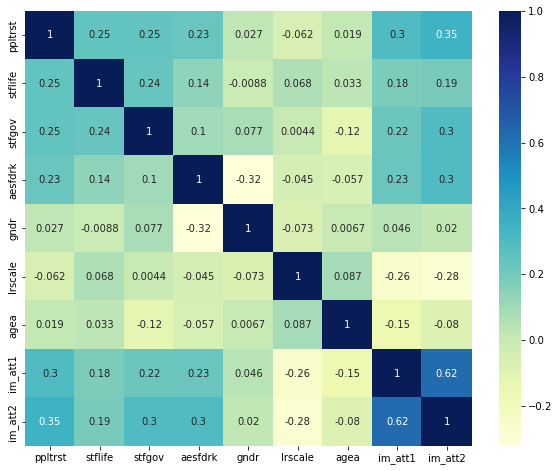

In [58]:
plt.figure(figsize=(10,8))
sns.heatmap(ger_18.corr(), annot=True, cmap="YlGnBu");

In [59]:
ger_18.describe()

,ppltrst,stflife,stfgov,aesfdrk,gndr,lrscale,agea,im_att1,im_att2
count,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000
mean,5.442334,7.688829,4.299412,3.017639,0.474446,4.387607,49.812754,3.032112,5.856852
std,2.197839,1.910902,2.180725,0.806173,0.499460,1.904843,18.874634,0.648934,2.049525
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,15.000000,1.000000,0.000000
25%,4.000000,7.000000,3.000000,3.000000,0.000000,3.000000,34.000000,2.666667,4.666667
50%,6.000000,8.000000,4.000000,3.000000,0.000000,5.000000,51.000000,3.000000,6.000000
75%,7.000000,9.000000,6.000000,4.000000,1.000000,5.000000,64.000000,3.333333,7.333333
max,10.000000,10.000000,10.000000,4.000000,1.000000,10.000000,90.000000,4.000000,10.000000


### Finland 2018

In [60]:
fin_18 = df_18_end[df_18_end.cntry == 'FI']
fin_18

,cntry,ppltrst,stflife,stfgov,aesfdrk,gndr,lrscale,agea,im_att1,im_att2
18687,FI,7.0,9.0,4.0,4.0,0,6.0,71.0,3.000000,5.666667
18688,FI,8.0,9.0,7.0,4.0,0,5.0,29.0,2.000000,6.000000
18689,FI,7.0,8.0,5.0,3.0,0,3.0,77.0,2.666667,6.000000
18690,FI,7.0,10.0,7.0,4.0,0,8.0,46.0,2.666667,8.000000
18691,FI,9.0,9.0,8.0,3.0,1,8.0,57.0,3.000000,7.333333
...,...,...,...,...,...,...,...,...,...,...
20437,FI,8.0,7.0,6.0,2.0,1,5.0,63.0,3.000000,8.333333
20438,FI,9.0,8.0,8.0,4.0,1,8.0,51.0,2.666667,7.333333
20439,FI,7.0,7.0,6.0,4.0,1,5.0,47.0,2.000000,4.666667
20440,FI,9.0,10.0,8.0,3.0,1,6.0,80.0,2.333333,7.000000


In [61]:
fin_18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1755 entries, 18687 to 20441
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cntry    1755 non-null   object 
 1   ppltrst  1755 non-null   float64
 2   stflife  1753 non-null   float64
 3   stfgov   1731 non-null   float64
 4   aesfdrk  1753 non-null   float64
 5   gndr     1755 non-null   int64  
 6   lrscale  1685 non-null   float64
 7   agea     1755 non-null   float64
 8   im_att1  1734 non-null   float64
 9   im_att2  1748 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 150.8+ KB


In [62]:
fin_18.isnull().sum()

cntry       0
ppltrst     0
stflife     2
stfgov     24
aesfdrk     2
gndr        0
lrscale    70
agea        0
im_att1    21
im_att2     7
dtype: int64

In [63]:
fin_18.dropna(inplace=True)

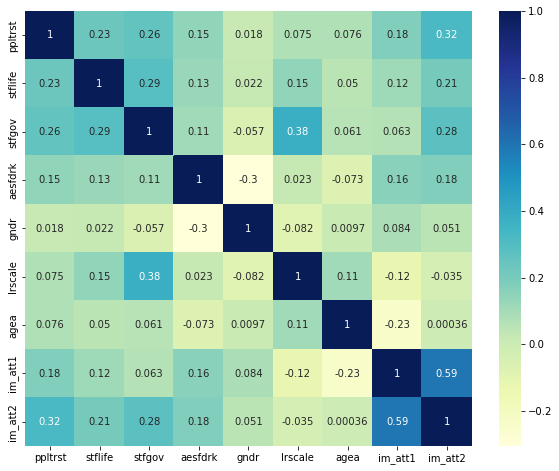

In [64]:
plt.figure(figsize=(10,8))
sns.heatmap(fin_18.corr(), annot=True, cmap="YlGnBu");

In [65]:
fin_18.describe()

,ppltrst,stflife,stfgov,aesfdrk,gndr,lrscale,agea,im_att1,im_att2
count,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000
mean,6.955971,8.066345,5.188179,3.384198,0.512063,5.644753,51.267189,2.651488,6.122939
std,1.738100,1.484724,2.321385,0.637903,0.500005,2.109232,18.780385,0.653733,1.872373
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,15.000000,1.000000,0.000000
25%,6.000000,8.000000,4.000000,3.000000,0.000000,4.000000,36.000000,2.000000,5.000000
50%,7.000000,8.000000,6.000000,3.000000,1.000000,5.000000,53.000000,2.666667,6.333333
75%,8.000000,9.000000,7.000000,4.000000,1.000000,7.000000,66.000000,3.000000,7.333333
max,10.000000,10.000000,10.000000,4.000000,1.000000,10.000000,90.000000,4.000000,10.000000


### Norway 2018

In [66]:
nor_18 = df_18_end[df_18_end.cntry == 'NO']
nor_18

,cntry,ppltrst,stflife,stfgov,aesfdrk,gndr,lrscale,agea,im_att1,im_att2
39575,NO,3.0,9.0,9.0,4.0,1,10.0,57.0,2.333333,3.333333
39576,NO,7.0,8.0,5.0,4.0,0,2.0,58.0,3.000000,6.666667
39577,NO,7.0,10.0,4.0,3.0,0,0.0,63.0,3.000000,7.000000
39578,NO,3.0,8.0,7.0,4.0,0,5.0,51.0,2.000000,3.333333
39579,NO,9.0,9.0,8.0,4.0,0,7.0,46.0,3.000000,8.000000
...,...,...,...,...,...,...,...,...,...,...
40976,NO,10.0,9.0,8.0,3.0,1,5.0,16.0,4.000000,7.000000
40977,NO,7.0,10.0,5.0,3.0,1,5.0,24.0,3.000000,8.666667
40978,NO,8.0,7.0,6.0,4.0,0,5.0,35.0,4.000000,8.333333
40979,NO,6.0,9.0,8.0,4.0,1,4.0,45.0,4.000000,7.666667


In [67]:
nor_18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1406 entries, 39575 to 40980
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cntry    1406 non-null   object 
 1   ppltrst  1401 non-null   float64
 2   stflife  1404 non-null   float64
 3   stfgov   1394 non-null   float64
 4   aesfdrk  1405 non-null   float64
 5   gndr     1406 non-null   int64  
 6   lrscale  1364 non-null   float64
 7   agea     1374 non-null   float64
 8   im_att1  1393 non-null   float64
 9   im_att2  1405 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 120.8+ KB


In [68]:
nor_18.isnull().sum()

cntry       0
ppltrst     5
stflife     2
stfgov     12
aesfdrk     1
gndr        0
lrscale    42
agea       32
im_att1    13
im_att2     1
dtype: int64

In [69]:
nor_18.dropna(inplace=True)

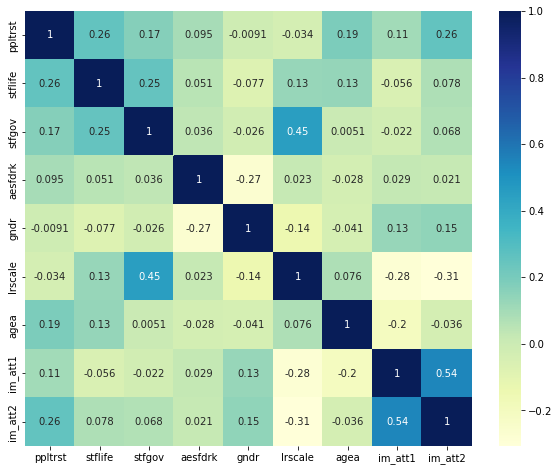

In [70]:
plt.figure(figsize=(10,8))
sns.heatmap(nor_18.corr(), annot=True, cmap="YlGnBu");

In [71]:
nor_18.describe()

,ppltrst,stflife,stfgov,aesfdrk,gndr,lrscale,agea,im_att1,im_att2
count,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000
mean,6.808073,7.863671,5.497334,3.582635,0.447829,5.012947,47.406702,3.108149,6.082001
std,1.880507,1.634377,2.113805,0.627910,0.497460,2.400264,18.127446,0.646499,1.812720
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,15.000000,1.000000,0.000000
25%,6.000000,7.000000,4.000000,3.000000,0.000000,3.000000,33.000000,3.000000,5.000000
50%,7.000000,8.000000,6.000000,4.000000,0.000000,5.000000,48.000000,3.000000,6.333333
75%,8.000000,9.000000,7.000000,4.000000,1.000000,7.000000,62.000000,3.666667,7.333333
max,10.000000,10.000000,10.000000,4.000000,1.000000,10.000000,90.000000,4.000000,10.000000


### The Nederlands 2018

In [72]:
ned_18 = df_18_end[df_18_end.cntry == 'NL']
ned_18

,cntry,ppltrst,stflife,stfgov,aesfdrk,gndr,lrscale,agea,im_att1,im_att2
37902,NL,7.0,8.0,6.0,3.0,1,5.0,32.0,3.000000,6.333333
37903,NL,7.0,8.0,7.0,3.0,0,5.0,57.0,2.000000,5.000000
37904,NL,7.0,7.0,7.0,2.0,1,5.0,45.0,3.000000,6.000000
37905,NL,8.0,8.0,7.0,3.0,0,NaN,71.0,2.000000,7.000000
37906,NL,7.0,9.0,7.0,4.0,1,5.0,34.0,3.000000,5.666667
...,...,...,...,...,...,...,...,...,...,...
39570,NL,0.0,7.0,5.0,3.0,1,4.0,42.0,3.000000,5.666667
39571,NL,3.0,8.0,3.0,4.0,0,5.0,43.0,3.000000,5.666667
39572,NL,0.0,8.0,5.0,2.0,0,5.0,81.0,3.000000,5.666667
39573,NL,8.0,9.0,7.0,4.0,0,3.0,46.0,3.666667,8.000000


In [73]:
ned_18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1673 entries, 37902 to 39574
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cntry    1673 non-null   object 
 1   ppltrst  1671 non-null   float64
 2   stflife  1673 non-null   float64
 3   stfgov   1627 non-null   float64
 4   aesfdrk  1669 non-null   float64
 5   gndr     1673 non-null   int64  
 6   lrscale  1549 non-null   float64
 7   agea     1665 non-null   float64
 8   im_att1  1651 non-null   float64
 9   im_att2  1669 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 143.8+ KB


In [74]:
ned_18.isnull().sum()

cntry        0
ppltrst      2
stflife      0
stfgov      46
aesfdrk      4
gndr         0
lrscale    124
agea         8
im_att1     22
im_att2      4
dtype: int64

In [75]:
ned_18.dropna(inplace=True)

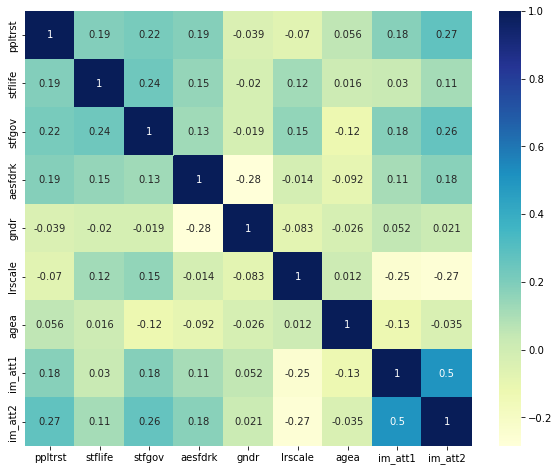

In [76]:
plt.figure(figsize=(10,8))
sns.heatmap(ned_18.corr(), annot=True, cmap="YlGnBu");

In [77]:
ned_18.describe()

,ppltrst,stflife,stfgov,aesfdrk,gndr,lrscale,agea,im_att1,im_att2
count,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000
mean,6.271220,7.931034,5.739390,3.127321,0.486074,5.136605,49.067639,2.771552,5.848917
std,1.755845,1.316736,1.725829,0.622277,0.499972,1.976615,18.557879,0.711548,1.505818
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,15.000000,1.000000,0.000000
25%,5.000000,7.000000,5.000000,3.000000,0.000000,4.000000,34.000000,2.333333,5.000000
50%,7.000000,8.000000,6.000000,3.000000,0.000000,5.000000,50.000000,3.000000,6.000000
75%,8.000000,9.000000,7.000000,4.000000,1.000000,7.000000,64.000000,3.000000,7.000000
max,10.000000,10.000000,10.000000,4.000000,1.000000,10.000000,90.000000,4.000000,10.000000


### Sweden 2018

In [78]:
swe_18 = df_18_end[df_18_end.cntry == 'SE']
swe_18

,cntry,ppltrst,stflife,stfgov,aesfdrk,gndr,lrscale,agea,im_att1,im_att2
45579,SE,6.0,8.0,8.0,4.0,0,3.0,21.0,3.000000,7.333333
45580,SE,3.0,9.0,3.0,3.0,0,8.0,69.0,3.000000,5.000000
45581,SE,4.0,8.0,4.0,4.0,0,6.0,35.0,3.000000,5.666667
45582,SE,5.0,8.0,3.0,3.0,1,2.0,40.0,4.000000,7.000000
45583,SE,4.0,10.0,7.0,4.0,1,2.0,57.0,1.000000,5.000000
...,...,...,...,...,...,...,...,...,...,...
47113,SE,7.0,7.0,6.0,4.0,1,5.0,38.0,4.000000,7.333333
47114,SE,1.0,8.0,1.0,3.0,0,9.0,24.0,2.000000,1.333333
47115,SE,6.0,9.0,6.0,4.0,0,0.0,37.0,4.000000,7.333333
47116,SE,3.0,7.0,5.0,4.0,0,3.0,35.0,4.000000,8.333333


In [79]:
swe_18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1539 entries, 45579 to 47117
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cntry    1539 non-null   object 
 1   ppltrst  1532 non-null   float64
 2   stflife  1535 non-null   float64
 3   stfgov   1496 non-null   float64
 4   aesfdrk  1532 non-null   float64
 5   gndr     1539 non-null   int64  
 6   lrscale  1490 non-null   float64
 7   agea     1539 non-null   float64
 8   im_att1  1519 non-null   float64
 9   im_att2  1535 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 132.3+ KB


In [80]:
swe_18.isnull().sum()

cntry       0
ppltrst     7
stflife     4
stfgov     43
aesfdrk     7
gndr        0
lrscale    49
agea        0
im_att1    20
im_att2     4
dtype: int64

In [81]:
swe_18.dropna(inplace=True)

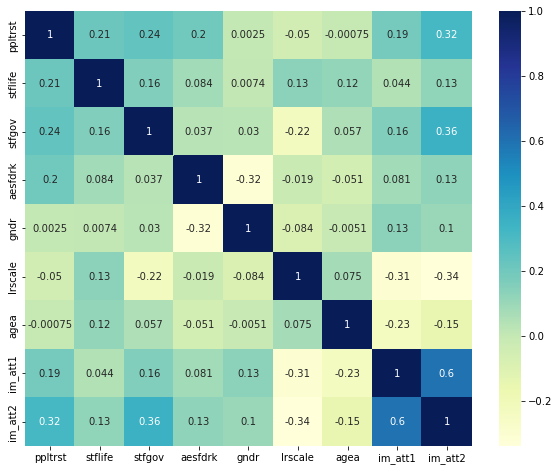

In [82]:
plt.figure(figsize=(10,8))
sns.heatmap(swe_18.corr(), annot=True, cmap="YlGnBu");

In [83]:
swe_18.describe()

,ppltrst,stflife,stfgov,aesfdrk,gndr,lrscale,agea,im_att1,im_att2
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,6.356944,7.967361,4.991667,3.310417,0.481250,5.164583,52.639583,3.178009,6.393866
std,2.028040,1.614619,2.162267,0.769576,0.499822,2.311706,18.963297,0.622670,2.000902
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,15.000000,1.000000,0.000000
25%,5.000000,7.000000,3.000000,3.000000,0.000000,3.000000,37.000000,3.000000,5.000000
50%,7.000000,8.000000,5.000000,3.000000,0.000000,5.000000,54.000000,3.000000,6.666667
75%,8.000000,9.000000,7.000000,4.000000,1.000000,7.000000,69.000000,4.000000,8.000000
max,10.000000,10.000000,10.000000,4.000000,1.000000,10.000000,90.000000,4.000000,10.000000


### We will do the same operationalization that we have done for the 2018 dataset to other datasets.

## ESS 2016

In [84]:
df_16 = pd.read_csv('2016_csv.csv')

In [85]:
df_16.head()

,name,essround,edition,proddate,idno,cntry,nwspol,netusoft,netustm,ppltrst,...,inwdde,inwmme,inwyye,inwehh,inwemm,inwtm,dweight,pspwght,pweight,anweight
0,ESS8e02_2,8,2.2,10.12.2020,1,AT,120,Most days,180,8,...,5,12,2016,8,33,50.0,0.611677,1.178496,0.370393,0.436506
1,ESS8e02_2,8,2.2,10.12.2020,2,AT,120,Every day,120,6,...,25,11,2016,11,10,86.0,1.223354,0.899472,0.370393,0.333158
2,ESS8e02_2,8,2.2,10.12.2020,4,AT,30,Only occasionally,Not applicable,5,...,22,11,2016,18,0,38.0,0.389058,0.315753,0.370393,0.116953
3,ESS8e02_2,8,2.2,10.12.2020,6,AT,30,Every day,120,6,...,11,10,2016,19,59,46.0,0.642594,0.472467,0.370393,0.174999
4,ESS8e02_2,8,2.2,10.12.2020,10,AT,30,Every day,180,5,...,1,12,2016,11,49,70.0,3.432402,2.246706,0.370393,0.832164


In [87]:
df_16.cntry.value_counts().sort_index()

AT    2010
BE    1766
CH    1525
CZ    2269
DE    2852
EE    2019
ES    1958
FI    1925
FR    2070
GB    1959
HU    1614
IE    2757
IL    2557
IS     880
IT    2626
LT    2122
NL    1681
NO    1545
PL    1694
PT    1270
RU    2430
SE    1551
SI    1307
Name: cntry, dtype: int64

In [88]:
df_16 = df_16[df_16.cntry.isin(['DE', 'FI', 'NL', 'NO', 'SE'])]

In [89]:
df_16

,name,essround,edition,proddate,idno,cntry,nwspol,netusoft,netustm,ppltrst,...,inwdde,inwmme,inwyye,inwehh,inwemm,inwtm,dweight,pspwght,pweight,anweight
7570,ESS8e02_2,8,2.2,10.12.2020,10000004,DE,3,Every day,1080,8,...,4,11,2016,13,17,64.0,1.237005,1.047283,2.499809,2.618008
7571,ESS8e02_2,8,2.2,10.12.2020,10000006,DE,30,Most days,30,8,...,4,11,2016,19,58,100.0,1.237005,1.096930,2.499809,2.742116
7572,ESS8e02_2,8,2.2,10.12.2020,10000012,DE,60,Every day,60,5,...,19,1,2017,16,52,165.0,1.237005,0.621738,2.499809,1.554227
7573,ESS8e02_2,8,2.2,10.12.2020,10000017,DE,15,A few times a week,Not applicable,7,...,3,11,2016,20,16,66.0,1.237005,1.213660,2.499809,3.033918
7574,ESS8e02_2,8,2.2,10.12.2020,10000019,DE,150,Every day,150,6,...,6,12,2016,18,17,NaN,1.237005,0.621738,2.499809,1.554227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43075,ESS8e02_2,8,2.2,10.12.2020,3744,SE,70,Every day,390,6,...,30,9,2016,16,54,62.0,1.000534,2.275877,0.524428,1.193533
43076,ESS8e02_2,8,2.2,10.12.2020,3747,SE,30,Every day,300,4,...,4,10,2016,15,23,56.0,1.000534,2.519612,0.524428,1.321354
43077,ESS8e02_2,8,2.2,10.12.2020,3748,SE,60,Every day,240,9,...,4,10,2016,17,51,84.0,1.000892,1.727090,0.524428,0.905734
43078,ESS8e02_2,8,2.2,10.12.2020,3749,SE,60,Every day,300,3,...,30,11,2016,17,51,47.0,0.999591,1.094712,0.524428,0.574097


In [90]:
df_16.cntry.value_counts()

DE    2852
FI    1925
NL    1681
SE    1551
NO    1545
Name: cntry, dtype: int64

In [91]:
df_16.imsmetn.value_counts()

Allow some                          4917
Allow many to come and live here    2931
Allow a few                         1416
Don't know                           132
Allow none                           130
Refusal                               28
Name: imsmetn, dtype: int64

In [92]:
df_16[['imsmetn', 'imdfetn', 'impcntr']] = df_16[['imsmetn', 'imdfetn', 'impcntr']].applymap(convert_1)

In [93]:
df_16[['imsmetn', 'imdfetn', 'impcntr']]

,imsmetn,imdfetn,impcntr
7570,3.0,2.0,2.0
7571,4.0,4.0,3.0
7572,4.0,4.0,4.0
7573,4.0,3.0,4.0
7574,4.0,3.0,2.0
...,...,...,...
43075,4.0,4.0,4.0
43076,3.0,3.0,3.0
43077,3.0,3.0,3.0
43078,4.0,4.0,4.0


In [94]:
df_16['im_att1'] = np.apply_along_axis(combine, axis = 1, arr = df_16[['imsmetn', 'imdfetn', 'impcntr']].values)

In [95]:
df_16['im_att1']

7570     2.333333
7571     3.666667
7572     4.000000
7573     3.666667
7574     3.000000
           ...   
43075    4.000000
43076    3.000000
43077    3.000000
43078    4.000000
43079    3.000000
Name: im_att1, Length: 9554, dtype: float64

In [96]:
df_16.imbgeco = df_16.imbgeco.apply(convert_2)

In [97]:
df_16.imbgeco

7570     8.0
7571     9.0
7572     8.0
7573     5.0
7574     6.0
        ... 
43075    7.0
43076    5.0
43077    4.0
43078    6.0
43079    5.0
Name: imbgeco, Length: 9554, dtype: float64

In [98]:
df_16.imueclt = df_16.imueclt.apply(convert_3)

In [99]:
df_16.imueclt

7570      7.0
7571      8.0
7572      5.0
7573      8.0
7574      3.0
         ... 
43075     7.0
43076     4.0
43077     8.0
43078    10.0
43079     7.0
Name: imueclt, Length: 9554, dtype: float64

In [100]:
df_16.imwbcnt = df_16.imwbcnt.apply(convert_4)

In [101]:
df_16.imwbcnt

7570     10.0
7571      7.0
7572      5.0
7573      7.0
7574      4.0
         ... 
43075     6.0
43076     7.0
43077     8.0
43078    10.0
43079     5.0
Name: imwbcnt, Length: 9554, dtype: float64

In [102]:
df_16[['imbgeco', 'imueclt', 'imwbcnt']]

,imbgeco,imueclt,imwbcnt
7570,8.0,7.0,10.0
7571,9.0,8.0,7.0
7572,8.0,5.0,5.0
7573,5.0,8.0,7.0
7574,6.0,3.0,4.0
...,...,...,...
43075,7.0,7.0,6.0
43076,5.0,4.0,7.0
43077,4.0,8.0,8.0
43078,6.0,10.0,10.0


In [103]:
df_16['im_att2'] = np.apply_along_axis(combine, axis = 1, arr = df_16[['imbgeco', 'imueclt', 'imwbcnt']].values)

In [104]:
df_16[['im_att1', 'im_att2']]

,im_att1,im_att2
7570,2.333333,8.333333
7571,3.666667,8.000000
7572,4.000000,6.000000
7573,3.666667,6.666667
7574,3.000000,4.333333
...,...,...
43075,4.000000,6.666667
43076,3.000000,5.333333
43077,3.000000,6.666667
43078,4.000000,8.666667


In [105]:
df_16.ppltrst = df_16.ppltrst.apply(convert_5)

In [106]:
df_16.stflife = df_16.stflife.apply(convert_6)

In [107]:
df_16.stfgov = df_16.stfgov.apply(convert_6)

In [108]:
df_16.aesfdrk = df_16.aesfdrk.apply(convert_7)

In [109]:
df_16.gndr = df_16.gndr.map({'Female': 1, 'Male': 0, 'No answer': np.nan})

In [110]:
df_16.lrscale = df_16.lrscale.apply(convert_8)

In [111]:
df_16.agea.replace(to_replace='Not available', value=np.nan, inplace=True)

In [112]:
df_16.agea = df_16.agea.apply(lambda x: int(x) if x is not np.nan else x)

In [113]:
df_16.agea.isnull().sum()

7

In [114]:
df_16_end = df_16[['cntry', 'ppltrst', 'stflife', 'stfgov', 
                 'aesfdrk', 'gndr', 'lrscale', 'agea', 'im_att1', 'im_att2']]

In [115]:
df_16_end

,cntry,ppltrst,stflife,stfgov,aesfdrk,gndr,lrscale,agea,im_att1,im_att2
7570,DE,8.0,9.0,3.0,3.0,0.0,2.0,22.0,2.333333,8.333333
7571,DE,8.0,9.0,8.0,4.0,0.0,5.0,58.0,3.666667,8.000000
7572,DE,5.0,9.0,3.0,3.0,0.0,5.0,64.0,4.000000,6.000000
7573,DE,7.0,9.0,7.0,4.0,0.0,8.0,52.0,3.666667,6.666667
7574,DE,6.0,8.0,3.0,3.0,0.0,7.0,67.0,3.000000,4.333333
...,...,...,...,...,...,...,...,...,...,...
43075,SE,6.0,10.0,8.0,2.0,0.0,6.0,15.0,4.000000,6.666667
43076,SE,4.0,7.0,5.0,2.0,1.0,6.0,15.0,3.000000,5.333333
43077,SE,9.0,9.0,7.0,1.0,0.0,3.0,15.0,3.000000,6.666667
43078,SE,3.0,7.0,9.0,3.0,0.0,4.0,15.0,4.000000,8.666667


### Germany 2016

In [116]:
ger_16 = df_16_end[df_16_end.cntry == 'DE']
ger_16

,cntry,ppltrst,stflife,stfgov,aesfdrk,gndr,lrscale,agea,im_att1,im_att2
7570,DE,8.0,9.0,3.0,3.0,0.0,2.0,22.0,2.333333,8.333333
7571,DE,8.0,9.0,8.0,4.0,0.0,5.0,58.0,3.666667,8.000000
7572,DE,5.0,9.0,3.0,3.0,0.0,5.0,64.0,4.000000,6.000000
7573,DE,7.0,9.0,7.0,4.0,0.0,8.0,52.0,3.666667,6.666667
7574,DE,6.0,8.0,3.0,3.0,0.0,7.0,67.0,3.000000,4.333333
...,...,...,...,...,...,...,...,...,...,...
10417,DE,2.0,4.0,0.0,3.0,0.0,5.0,42.0,2.666667,2.000000
10418,DE,3.0,8.0,6.0,3.0,0.0,5.0,38.0,2.666667,5.000000
10419,DE,3.0,7.0,3.0,2.0,1.0,5.0,21.0,2.500000,1.333333
10420,DE,7.0,8.0,6.0,3.0,0.0,4.0,65.0,3.333333,7.666667


In [117]:
ger_16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2852 entries, 7570 to 10421
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cntry    2852 non-null   object 
 1   ppltrst  2848 non-null   float64
 2   stflife  2846 non-null   float64
 3   stfgov   2792 non-null   float64
 4   aesfdrk  2850 non-null   float64
 5   gndr     2852 non-null   float64
 6   lrscale  2765 non-null   float64
 7   agea     2849 non-null   float64
 8   im_att1  2834 non-null   float64
 9   im_att2  2844 non-null   float64
dtypes: float64(9), object(1)
memory usage: 245.1+ KB


In [118]:
ger_16.isnull().sum()

cntry       0
ppltrst     4
stflife     6
stfgov     60
aesfdrk     2
gndr        0
lrscale    87
agea        3
im_att1    18
im_att2     8
dtype: int64

In [119]:
ger_16.dropna(inplace=True)

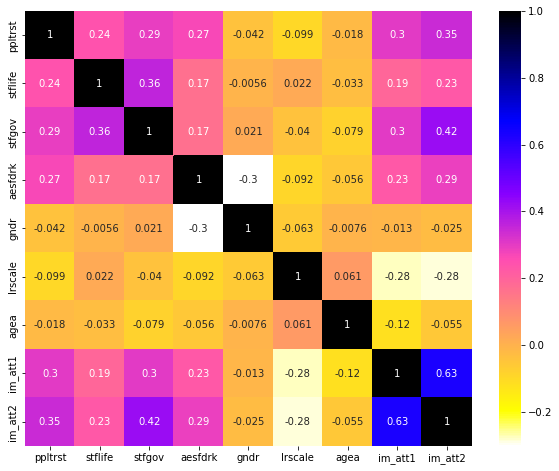

In [120]:
plt.figure(figsize=(10,8))
sns.heatmap(ger_16.corr(), annot=True, cmap="gnuplot2_r");

In [121]:
ger_16.describe()

,ppltrst,stflife,stfgov,aesfdrk,gndr,lrscale,agea,im_att1,im_att2
count,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000
mean,5.329137,7.524250,4.948538,2.929656,0.464643,4.389856,48.693077,3.003826,5.681167
std,2.206086,1.993477,2.177141,0.803380,0.498841,1.849973,18.309505,0.666903,2.089107
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,15.000000,1.000000,0.000000
25%,4.000000,7.000000,3.000000,3.000000,0.000000,3.000000,34.000000,2.666667,4.333333
50%,5.000000,8.000000,5.000000,3.000000,0.000000,5.000000,50.000000,3.000000,5.666667
75%,7.000000,9.000000,7.000000,3.000000,1.000000,5.000000,63.000000,3.333333,7.333333
max,10.000000,10.000000,10.000000,4.000000,1.000000,10.000000,94.000000,4.000000,10.000000


### Finland 2016

In [122]:
fin_16 = df_16_end[df_16_end.cntry == 'FI']
fin_16

,cntry,ppltrst,stflife,stfgov,aesfdrk,gndr,lrscale,agea,im_att1,im_att2
14399,FI,8.0,8.0,5.0,4.0,1.0,6.0,72.0,NaN,4.666667
14400,FI,1.0,8.0,NaN,4.0,0.0,6.0,73.0,2.000000,7.000000
14401,FI,7.0,5.0,4.0,4.0,0.0,6.0,69.0,3.000000,6.333333
14402,FI,10.0,10.0,5.0,3.0,1.0,5.0,32.0,2.000000,4.000000
14403,FI,7.0,8.0,7.0,3.0,0.0,7.0,33.0,2.000000,6.000000
...,...,...,...,...,...,...,...,...,...,...
16319,FI,8.0,8.0,4.0,3.0,0.0,6.0,47.0,2.333333,7.000000
16320,FI,7.0,10.0,9.0,2.0,0.0,6.0,23.0,3.333333,9.000000
16321,FI,6.0,8.0,6.0,3.0,1.0,5.0,43.0,NaN,6.666667
16322,FI,9.0,10.0,8.0,3.0,1.0,NaN,29.0,NaN,7.000000


In [123]:
fin_16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 14399 to 16323
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cntry    1925 non-null   object 
 1   ppltrst  1924 non-null   float64
 2   stflife  1923 non-null   float64
 3   stfgov   1908 non-null   float64
 4   aesfdrk  1919 non-null   float64
 5   gndr     1925 non-null   float64
 6   lrscale  1865 non-null   float64
 7   agea     1925 non-null   float64
 8   im_att1  1901 non-null   float64
 9   im_att2  1920 non-null   float64
dtypes: float64(9), object(1)
memory usage: 165.4+ KB


In [124]:
fin_16.isnull().sum()

cntry       0
ppltrst     1
stflife     2
stfgov     17
aesfdrk     6
gndr        0
lrscale    60
agea        0
im_att1    24
im_att2     5
dtype: int64

In [125]:
fin_16.dropna(inplace=True)

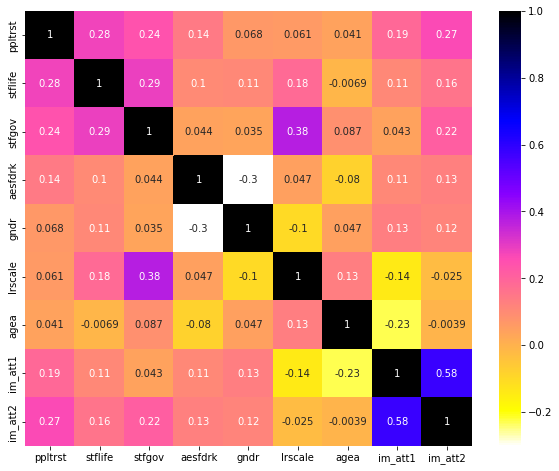

In [126]:
plt.figure(figsize=(10,8))
sns.heatmap(fin_16.corr(), annot=True, cmap="gnuplot2_r");

In [127]:
fin_16.describe()

,ppltrst,stflife,stfgov,aesfdrk,gndr,lrscale,agea,im_att1,im_att2
count,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000
mean,6.778263,7.983616,4.811032,3.360459,0.492627,5.674495,50.065538,2.652922,6.027216
std,1.903401,1.582608,2.310420,0.652903,0.500082,2.073512,18.745231,0.679125,1.869417
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,15.000000,1.000000,0.000000
25%,6.000000,8.000000,3.000000,3.000000,0.000000,5.000000,34.000000,2.000000,5.000000
50%,7.000000,8.000000,5.000000,3.000000,0.000000,5.000000,51.000000,2.666667,6.000000
75%,8.000000,9.000000,7.000000,4.000000,1.000000,7.000000,65.000000,3.000000,7.333333
max,10.000000,10.000000,10.000000,4.000000,1.000000,10.000000,95.000000,4.000000,10.000000


### Norway 2016

In [128]:
nor_16 = df_16_end[df_16_end.cntry == 'NO']
nor_16

,cntry,ppltrst,stflife,stfgov,aesfdrk,gndr,lrscale,agea,im_att1,im_att2
34590,NO,8.0,8.0,6.0,4.0,0.0,5.0,74.0,3.000000,7.000000
34591,NO,4.0,8.0,5.0,4.0,0.0,5.0,17.0,3.000000,4.666667
34592,NO,8.0,9.0,3.0,4.0,0.0,2.0,54.0,3.000000,8.000000
34593,NO,9.0,9.0,6.0,3.0,1.0,4.0,50.0,3.000000,8.000000
34594,NO,5.0,9.0,NaN,4.0,0.0,5.0,25.0,3.000000,8.000000
...,...,...,...,...,...,...,...,...,...,...
36130,NO,8.0,8.0,5.0,4.0,0.0,4.0,26.0,4.000000,8.333333
36131,NO,7.0,7.0,6.0,4.0,0.0,4.0,29.0,2.666667,4.666667
36132,NO,9.0,8.0,4.0,4.0,0.0,4.0,81.0,3.000000,4.000000
36133,NO,10.0,10.0,10.0,4.0,0.0,10.0,44.0,1.333333,0.000000


In [129]:
nor_16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 34590 to 36134
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cntry    1545 non-null   object 
 1   ppltrst  1542 non-null   float64
 2   stflife  1543 non-null   float64
 3   stfgov   1529 non-null   float64
 4   aesfdrk  1542 non-null   float64
 5   gndr     1545 non-null   float64
 6   lrscale  1497 non-null   float64
 7   agea     1545 non-null   float64
 8   im_att1  1537 non-null   float64
 9   im_att2  1545 non-null   float64
dtypes: float64(9), object(1)
memory usage: 132.8+ KB


In [130]:
nor_16.isnull().sum()

cntry       0
ppltrst     3
stflife     2
stfgov     16
aesfdrk     3
gndr        0
lrscale    48
agea        0
im_att1     8
im_att2     0
dtype: int64

In [131]:
nor_16.dropna(inplace=True)

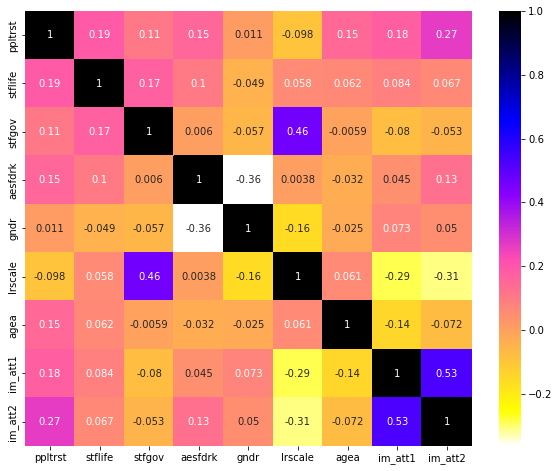

In [132]:
plt.figure(figsize=(10,8))
sns.heatmap(nor_16.corr(), annot=True, cmap="gnuplot2_r");

In [133]:
nor_16.describe()

,ppltrst,stflife,stfgov,aesfdrk,gndr,lrscale,agea,im_att1,im_att2
count,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000
mean,6.830176,7.958728,5.548038,3.487821,0.459405,5.202300,47.099459,3.037664,5.747519
std,1.818504,1.634198,2.031254,0.660974,0.498518,2.214086,18.628179,0.647643,1.840041
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,15.000000,1.000000,0.000000
25%,6.000000,7.000000,4.000000,3.000000,0.000000,4.000000,32.000000,2.666667,4.666667
50%,7.000000,8.000000,6.000000,4.000000,0.000000,5.000000,47.000000,3.000000,5.666667
75%,8.000000,9.000000,7.000000,4.000000,1.000000,7.000000,61.000000,3.333333,7.000000
max,10.000000,10.000000,10.000000,4.000000,1.000000,10.000000,98.000000,4.000000,10.000000


### The Netherlands 2016

In [134]:
ned_16 = df_16_end[df_16_end.cntry == 'NL']
ned_16

,cntry,ppltrst,stflife,stfgov,aesfdrk,gndr,lrscale,agea,im_att1,im_att2
32909,NL,9.0,9.0,6.0,3.0,1.0,6.0,31.0,3.666667,7.666667
32910,NL,7.0,8.0,7.0,3.0,1.0,3.0,19.0,4.000000,7.333333
32911,NL,6.0,8.0,6.0,3.0,1.0,4.0,62.0,3.333333,7.000000
32912,NL,7.0,8.0,8.0,3.0,1.0,5.0,19.0,3.000000,7.000000
32913,NL,6.0,8.0,0.0,2.0,1.0,NaN,69.0,2.333333,4.333333
...,...,...,...,...,...,...,...,...,...,...
34585,NL,5.0,10.0,8.0,4.0,1.0,6.0,70.0,3.000000,4.666667
34586,NL,8.0,8.0,5.0,3.0,1.0,4.0,33.0,3.000000,7.666667
34587,NL,5.0,7.0,5.0,2.0,1.0,NaN,34.0,3.000000,5.000000
34588,NL,7.0,8.0,7.0,3.0,1.0,NaN,30.0,3.000000,5.000000


In [135]:
ned_16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1681 entries, 32909 to 34589
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cntry    1681 non-null   object 
 1   ppltrst  1680 non-null   float64
 2   stflife  1679 non-null   float64
 3   stfgov   1647 non-null   float64
 4   aesfdrk  1675 non-null   float64
 5   gndr     1681 non-null   float64
 6   lrscale  1575 non-null   float64
 7   agea     1681 non-null   float64
 8   im_att1  1669 non-null   float64
 9   im_att2  1677 non-null   float64
dtypes: float64(9), object(1)
memory usage: 144.5+ KB


In [136]:
ned_16.isnull().sum()

cntry        0
ppltrst      1
stflife      2
stfgov      34
aesfdrk      6
gndr         0
lrscale    106
agea         0
im_att1     12
im_att2      4
dtype: int64

In [137]:
ned_16.dropna(inplace=True)

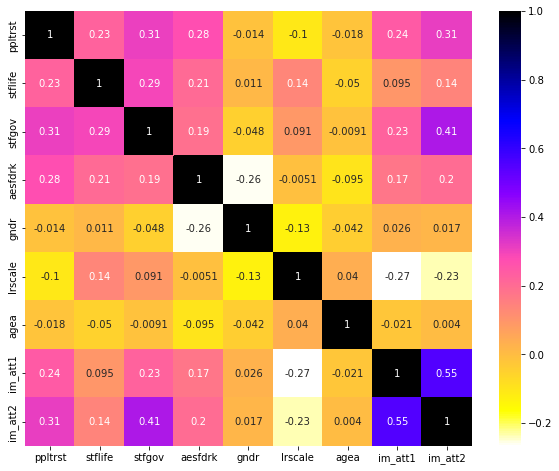

In [138]:
plt.figure(figsize=(10,8))
sns.heatmap(ned_16.corr(), annot=True, cmap="gnuplot2_r");

In [139]:
ned_16.describe()

,ppltrst,stflife,stfgov,aesfdrk,gndr,lrscale,agea,im_att1,im_att2
count,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000
mean,6.068831,7.779221,5.426623,3.064935,0.537662,5.209740,51.249351,2.826948,5.629870
std,1.966699,1.500906,1.840048,0.640574,0.498741,1.972398,18.400148,0.677579,1.611335
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,15.000000,1.000000,0.000000
25%,5.000000,7.000000,4.000000,3.000000,0.000000,4.000000,37.000000,2.333333,4.666667
50%,7.000000,8.000000,6.000000,3.000000,1.000000,5.000000,52.000000,3.000000,5.833333
75%,7.000000,9.000000,7.000000,3.000000,1.000000,7.000000,66.000000,3.000000,6.666667
max,10.000000,10.000000,10.000000,4.000000,1.000000,10.000000,95.000000,4.000000,10.000000


### Sweden 2016

In [140]:
swe_16 = df_16_end[df_16_end.cntry == 'SE']
swe_16

,cntry,ppltrst,stflife,stfgov,aesfdrk,gndr,lrscale,agea,im_att1,im_att2
41529,SE,5.0,7.0,5.0,3.0,0.0,8.0,90.0,NaN,8.000000
41530,SE,7.0,8.0,5.0,1.0,1.0,3.0,90.0,4.000000,4.333333
41531,SE,5.0,10.0,8.0,3.0,1.0,10.0,90.0,2.333333,6.333333
41532,SE,7.0,7.0,7.0,3.0,1.0,6.0,90.0,2.666667,5.666667
41533,SE,6.0,10.0,5.0,4.0,1.0,8.0,90.0,3.000000,5.000000
...,...,...,...,...,...,...,...,...,...,...
43075,SE,6.0,10.0,8.0,2.0,0.0,6.0,15.0,4.000000,6.666667
43076,SE,4.0,7.0,5.0,2.0,1.0,6.0,15.0,3.000000,5.333333
43077,SE,9.0,9.0,7.0,1.0,0.0,3.0,15.0,3.000000,6.666667
43078,SE,3.0,7.0,9.0,3.0,0.0,4.0,15.0,4.000000,8.666667


In [141]:
swe_16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1551 entries, 41529 to 43079
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cntry    1551 non-null   object 
 1   ppltrst  1544 non-null   float64
 2   stflife  1543 non-null   float64
 3   stfgov   1515 non-null   float64
 4   aesfdrk  1541 non-null   float64
 5   gndr     1550 non-null   float64
 6   lrscale  1482 non-null   float64
 7   agea     1547 non-null   float64
 8   im_att1  1518 non-null   float64
 9   im_att2  1545 non-null   float64
dtypes: float64(9), object(1)
memory usage: 133.3+ KB


In [142]:
swe_16.isnull().sum()

cntry       0
ppltrst     7
stflife     8
stfgov     36
aesfdrk    10
gndr        1
lrscale    69
agea        4
im_att1    33
im_att2     6
dtype: int64

In [143]:
swe_16.dropna(inplace=True)

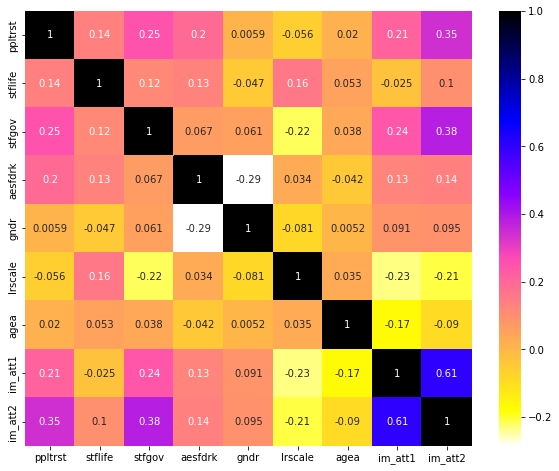

In [144]:
plt.figure(figsize=(10,8))
sns.heatmap(swe_16.corr(), annot=True, cmap="gnuplot2_r");

In [145]:
swe_16.describe()

,ppltrst,stflife,stfgov,aesfdrk,gndr,lrscale,agea,im_att1,im_att2
count,1417.000000,1417.00000,1417.000000,1417.000000,1417.000000,1417.000000,1417.000000,1417.000000,1417.000000
mean,6.251235,7.92096,4.832745,3.251941,0.489767,5.216655,51.784051,3.267349,6.343566
std,2.068830,1.69811,2.004120,0.766097,0.500072,2.262206,18.739817,0.610269,2.001116
min,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,15.000000,1.000000,0.000000
25%,5.000000,7.00000,3.000000,3.000000,0.000000,4.000000,37.000000,3.000000,5.000000
50%,7.000000,8.00000,5.000000,3.000000,0.000000,5.000000,53.000000,3.000000,6.666667
75%,8.000000,9.00000,6.000000,4.000000,1.000000,7.000000,67.000000,4.000000,7.666667
max,10.000000,10.00000,10.000000,4.000000,1.000000,10.000000,90.000000,4.000000,10.000000


## ESS 2014

In [170]:
df_14 = pd.read_stata('ESS_2014.dta')

In [171]:
df_14.head()

,name,essround,edition,proddate,idno,cntry,tvtot,tvpol,ppltrst,pplfair,...,supqad1,supqad2,supqdd,supqmm,supqyr,dweight,pspwght,pweight,country,aaa
0,ESS7e02_2,7,2.2,01.12.2018,10000011,DE,"0,5 hour to 1 hour","0,5 hour to 1 hour",Most people can be trusted,Most people try to be fair,...,NaN,Face to face interview,10.0,9.0,2014.0,0.531346,0.607555,2.304126,DE,5.0
1,ESS7e02_2,7,2.2,01.12.2018,10000021,DE,"More than 1,5 hours, up to 2 hours","More than 1 hour, up to 1,5 hours",7,2,...,NaN,Face to face interview,22.0,9.0,2014.0,0.531346,0.462666,2.304126,DE,5.0
2,ESS7e02_2,7,2.2,01.12.2018,10000051,DE,"More than 2,5 hours, up to 3 hours","0,5 hour to 1 hour",3,5,...,NaN,Face to face interview,1.0,9.0,2014.0,1.227808,0.640290,2.304126,DE,5.0
3,ESS7e02_2,7,2.2,01.12.2018,10000061,DE,"More than 1,5 hours, up to 2 hours","0,5 hour to 1 hour",6,8,...,NaN,Face to face interview,5.0,1.0,2015.0,1.227808,1.142616,2.304126,DE,5.0
4,ESS7e02_2,7,2.2,01.12.2018,10000111,DE,"More than 1,5 hours, up to 2 hours","Less than 0,5 hour",6,4,...,NaN,Face to face interview,27.0,12.0,2014.0,1.227808,0.852731,2.304126,DE,5.0


In [172]:
df_14.cntry.value_counts().sort_index()

DE    3045
FI    2087
NL    1919
NO    1436
SE    1791
Name: cntry, dtype: int64

In [173]:
df_14 = df_14[df_14.cntry.isin(['DE', 'FI', 'NL', 'NO', 'SE'])]

In [174]:
df_14.cntry.value_counts()

DE    3045
FI    2087
NL    1919
SE    1791
NO    1436
Name: cntry, dtype: int64

In [175]:
df_14.imsmetn.value_counts()

Allow some                          5063
Allow many to come and live here    3186
Allow a few                         1681
Allow none                           212
Name: imsmetn, dtype: int64

In [176]:
df_14[['imsmetn', 'imdfetn', 'impcntr']] = df_14[['imsmetn', 'imdfetn', 'impcntr']].applymap(convert_1)

In [177]:
df_14[['imsmetn', 'imdfetn', 'impcntr']]

,imsmetn,imdfetn,impcntr
0,4.0,3.0,3.0
1,3.0,3.0,2.0
2,4.0,4.0,4.0
3,4.0,3.0,3.0
4,4.0,4.0,4.0
...,...,...,...
10273,4.0,4.0,4.0
10274,4.0,4.0,4.0
10275,3.0,3.0,3.0
10276,2.0,2.0,3.0


In [178]:
df_14['im_att1'] = np.apply_along_axis(combine, axis = 1, arr = df_14[['imsmetn', 'imdfetn', 'impcntr']].values)

In [179]:
df_14.imbgeco = df_14.imbgeco.apply(convert_2)

In [180]:
df_14.imueclt = df_14.imueclt.apply(convert_3)

In [181]:
df_14.imwbcnt = df_14.imwbcnt.apply(convert_4)

In [182]:
df_14[['imbgeco', 'imueclt', 'imwbcnt']]

,imbgeco,imueclt,imwbcnt
0,5,7,8
1,0,2,0
2,6,8,6
3,5,6,5
4,5,9,8
...,...,...,...
10273,7,8,5
10274,6,7,5
10275,3,7,5
10276,2,3,5


In [183]:
df_14['im_att2'] = np.apply_along_axis(combine, axis = 1, arr = df_14[['imbgeco', 'imueclt', 'imwbcnt']].values)

In [184]:
df_14.ppltrst = df_14.ppltrst.apply(convert_5)

In [185]:
df_14.stflife = df_14.stflife.apply(convert_6)

In [186]:
df_14.stfgov = df_14.stfgov.apply(convert_6)

In [187]:
df_14.aesfdrk = df_14.aesfdrk.apply(convert_7)

In [188]:
df_14.gndr = df_14.gndr.map({'Female': 1, 'Male': 0})

In [189]:
df_14.lrscale = df_14.lrscale.apply(convert_8)

In [190]:
df_14 = df_14[df_14.agea < 94]

In [191]:
df_14.agea.isnull().sum()

0

In [192]:
df_14_end = df_14[['cntry', 'ppltrst', 'stflife', 'stfgov', 
                 'aesfdrk', 'gndr', 'lrscale', 'agea', 'im_att1', 'im_att2']]

In [193]:
df_14_end

,cntry,ppltrst,stflife,stfgov,aesfdrk,gndr,lrscale,agea,im_att1,im_att2
0,DE,10,9,7,4,0,4,52.0,3.333333,6.666667
1,DE,7,5,4,3,1,5,52.0,2.666667,0.666667
2,DE,3,7,4,3,0,6,62.0,4.000000,6.666667
3,DE,6,9,5,3,1,5,62.0,3.333333,5.333333
4,DE,6,7,NaN,4,1,5,20.0,4.000000,7.333333
...,...,...,...,...,...,...,...,...,...,...
10273,SE,6,8,8,4,0,8,15.0,4.000000,6.666667
10274,SE,4,8,6,4,1,6,15.0,4.000000,6.000000
10275,SE,5,9,7,2,0,7,44.0,3.000000,5.000000
10276,SE,8,9,NaN,4,0,5,15.0,2.333333,3.333333


In [194]:
df_14_end.dtypes

cntry        object
ppltrst    category
stflife    category
stfgov     category
aesfdrk    category
gndr       category
lrscale    category
agea       category
im_att1     float64
im_att2     float64
dtype: object

In [195]:
df_14_end = df_14_end.astype({'ppltrst':'float64', 'stflife':'float64', 'stfgov':'float64', 'aesfdrk':'float64',
                              'gndr':'float64', 'lrscale':'float64', 'agea':'float64', 'im_att1':'float64', 
                              'im_att2':'float64', 'cntry':'object'})

In [196]:
df_14_end

,cntry,ppltrst,stflife,stfgov,aesfdrk,gndr,lrscale,agea,im_att1,im_att2
0,DE,10.0,9.0,7.0,4.0,0.0,4.0,52.0,3.333333,6.666667
1,DE,7.0,5.0,4.0,3.0,1.0,5.0,52.0,2.666667,0.666667
2,DE,3.0,7.0,4.0,3.0,0.0,6.0,62.0,4.000000,6.666667
3,DE,6.0,9.0,5.0,3.0,1.0,5.0,62.0,3.333333,5.333333
4,DE,6.0,7.0,NaN,4.0,1.0,5.0,20.0,4.000000,7.333333
...,...,...,...,...,...,...,...,...,...,...
10273,SE,6.0,8.0,8.0,4.0,0.0,8.0,15.0,4.000000,6.666667
10274,SE,4.0,8.0,6.0,4.0,1.0,6.0,15.0,4.000000,6.000000
10275,SE,5.0,9.0,7.0,2.0,0.0,7.0,44.0,3.000000,5.000000
10276,SE,8.0,9.0,NaN,4.0,0.0,5.0,15.0,2.333333,3.333333


In [197]:
df_14_end.dtypes

cntry       object
ppltrst    float64
stflife    float64
stfgov     float64
aesfdrk    float64
gndr       float64
lrscale    float64
agea       float64
im_att1    float64
im_att2    float64
dtype: object

### Germany 2014

In [198]:
ger_14 = df_14_end[df_14_end.cntry == 'DE']
ger_14

,cntry,ppltrst,stflife,stfgov,aesfdrk,gndr,lrscale,agea,im_att1,im_att2
0,DE,10.0,9.0,7.0,4.0,0.0,4.0,52.0,3.333333,6.666667
1,DE,7.0,5.0,4.0,3.0,1.0,5.0,52.0,2.666667,0.666667
2,DE,3.0,7.0,4.0,3.0,0.0,6.0,62.0,4.000000,6.666667
3,DE,6.0,9.0,5.0,3.0,1.0,5.0,62.0,3.333333,5.333333
4,DE,6.0,7.0,NaN,4.0,1.0,5.0,20.0,4.000000,7.333333
...,...,...,...,...,...,...,...,...,...,...
3040,DE,9.0,3.0,7.0,4.0,1.0,5.0,70.0,4.000000,7.666667
3041,DE,7.0,9.0,6.0,4.0,0.0,3.0,70.0,3.333333,5.333333
3042,DE,5.0,7.0,5.0,3.0,1.0,6.0,54.0,4.000000,6.000000
3043,DE,2.0,9.0,5.0,3.0,1.0,5.0,66.0,3.333333,5.666667


In [199]:
ger_14.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3030 entries, 0 to 3044
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cntry    3030 non-null   object 
 1   ppltrst  3028 non-null   float64
 2   stflife  3027 non-null   float64
 3   stfgov   2935 non-null   float64
 4   aesfdrk  3027 non-null   float64
 5   gndr     3030 non-null   float64
 6   lrscale  2911 non-null   float64
 7   agea     3030 non-null   float64
 8   im_att1  3009 non-null   float64
 9   im_att2  3025 non-null   float64
dtypes: float64(9), object(1)
memory usage: 260.4+ KB


In [200]:
ger_14.isnull().sum()

cntry        0
ppltrst      2
stflife      3
stfgov      95
aesfdrk      3
gndr         0
lrscale    119
agea         0
im_att1     21
im_att2      5
dtype: int64

In [201]:
ger_14.dropna(inplace=True)

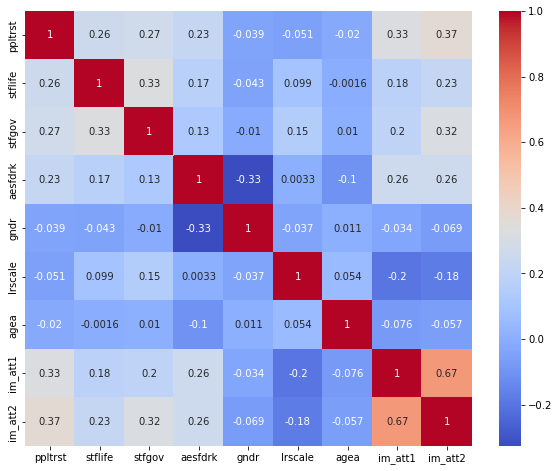

In [202]:
plt.figure(figsize=(10,8))
sns.heatmap(ger_14.corr(), annot=True, cmap="coolwarm");

In [203]:
ger_14.describe()

,ppltrst,stflife,stfgov,aesfdrk,gndr,lrscale,agea,im_att1,im_att2
count,2824.000000,2824.000000,2824.000000,2824.000000,2824.000000,2824.000000,2824.000000,2824.000000,2824.000000
mean,5.134207,7.450071,5.010623,3.032578,0.481586,4.506374,50.080028,3.013279,5.796801
std,2.170727,1.996540,2.131996,0.754019,0.499749,1.909935,18.091376,0.676346,2.019241
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,15.000000,1.000000,0.000000
25%,4.000000,7.000000,4.000000,3.000000,0.000000,3.000000,36.000000,2.666667,4.666667
50%,5.000000,8.000000,5.000000,3.000000,0.000000,5.000000,51.000000,3.000000,6.000000
75%,7.000000,9.000000,7.000000,4.000000,1.000000,5.000000,64.000000,3.333333,7.333333
max,10.000000,10.000000,10.000000,4.000000,1.000000,10.000000,93.000000,4.000000,10.000000


### Finland 2014

In [204]:
fin_14 = df_14_end[df_14_end.cntry == 'FI']
fin_14

,cntry,ppltrst,stflife,stfgov,aesfdrk,gndr,lrscale,agea,im_att1,im_att2
3045,FI,10.0,10.0,8.0,4.0,1.0,NaN,78.0,4.000000,NaN
3046,FI,5.0,6.0,NaN,1.0,0.0,5.0,74.0,2.000000,NaN
3047,FI,8.0,8.0,4.0,3.0,0.0,6.0,24.0,2.333333,5.000000
3048,FI,4.0,10.0,5.0,4.0,0.0,5.0,38.0,2.000000,5.000000
3049,FI,8.0,8.0,4.0,4.0,1.0,7.0,55.0,2.333333,6.000000
...,...,...,...,...,...,...,...,...,...,...
5127,FI,7.0,9.0,9.0,4.0,1.0,5.0,22.0,3.333333,4.000000
5128,FI,6.0,8.0,7.0,3.0,1.0,NaN,25.0,3.500000,7.000000
5129,FI,4.0,6.0,1.0,3.0,1.0,7.0,30.0,2.000000,5.333333
5130,FI,8.0,8.0,4.0,4.0,1.0,7.0,36.0,2.666667,5.000000


In [205]:
fin_14.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 3045 to 5131
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cntry    2080 non-null   object 
 1   ppltrst  2077 non-null   float64
 2   stflife  2078 non-null   float64
 3   stfgov   2041 non-null   float64
 4   aesfdrk  2076 non-null   float64
 5   gndr     2080 non-null   float64
 6   lrscale  1997 non-null   float64
 7   agea     2080 non-null   float64
 8   im_att1  2062 non-null   float64
 9   im_att2  2073 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.8+ KB


In [206]:
fin_14.isnull().sum()

cntry       0
ppltrst     3
stflife     2
stfgov     39
aesfdrk     4
gndr        0
lrscale    83
agea        0
im_att1    18
im_att2     7
dtype: int64

In [207]:
fin_14.dropna(inplace=True)

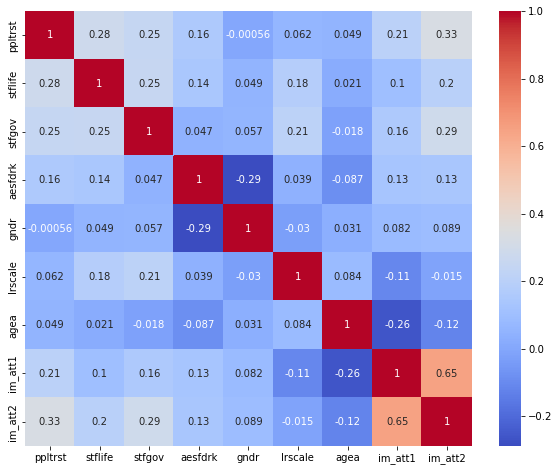

In [208]:
plt.figure(figsize=(10,8))
sns.heatmap(fin_14.corr(), annot=True, cmap="coolwarm");

In [209]:
fin_14.describe()

,ppltrst,stflife,stfgov,aesfdrk,gndr,lrscale,agea,im_att1,im_att2
count,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000
mean,6.757406,7.939224,4.382022,3.318182,0.501021,5.597549,51.288049,2.542731,5.922880
std,1.853027,1.543074,2.127063,0.638075,0.500127,1.992945,18.694154,0.708163,1.864486
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,15.000000,1.000000,0.000000
25%,6.000000,7.000000,3.000000,3.000000,0.000000,5.000000,36.000000,2.000000,5.000000
50%,7.000000,8.000000,4.000000,3.000000,1.000000,5.000000,53.000000,2.333333,6.000000
75%,8.000000,9.000000,6.000000,4.000000,1.000000,7.000000,66.000000,3.000000,7.333333
max,10.000000,10.000000,10.000000,4.000000,1.000000,10.000000,93.000000,4.000000,10.000000


### Norway 2014

In [210]:
nor_14 = df_14_end[df_14_end.cntry == 'NO']
nor_14

,cntry,ppltrst,stflife,stfgov,aesfdrk,gndr,lrscale,agea,im_att1,im_att2
7051,NO,8.0,5.0,9.0,4.0,0.0,7.0,43.0,4.000000,3.666667
7052,NO,5.0,5.0,3.0,4.0,1.0,4.0,46.0,3.000000,5.333333
7053,NO,10.0,9.0,2.0,3.0,1.0,4.0,37.0,3.000000,4.000000
7054,NO,5.0,7.0,6.0,3.0,0.0,8.0,20.0,3.000000,4.333333
7055,NO,9.0,4.0,9.0,4.0,0.0,10.0,74.0,3.333333,7.000000
...,...,...,...,...,...,...,...,...,...,...
8482,NO,10.0,10.0,5.0,3.0,1.0,5.0,79.0,2.000000,5.000000
8483,NO,8.0,9.0,7.0,4.0,1.0,8.0,43.0,4.000000,6.333333
8484,NO,8.0,8.0,7.0,4.0,0.0,5.0,48.0,4.000000,7.000000
8485,NO,5.0,8.0,4.0,4.0,0.0,4.0,28.0,3.000000,6.333333


In [211]:
nor_14.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1432 entries, 7051 to 8486
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cntry    1432 non-null   object 
 1   ppltrst  1431 non-null   float64
 2   stflife  1430 non-null   float64
 3   stfgov   1404 non-null   float64
 4   aesfdrk  1432 non-null   float64
 5   gndr     1432 non-null   float64
 6   lrscale  1397 non-null   float64
 7   agea     1432 non-null   float64
 8   im_att1  1425 non-null   float64
 9   im_att2  1430 non-null   float64
dtypes: float64(9), object(1)
memory usage: 123.1+ KB


In [212]:
nor_14.isnull().sum()

cntry       0
ppltrst     1
stflife     2
stfgov     28
aesfdrk     0
gndr        0
lrscale    35
agea        0
im_att1     7
im_att2     2
dtype: int64

In [213]:
nor_14.dropna(inplace=True)

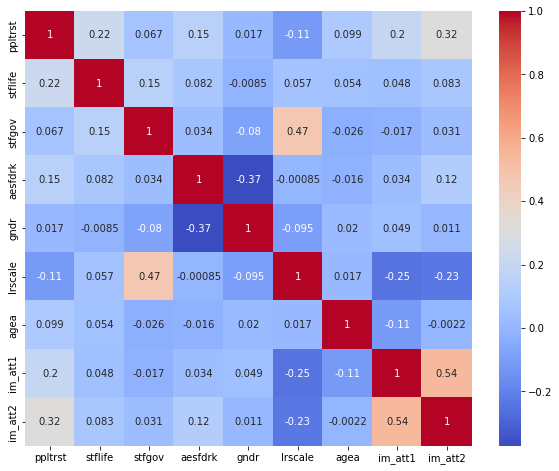

In [214]:
plt.figure(figsize=(10,8))
sns.heatmap(nor_14.corr(), annot=True, cmap="coolwarm");

In [215]:
nor_14.describe()

,ppltrst,stflife,stfgov,aesfdrk,gndr,lrscale,agea,im_att1,im_att2
count,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000
mean,6.645349,7.941860,5.608285,3.442587,0.463663,5.339390,46.818314,2.980741,5.687258
std,1.736649,1.693914,2.105899,0.683022,0.498859,2.104628,18.367057,0.633933,1.826654
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,15.000000,1.000000,0.000000
25%,5.000000,7.000000,4.000000,3.000000,0.000000,4.000000,32.000000,2.666667,4.666667
50%,7.000000,8.000000,6.000000,4.000000,0.000000,5.000000,47.000000,3.000000,5.666667
75%,8.000000,9.000000,7.000000,4.000000,1.000000,7.000000,61.250000,3.333333,7.000000
max,10.000000,10.000000,10.000000,4.000000,1.000000,10.000000,93.000000,4.000000,10.000000


### The Netherlands 2014

In [216]:
ned_14 = df_14_end[df_14_end.cntry == 'NL']
ned_14

,cntry,ppltrst,stflife,stfgov,aesfdrk,gndr,lrscale,agea,im_att1,im_att2
5132,NL,7.0,10.0,6.0,4.0,1.0,3.0,40.0,3.000000,7.000000
5133,NL,7.0,8.0,7.0,3.0,1.0,8.0,76.0,3.000000,4.333333
5134,NL,8.0,7.0,7.0,4.0,0.0,5.0,53.0,3.000000,7.333333
5135,NL,8.0,8.0,7.0,4.0,0.0,5.0,58.0,3.000000,9.000000
5136,NL,8.0,9.0,7.0,4.0,1.0,4.0,65.0,4.000000,7.000000
...,...,...,...,...,...,...,...,...,...,...
7046,NL,2.0,8.0,4.0,3.0,0.0,NaN,72.0,2.000000,5.333333
7047,NL,5.0,9.0,0.0,3.0,1.0,8.0,68.0,1.666667,2.000000
7048,NL,5.0,9.0,4.0,3.0,0.0,7.0,68.0,2.666667,4.000000
7049,NL,7.0,7.0,7.0,3.0,1.0,3.0,43.0,3.000000,5.333333


In [217]:
ned_14.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1915 entries, 5132 to 7050
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cntry    1915 non-null   object 
 1   ppltrst  1913 non-null   float64
 2   stflife  1914 non-null   float64
 3   stfgov   1896 non-null   float64
 4   aesfdrk  1909 non-null   float64
 5   gndr     1915 non-null   float64
 6   lrscale  1788 non-null   float64
 7   agea     1915 non-null   float64
 8   im_att1  1904 non-null   float64
 9   im_att2  1909 non-null   float64
dtypes: float64(9), object(1)
memory usage: 164.6+ KB


In [218]:
ned_14.isnull().sum()

cntry        0
ppltrst      2
stflife      1
stfgov      19
aesfdrk      6
gndr         0
lrscale    127
agea         0
im_att1     11
im_att2      6
dtype: int64

In [219]:
ned_14.dropna(inplace=True)

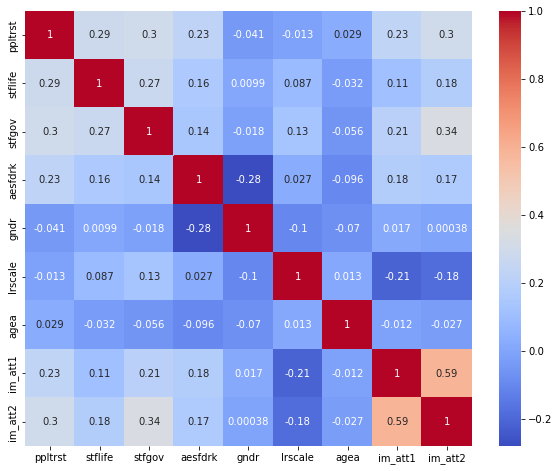

In [220]:
plt.figure(figsize=(10,8))
sns.heatmap(ned_14.corr(), annot=True, cmap="coolwarm");

In [221]:
ned_14.describe()

,ppltrst,stflife,stfgov,aesfdrk,gndr,lrscale,agea,im_att1,im_att2
count,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000
mean,6.044709,7.628183,5.075835,3.056027,0.546123,5.121675,51.451047,2.715997,5.403414
std,1.812794,1.464707,1.924074,0.620275,0.498009,1.904403,17.615169,0.719218,1.608657
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,14.000000,1.000000,0.000000
25%,5.000000,7.000000,4.000000,3.000000,0.000000,4.000000,38.000000,2.000000,4.500000
50%,7.000000,8.000000,5.000000,3.000000,1.000000,5.000000,53.000000,3.000000,5.666667
75%,7.000000,8.000000,7.000000,3.000000,1.000000,7.000000,65.000000,3.000000,6.333333
max,10.000000,10.000000,10.000000,4.000000,1.000000,10.000000,92.000000,4.000000,10.000000


### Sweden 2014

In [222]:
swe_14 = df_14_end[df_14_end.cntry == 'SE']
swe_14

,cntry,ppltrst,stflife,stfgov,aesfdrk,gndr,lrscale,agea,im_att1,im_att2
8493,SE,5.0,5.0,3.0,1.0,1.0,4.0,93.0,1.000000,1.333333
8494,SE,8.0,8.0,8.0,2.0,1.0,8.0,93.0,3.666667,6.000000
8495,SE,10.0,10.0,10.0,3.0,1.0,6.0,93.0,4.000000,6.000000
8496,SE,5.0,10.0,0.0,2.0,0.0,0.0,93.0,3.666667,8.333333
8497,SE,5.0,7.0,8.0,1.0,1.0,3.0,92.0,4.000000,6.333333
...,...,...,...,...,...,...,...,...,...,...
10273,SE,6.0,8.0,8.0,4.0,0.0,8.0,15.0,4.000000,6.666667
10274,SE,4.0,8.0,6.0,4.0,1.0,6.0,15.0,4.000000,6.000000
10275,SE,5.0,9.0,7.0,2.0,0.0,7.0,44.0,3.000000,5.000000
10276,SE,8.0,9.0,NaN,4.0,0.0,5.0,15.0,2.333333,3.333333


In [223]:
swe_14.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1783 entries, 8493 to 10277
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cntry    1783 non-null   object 
 1   ppltrst  1781 non-null   float64
 2   stflife  1780 non-null   float64
 3   stfgov   1645 non-null   float64
 4   aesfdrk  1777 non-null   float64
 5   gndr     1783 non-null   float64
 6   lrscale  1714 non-null   float64
 7   agea     1783 non-null   float64
 8   im_att1  1762 non-null   float64
 9   im_att2  1779 non-null   float64
dtypes: float64(9), object(1)
memory usage: 153.2+ KB


In [224]:
swe_14.isnull().sum()

cntry        0
ppltrst      2
stflife      3
stfgov     138
aesfdrk      6
gndr         0
lrscale     69
agea         0
im_att1     21
im_att2      4
dtype: int64

In [225]:
swe_14.dropna(inplace=True)

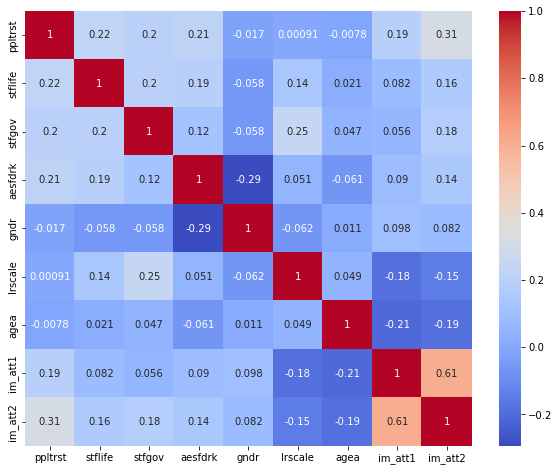

In [226]:
plt.figure(figsize=(10,8))
sns.heatmap(swe_14.corr(), annot=True, cmap="coolwarm");

In [227]:
swe_14.describe()

,ppltrst,stflife,stfgov,aesfdrk,gndr,lrscale,agea,im_att1,im_att2
count,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000
mean,6.283460,7.916667,5.363636,3.304293,0.501894,5.031566,49.533460,3.330808,6.576494
std,1.976445,1.641033,2.252891,0.748691,0.500154,2.406354,19.413124,0.602218,1.914191
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,15.000000,1.000000,0.000000
25%,5.000000,7.000000,4.000000,3.000000,0.000000,3.000000,33.000000,3.000000,5.333333
50%,7.000000,8.000000,6.000000,3.000000,1.000000,5.000000,50.000000,3.000000,6.666667
75%,8.000000,9.000000,7.000000,4.000000,1.000000,7.000000,66.000000,4.000000,8.000000
max,10.000000,10.000000,10.000000,4.000000,1.000000,10.000000,93.000000,4.000000,10.000000


## ESS 2012

In [234]:
df_12 = pd.read_stata('ESS_2012.dta')

In [235]:
df_12.head()

,name,essround,edition,proddate,idno,cntry,tvtot,tvpol,ppltrst,pplfair,...,supqad1,supqad2,supqdd,supqmm,supqyr,dweight,pspwght,pweight,country,aaa
0,ESS6e02_4,6,2.4,01.12.2018,11000031,DE,"0,5 hour to 1 hour","Less than 0,5 hour",3,8,...,NaN,Face to face interview,13.0,9.0,2012.0,1.236953,1.245957,2.400664,DE,7.0
1,ESS6e02_4,6,2.4,01.12.2018,11000041,DE,More than 3 hours,"More than 2 hours, up to 2,5 hours",7,7,...,NaN,Face to face interview,20.0,9.0,2012.0,1.236953,0.852662,2.400664,DE,7.0
2,ESS6e02_4,6,2.4,01.12.2018,11000051,DE,"More than 1 hour, up to 1,5 hours","Less than 0,5 hour",3,5,...,NaN,Face to face interview,20.0,9.0,2012.0,0.540574,0.578544,2.400664,DE,7.0
3,ESS6e02_4,6,2.4,01.12.2018,11000061,DE,More than 3 hours,"Less than 0,5 hour",6,5,...,NaN,Face to face interview,30.0,11.0,2012.0,1.236953,1.336935,2.400664,DE,7.0
4,ESS6e02_4,6,2.4,01.12.2018,11000071,DE,"More than 1,5 hours, up to 2 hours","Less than 0,5 hour",5,6,...,NaN,Face to face interview,21.0,9.0,2012.0,1.236953,0.738026,2.400664,DE,7.0


In [237]:
df_12 = df_12[df_12.cntry.isin(['DE', 'FI', 'NL', 'NO', 'SE'])]

In [238]:
df_12.cntry.value_counts()

DE    2958
FI    2197
SE    1847
NL    1845
NO    1624
Name: cntry, dtype: int64

In [239]:
df_12.imsmetn.value_counts()

Allow some                          5393
Allow many to come and live here    2748
Allow a few                         1937
Allow none                           254
Name: imsmetn, dtype: int64

In [240]:
df_12[['imsmetn', 'imdfetn', 'impcntr']] = df_12[['imsmetn', 'imdfetn', 'impcntr']].applymap(convert_1)

In [241]:
df_12[['imsmetn', 'imdfetn', 'impcntr']]

,imsmetn,imdfetn,impcntr
0,4.0,2.0,2.0
1,4.0,4.0,3.0
2,3.0,3.0,3.0
3,3.0,3.0,2.0
4,3.0,3.0,3.0
...,...,...,...
10466,3.0,3.0,3.0
10467,4.0,4.0,3.0
10468,3.0,3.0,3.0
10469,3.0,3.0,3.0


In [242]:
df_12['im_att1'] = np.apply_along_axis(combine, axis = 1, arr = df_12[['imsmetn', 'imdfetn', 'impcntr']].values)

In [243]:
df_12['im_att1']

0        2.666667
1        3.666667
2        3.000000
3        2.666667
4        3.000000
           ...   
10466    3.000000
10467    3.666667
10468    3.000000
10469    3.000000
10470    3.000000
Name: im_att1, Length: 10471, dtype: float64

In [244]:
df_12.imbgeco = df_12.imbgeco.apply(convert_2)

In [245]:
df_12.imueclt = df_12.imueclt.apply(convert_3)

In [246]:
df_12.imwbcnt = df_12.imwbcnt.apply(convert_4)

In [247]:
df_12[['imbgeco', 'imueclt', 'imwbcnt']]

,imbgeco,imueclt,imwbcnt
0,8,5,5
1,10,8,8
2,6,8,4
3,5,2,5
4,8,5,5
...,...,...,...
10466,4,5,5
10467,6,8,7
10468,5,NaN,NaN
10469,5,4,3


In [248]:
df_12['im_att2'] = np.apply_along_axis(combine, axis = 1, arr = df_12[['imbgeco', 'imueclt', 'imwbcnt']].values)

In [249]:
df_12.ppltrst = df_12.ppltrst.apply(convert_5)

In [250]:
df_12.stflife = df_12.stflife.apply(convert_6)

In [251]:
df_12.stfgov = df_12.stfgov.apply(convert_6)

In [252]:
df_12.aesfdrk = df_12.aesfdrk.apply(convert_7)

In [253]:
df_12.gndr = df_12.gndr.map({'Female': 1, 'Male': 0})

In [254]:
df_12.lrscale = df_12.lrscale.apply(convert_8)

In [255]:
df_12 = df_12[df_12.agea < 94]

In [256]:
df_12.agea.isnull().sum()

0

In [257]:
df_12_end = df_12[['cntry', 'ppltrst', 'stflife', 'stfgov', 
                 'aesfdrk', 'gndr', 'lrscale', 'agea', 'im_att1', 'im_att2']]

In [258]:
df_12_end

,cntry,ppltrst,stflife,stfgov,aesfdrk,gndr,lrscale,agea,im_att1,im_att2
0,DE,3,8,3,4,1,4,51.0,2.666667,6.000000
1,DE,7,9,7,3,0,4,75.0,3.666667,8.666667
2,DE,3,9,6,4,0,5,42.0,3.000000,6.000000
3,DE,6,10,5,1,1,5,20.0,2.666667,4.000000
4,DE,5,7,3,3,0,NaN,50.0,3.000000,6.000000
...,...,...,...,...,...,...,...,...,...,...
10466,SE,3,10,7,2,0,3,15.0,3.000000,4.666667
10467,SE,6,8,4,4,0,7,15.0,3.666667,7.000000
10468,SE,6,8,8,3,1,5,15.0,3.000000,5.000000
10469,SE,5,10,3,2,1,NaN,15.0,3.000000,4.000000


In [259]:
df_12_end.dtypes

cntry        object
ppltrst    category
stflife    category
stfgov     category
aesfdrk    category
gndr       category
lrscale    category
agea       category
im_att1     float64
im_att2     float64
dtype: object

In [260]:
df_12_end = df_12_end.astype({'ppltrst':'float64', 'stflife':'float64', 'stfgov':'float64', 'aesfdrk':'float64',
                              'gndr':'float64', 'lrscale':'float64', 'agea':'float64', 'im_att1':'float64', 
                              'im_att2':'float64', 'cntry':'object'})

In [261]:
df_12_end.dtypes

cntry       object
ppltrst    float64
stflife    float64
stfgov     float64
aesfdrk    float64
gndr       float64
lrscale    float64
agea       float64
im_att1    float64
im_att2    float64
dtype: object

### Germany 2012

In [262]:
ger_12 = df_12_end[df_12_end.cntry == 'DE']
ger_12

,cntry,ppltrst,stflife,stfgov,aesfdrk,gndr,lrscale,agea,im_att1,im_att2
0,DE,3.0,8.0,3.0,4.0,1.0,4.0,51.0,2.666667,6.000000
1,DE,7.0,9.0,7.0,3.0,0.0,4.0,75.0,3.666667,8.666667
2,DE,3.0,9.0,6.0,4.0,0.0,5.0,42.0,3.000000,6.000000
3,DE,6.0,10.0,5.0,1.0,1.0,5.0,20.0,2.666667,4.000000
4,DE,5.0,7.0,3.0,3.0,0.0,NaN,50.0,3.000000,6.000000
...,...,...,...,...,...,...,...,...,...,...
2953,DE,4.0,8.0,6.0,3.0,1.0,8.0,76.0,3.000000,5.333333
2954,DE,6.0,8.0,2.0,3.0,0.0,3.0,46.0,3.666667,6.333333
2955,DE,3.0,8.0,7.0,3.0,0.0,7.0,75.0,4.000000,8.000000
2956,DE,2.0,8.0,0.0,2.0,1.0,5.0,80.0,2.333333,1.333333


In [263]:
ger_12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2948 entries, 0 to 2957
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cntry    2948 non-null   object 
 1   ppltrst  2947 non-null   float64
 2   stflife  2946 non-null   float64
 3   stfgov   2861 non-null   float64
 4   aesfdrk  2943 non-null   float64
 5   gndr     2948 non-null   float64
 6   lrscale  2812 non-null   float64
 7   agea     2948 non-null   float64
 8   im_att1  2933 non-null   float64
 9   im_att2  2944 non-null   float64
dtypes: float64(9), object(1)
memory usage: 253.3+ KB


In [264]:
ger_12.isnull().sum()

cntry        0
ppltrst      1
stflife      2
stfgov      87
aesfdrk      5
gndr         0
lrscale    136
agea         0
im_att1     15
im_att2      4
dtype: int64

In [265]:
ger_12.dropna(inplace=True)

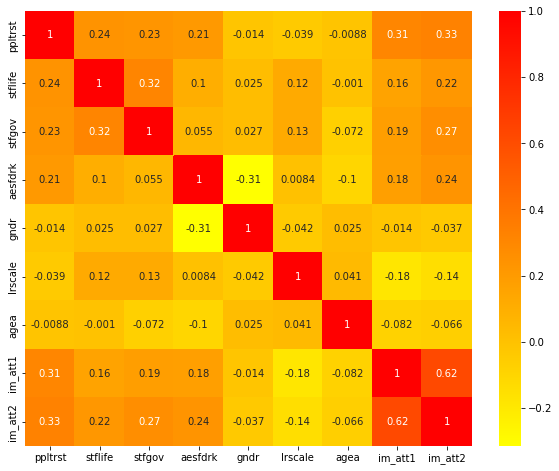

In [266]:
plt.figure(figsize=(10,8))
sns.heatmap(ger_12.corr(), annot=True, cmap="autumn_r");

In [267]:
ger_12.describe()

,ppltrst,stflife,stfgov,aesfdrk,gndr,lrscale,agea,im_att1,im_att2
count,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000
mean,4.926320,7.473974,4.796921,2.982405,0.487537,4.517595,48.988636,2.968047,5.765152
std,2.215076,2.035814,2.125465,0.772927,0.499936,1.901417,18.306928,0.671392,1.954196
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,15.000000,1.000000,0.000000
25%,3.000000,7.000000,3.000000,3.000000,0.000000,3.000000,34.000000,2.666667,4.666667
50%,5.000000,8.000000,5.000000,3.000000,0.000000,5.000000,50.000000,3.000000,6.000000
75%,7.000000,9.000000,6.000000,3.000000,1.000000,5.000000,63.000000,3.333333,7.000000
max,10.000000,10.000000,10.000000,4.000000,1.000000,10.000000,93.000000,4.000000,10.000000


### Finland 2012

In [268]:
fin_12 = df_12_end[df_12_end.cntry == 'FI']
fin_12

,cntry,ppltrst,stflife,stfgov,aesfdrk,gndr,lrscale,agea,im_att1,im_att2
2958,FI,5.0,5.0,1.0,4.0,0.0,7.0,37.0,2.000000,4.000000
2959,FI,5.0,8.0,7.0,3.0,0.0,5.0,57.0,2.000000,6.333333
2960,FI,5.0,9.0,7.0,3.0,1.0,5.0,84.0,NaN,8.000000
2961,FI,8.0,9.0,5.0,4.0,0.0,6.0,51.0,1.666667,6.000000
2962,FI,6.0,8.0,3.0,4.0,1.0,5.0,30.0,2.000000,2.666667
...,...,...,...,...,...,...,...,...,...,...
5150,FI,8.0,4.0,8.0,4.0,1.0,5.0,52.0,NaN,7.666667
5151,FI,10.0,5.0,4.0,3.0,0.0,2.0,45.0,2.000000,7.666667
5152,FI,5.0,10.0,10.0,3.0,1.0,3.0,17.0,3.666667,8.000000
5153,FI,3.0,8.0,NaN,3.0,1.0,5.0,34.0,2.666667,6.000000


In [269]:
fin_12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2195 entries, 2958 to 5154
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cntry    2195 non-null   object 
 1   ppltrst  2194 non-null   float64
 2   stflife  2192 non-null   float64
 3   stfgov   2168 non-null   float64
 4   aesfdrk  2189 non-null   float64
 5   gndr     2195 non-null   float64
 6   lrscale  2094 non-null   float64
 7   agea     2195 non-null   float64
 8   im_att1  2175 non-null   float64
 9   im_att2  2193 non-null   float64
dtypes: float64(9), object(1)
memory usage: 188.6+ KB


In [270]:
fin_12.isnull().sum()

cntry        0
ppltrst      1
stflife      3
stfgov      27
aesfdrk      6
gndr         0
lrscale    101
agea         0
im_att1     20
im_att2      2
dtype: int64

In [271]:
fin_12.dropna(inplace=True)

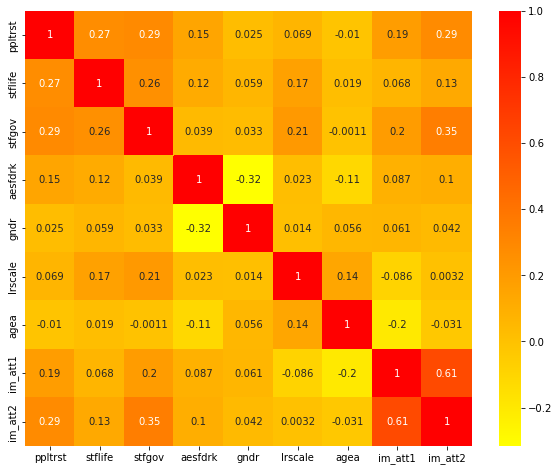

In [272]:
plt.figure(figsize=(10,8))
sns.heatmap(fin_12.corr(), annot=True, cmap="autumn_r");

In [273]:
fin_12.describe()

,ppltrst,stflife,stfgov,aesfdrk,gndr,lrscale,agea,im_att1,im_att2
count,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000
mean,6.601167,8.117704,5.857977,3.307879,0.500000,5.666342,49.790370,2.551475,6.102464
std,1.787079,1.378231,1.926449,0.632499,0.500122,2.041076,18.436986,0.645580,1.639127
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,15.000000,1.000000,0.000000
25%,5.000000,8.000000,5.000000,3.000000,0.000000,5.000000,35.000000,2.000000,5.000000
50%,7.000000,8.000000,6.000000,3.000000,0.500000,5.000000,51.000000,2.666667,6.333333
75%,8.000000,9.000000,7.000000,4.000000,1.000000,7.000000,64.000000,3.000000,7.333333
max,10.000000,10.000000,10.000000,4.000000,1.000000,10.000000,93.000000,4.000000,10.000000


### Norway 2012

In [274]:
nor_12 = df_12_end[df_12_end.cntry == 'NO']
nor_12

,cntry,ppltrst,stflife,stfgov,aesfdrk,gndr,lrscale,agea,im_att1,im_att2
7000,NO,7.0,9.0,7.0,3.0,0.0,5.0,63.0,3.000000,7.000000
7001,NO,9.0,8.0,5.0,4.0,1.0,8.0,55.0,3.000000,9.333333
7002,NO,7.0,8.0,7.0,3.0,0.0,6.0,40.0,3.000000,5.666667
7003,NO,2.0,9.0,6.0,3.0,1.0,5.0,15.0,3.666667,5.000000
7004,NO,8.0,8.0,7.0,4.0,0.0,3.0,48.0,3.000000,7.333333
...,...,...,...,...,...,...,...,...,...,...
8619,NO,7.0,9.0,7.0,4.0,0.0,7.0,68.0,3.000000,7.000000
8620,NO,5.0,8.0,6.0,4.0,0.0,5.0,38.0,2.000000,5.666667
8621,NO,7.0,8.0,4.0,4.0,0.0,5.0,18.0,1.666667,3.666667
8622,NO,6.0,7.0,4.0,4.0,1.0,6.0,38.0,2.000000,4.333333


In [275]:
nor_12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1623 entries, 7000 to 8623
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cntry    1623 non-null   object 
 1   ppltrst  1619 non-null   float64
 2   stflife  1621 non-null   float64
 3   stfgov   1610 non-null   float64
 4   aesfdrk  1619 non-null   float64
 5   gndr     1623 non-null   float64
 6   lrscale  1601 non-null   float64
 7   agea     1623 non-null   float64
 8   im_att1  1613 non-null   float64
 9   im_att2  1620 non-null   float64
dtypes: float64(9), object(1)
memory usage: 139.5+ KB


In [276]:
nor_12.isnull().sum()

cntry       0
ppltrst     4
stflife     2
stfgov     13
aesfdrk     4
gndr        0
lrscale    22
agea        0
im_att1    10
im_att2     3
dtype: int64

In [277]:
nor_12.dropna(inplace=True)

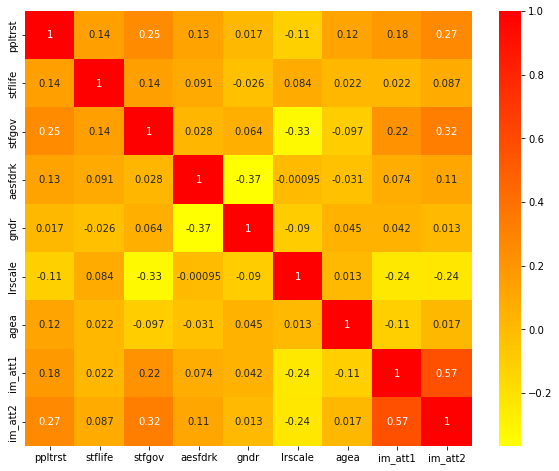

In [278]:
plt.figure(figsize=(10,8))
sns.heatmap(nor_12.corr(), annot=True, cmap="autumn_r");

In [279]:
nor_12.describe()

,ppltrst,stflife,stfgov,aesfdrk,gndr,lrscale,agea,im_att1,im_att2
count,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000
mean,6.709779,8.131230,5.851104,3.416404,0.469401,5.639748,46.083912,2.911462,5.893691
std,1.738690,1.568049,1.975363,0.704949,0.499220,2.110474,18.016544,0.659243,1.783618
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,15.000000,1.000000,0.000000
25%,6.000000,8.000000,5.000000,3.000000,0.000000,4.000000,32.000000,2.333333,5.000000
50%,7.000000,8.000000,6.000000,4.000000,0.000000,5.000000,46.000000,3.000000,6.000000
75%,8.000000,9.000000,7.000000,4.000000,1.000000,7.000000,60.000000,3.000000,7.000000
max,10.000000,10.000000,10.000000,4.000000,1.000000,10.000000,93.000000,4.000000,10.000000


### The Netherlands 2012

In [280]:
ned_12 = df_12_end[df_12_end.cntry == 'NL']
ned_12

,cntry,ppltrst,stflife,stfgov,aesfdrk,gndr,lrscale,agea,im_att1,im_att2
5155,NL,7.0,9.0,7.0,2.0,0.0,8.0,53.0,2.666667,7.000000
5156,NL,3.0,6.0,2.0,3.0,0.0,7.0,41.0,2.000000,1.333333
5157,NL,8.0,7.0,4.0,4.0,0.0,7.0,42.0,2.666667,7.000000
5158,NL,6.0,7.0,NaN,4.0,0.0,5.0,87.0,3.000000,4.500000
5159,NL,2.0,6.0,5.0,2.0,0.0,5.0,78.0,2.000000,4.333333
...,...,...,...,...,...,...,...,...,...,...
6995,NL,4.0,5.0,0.0,3.0,0.0,10.0,37.0,2.333333,4.666667
6996,NL,2.0,10.0,0.0,3.0,0.0,NaN,46.0,1.000000,7.000000
6997,NL,7.0,7.0,4.0,3.0,1.0,5.0,56.0,4.000000,7.000000
6998,NL,5.0,8.0,5.0,3.0,0.0,5.0,71.0,3.000000,6.666667


In [281]:
ned_12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1844 entries, 5155 to 6999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cntry    1844 non-null   object 
 1   ppltrst  1842 non-null   float64
 2   stflife  1844 non-null   float64
 3   stfgov   1809 non-null   float64
 4   aesfdrk  1836 non-null   float64
 5   gndr     1844 non-null   float64
 6   lrscale  1773 non-null   float64
 7   agea     1844 non-null   float64
 8   im_att1  1827 non-null   float64
 9   im_att2  1843 non-null   float64
dtypes: float64(9), object(1)
memory usage: 158.5+ KB


In [282]:
ned_12.isnull().sum()

cntry       0
ppltrst     2
stflife     0
stfgov     35
aesfdrk     8
gndr        0
lrscale    71
agea        0
im_att1    17
im_att2     1
dtype: int64

In [283]:
ned_12.dropna(inplace=True)

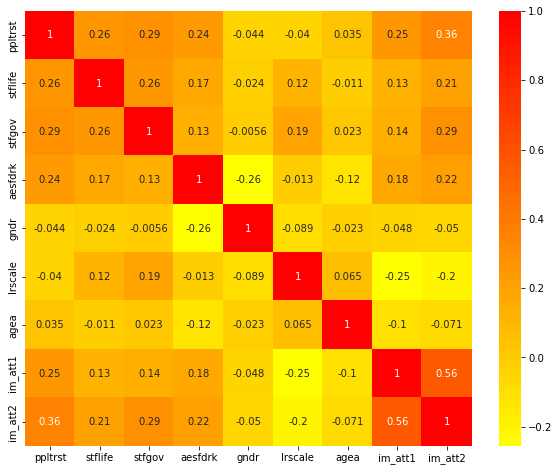

In [284]:
plt.figure(figsize=(10,8))
sns.heatmap(ned_12.corr(), annot=True, cmap="autumn_r");

In [285]:
ned_12.describe()

,ppltrst,stflife,stfgov,aesfdrk,gndr,lrscale,agea,im_att1,im_att2
count,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000
mean,5.965837,7.786914,5.107701,3.042270,0.526346,5.320208,51.089172,2.647076,5.646979
std,1.992015,1.518443,1.856679,0.660907,0.499450,2.123630,17.653027,0.745109,1.616112
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,15.000000,1.000000,0.000000
25%,5.000000,7.000000,4.000000,3.000000,0.000000,4.000000,38.000000,2.000000,4.666667
50%,7.000000,8.000000,5.000000,3.000000,1.000000,5.000000,51.000000,3.000000,5.666667
75%,7.000000,9.000000,6.000000,3.000000,1.000000,7.000000,65.000000,3.000000,6.666667
max,10.000000,10.000000,10.000000,4.000000,1.000000,10.000000,93.000000,4.000000,10.000000


### Sweden 2012

In [286]:
swe_12 = df_12_end[df_12_end.cntry == 'SE']
swe_12

,cntry,ppltrst,stflife,stfgov,aesfdrk,gndr,lrscale,agea,im_att1,im_att2
8625,SE,10.0,9.0,8.0,4.0,0.0,7.0,92.0,4.000000,6.666667
8626,SE,6.0,9.0,1.0,4.0,0.0,2.0,92.0,3.000000,8.500000
8627,SE,3.0,8.0,8.0,NaN,1.0,8.0,92.0,3.000000,4.500000
8628,SE,6.0,9.0,8.0,4.0,0.0,6.0,90.0,4.000000,7.333333
8629,SE,6.0,7.0,3.0,3.0,0.0,2.0,90.0,4.000000,7.333333
...,...,...,...,...,...,...,...,...,...,...
10466,SE,3.0,10.0,7.0,2.0,0.0,3.0,15.0,3.000000,4.666667
10467,SE,6.0,8.0,4.0,4.0,0.0,7.0,15.0,3.666667,7.000000
10468,SE,6.0,8.0,8.0,3.0,1.0,5.0,15.0,3.000000,5.000000
10469,SE,5.0,10.0,3.0,2.0,1.0,NaN,15.0,3.000000,4.000000


In [287]:
swe_12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1844 entries, 8625 to 10470
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cntry    1844 non-null   object 
 1   ppltrst  1840 non-null   float64
 2   stflife  1841 non-null   float64
 3   stfgov   1778 non-null   float64
 4   aesfdrk  1840 non-null   float64
 5   gndr     1844 non-null   float64
 6   lrscale  1752 non-null   float64
 7   agea     1844 non-null   float64
 8   im_att1  1823 non-null   float64
 9   im_att2  1838 non-null   float64
dtypes: float64(9), object(1)
memory usage: 158.5+ KB


In [288]:
swe_12.isnull().sum()

cntry       0
ppltrst     4
stflife     3
stfgov     66
aesfdrk     4
gndr        0
lrscale    92
agea        0
im_att1    21
im_att2     6
dtype: int64

In [289]:
swe_12.dropna(inplace=True)

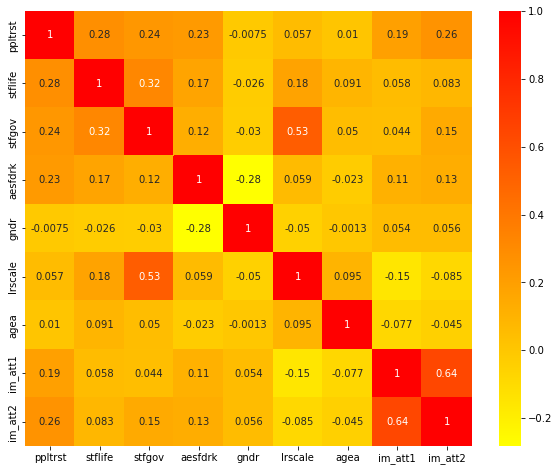

In [290]:
plt.figure(figsize=(10,8))
sns.heatmap(swe_12.corr(), annot=True, cmap="autumn_r");

In [291]:
swe_12.describe()

,ppltrst,stflife,stfgov,aesfdrk,gndr,lrscale,agea,im_att1,im_att2
count,1701.000000,1701.000000,1701.000000,1701.000000,1701.000000,1701.000000,1701.000000,1701.000000,1701.000000
mean,6.061728,7.884774,5.650206,3.299236,0.477366,5.319812,48.567313,3.193906,6.326671
std,2.056914,1.673217,2.179972,0.747029,0.499634,2.228957,18.517552,0.639145,1.945379
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,15.000000,1.000000,0.000000
25%,5.000000,7.000000,4.000000,3.000000,0.000000,4.000000,33.000000,3.000000,5.000000
50%,7.000000,8.000000,6.000000,3.000000,0.000000,5.000000,49.000000,3.000000,6.333333
75%,8.000000,9.000000,7.000000,4.000000,1.000000,7.000000,64.000000,4.000000,7.666667
max,10.000000,10.000000,10.000000,4.000000,1.000000,10.000000,92.000000,4.000000,10.000000


## Statistical Analysis Phase

### Interpersonal Trust

<p style="text-align : center"><b>Germany</b></p>

In [295]:
# Assuming normality and equal population variances
stats.f_oneway(ger_12.ppltrst, ger_14.ppltrst, ger_16.ppltrst, ger_18.ppltrst)

F_onewayResult(statistic=27.012062086902727, pvalue=2.1425272071223047e-17)

In [296]:
stats.ttest_ind(ger_12.ppltrst, ger_18.ppltrst)

Ttest_indResult(statistic=-8.169250595593818, pvalue=3.9063046844257347e-16)

In [297]:
ger_12.ppltrst.mean(), ger_14.ppltrst.mean(), ger_16.ppltrst.mean(), ger_18.ppltrst.mean()

(4.926319648093842, 5.134206798866855, 5.329137356534617, 5.442333785617368)

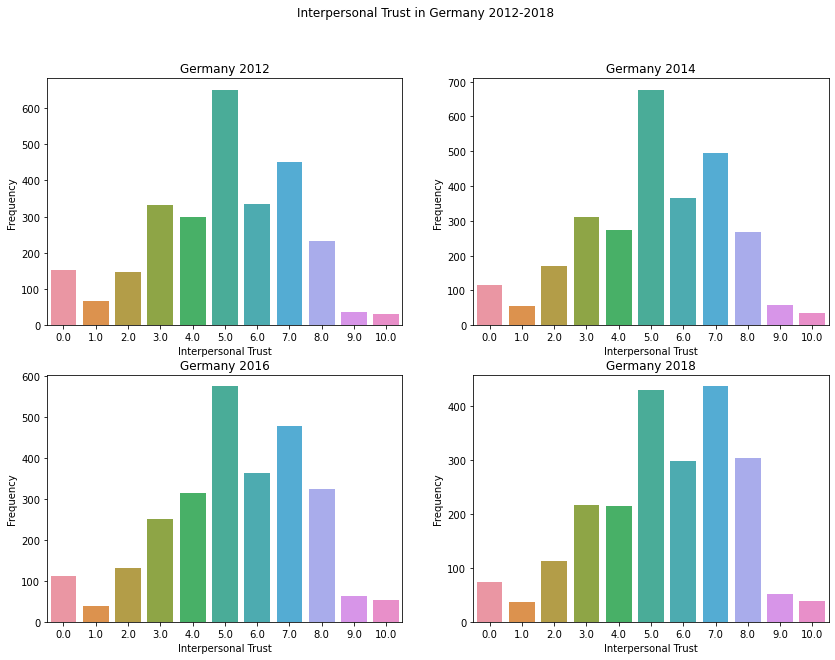

In [298]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
sns.countplot('ppltrst', data=ger_12, ax=ax[0][0])
ax[0][0].set(xlabel="Interpersonal Trust", ylabel='Frequency', title='Germany 2012')
sns.countplot('ppltrst', data=ger_14, ax=ax[0][1])
ax[0][1].set(xlabel="Interpersonal Trust", ylabel='Frequency', title='Germany 2014')
sns.countplot('ppltrst', data=ger_16, ax=ax[1][0])
ax[1][0].set(xlabel="Interpersonal Trust", ylabel='Frequency', title='Germany 2016')
sns.countplot('ppltrst', data=ger_18, ax=ax[1][1])
ax[1][1].set(xlabel="Interpersonal Trust", ylabel='Frequency', title='Germany 2018')
plt.suptitle('Interpersonal Trust in Germany 2012-2018')
plt.tight_layout;

<p style="text-align : center"><b>Finland</b></p>

In [299]:
# Assuming normality and equal population variances
stats.f_oneway(fin_12.ppltrst, fin_14.ppltrst, fin_16.ppltrst, fin_18.ppltrst)

F_onewayResult(statistic=11.643623441807438, pvalue=1.309132743064192e-07)

In [300]:
stats.ttest_ind(fin_12.ppltrst, fin_18.ppltrst)

Ttest_indResult(statistic=-6.088803326282525, pvalue=1.2532883168494443e-09)

In [301]:
fin_12.ppltrst.mean(), fin_14.ppltrst.mean(), fin_16.ppltrst.mean(), fin_18.ppltrst.mean()

(6.601167315175097, 6.757405515832482, 6.778263244128891, 6.955971049457177)

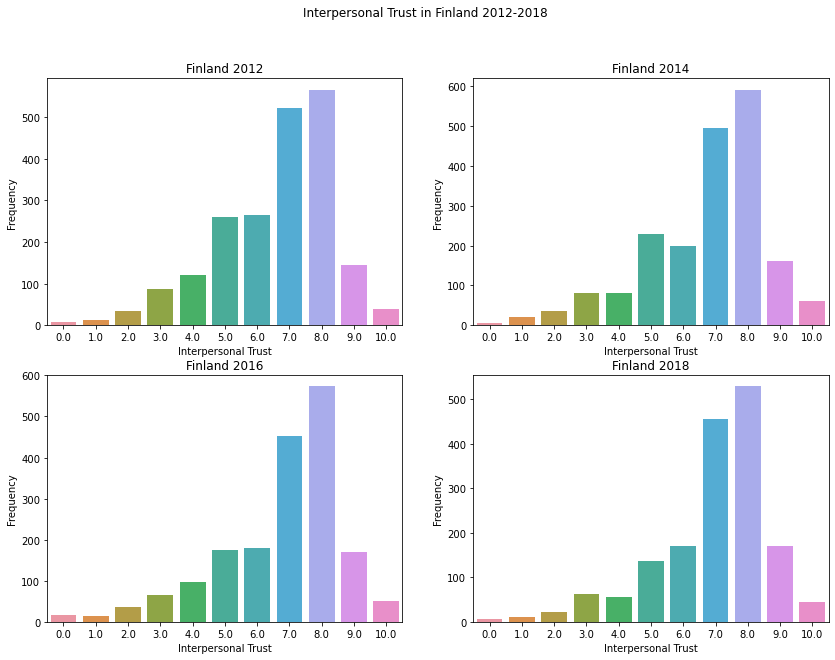

In [302]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
sns.countplot('ppltrst', data=fin_12, ax=ax[0][0])
ax[0][0].set(xlabel="Interpersonal Trust", ylabel='Frequency', title='Finland 2012')
sns.countplot('ppltrst', data=fin_14, ax=ax[0][1])
ax[0][1].set(xlabel="Interpersonal Trust", ylabel='Frequency', title='Finland 2014')
sns.countplot('ppltrst', data=fin_16, ax=ax[1][0])
ax[1][0].set(xlabel="Interpersonal Trust", ylabel='Frequency', title='Finland 2016')
sns.countplot('ppltrst', data=fin_18, ax=ax[1][1])
ax[1][1].set(xlabel="Interpersonal Trust", ylabel='Frequency', title='Finland 2018')
plt.suptitle('Interpersonal Trust in Finland 2012-2018')
plt.tight_layout;

<p style="text-align : center"><b>Norway</b></p>

In [303]:
# Assuming normality and equal population variances
stats.f_oneway(nor_12.ppltrst, nor_14.ppltrst, nor_16.ppltrst, nor_18.ppltrst)

F_onewayResult(statistic=3.2730122670588475, pvalue=0.020238205902403942)

In [304]:
stats.ttest_ind(nor_12.ppltrst, nor_18.ppltrst)

Ttest_indResult(statistic=-1.459859163354659, pvalue=0.14443724887701165)

In [305]:
nor_12.ppltrst.mean(), nor_14.ppltrst.mean(), nor_16.ppltrst.mean(), nor_18.ppltrst.mean()

(6.709779179810726, 6.645348837209302, 6.830175913396482, 6.808073115003808)

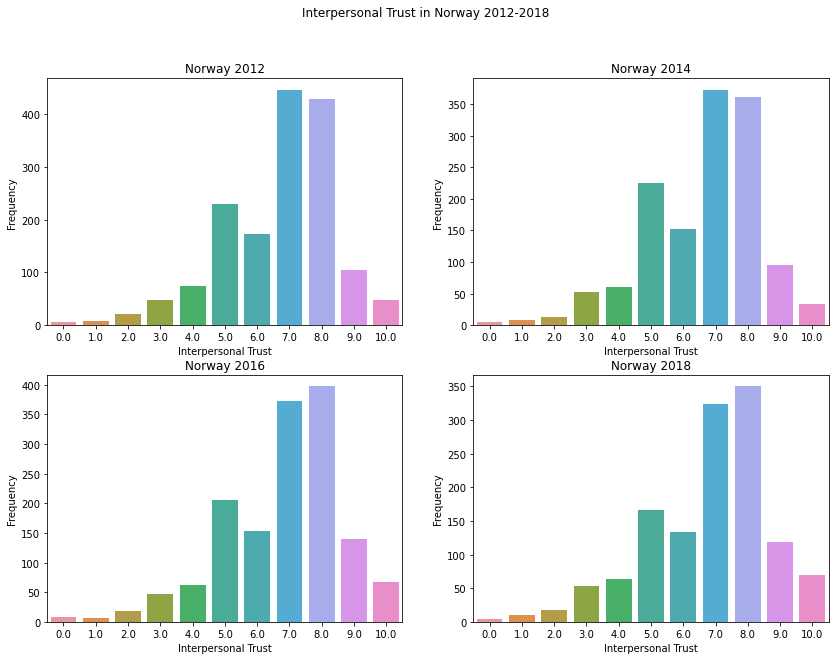

In [306]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
sns.countplot('ppltrst', data=nor_12, ax=ax[0][0])
ax[0][0].set(xlabel="Interpersonal Trust", ylabel='Frequency', title='Norway 2012')
sns.countplot('ppltrst', data=nor_14, ax=ax[0][1])
ax[0][1].set(xlabel="Interpersonal Trust", ylabel='Frequency', title='Norway 2014')
sns.countplot('ppltrst', data=nor_16, ax=ax[1][0])
ax[1][0].set(xlabel="Interpersonal Trust", ylabel='Frequency', title='Norway 2016')
sns.countplot('ppltrst', data=nor_18, ax=ax[1][1])
ax[1][1].set(xlabel="Interpersonal Trust", ylabel='Frequency', title='Norway 2018')
plt.suptitle('Interpersonal Trust in Norway 2012-2018')
plt.tight_layout;

<p style="text-align : center"><b>Netherlands</b></p>

In [307]:
# Assuming normality and equal population variances
stats.f_oneway(ned_12.ppltrst, ned_14.ppltrst, ned_16.ppltrst, ned_18.ppltrst)

F_onewayResult(statistic=7.500339586241612, pvalue=5.222128810444325e-05)

In [308]:
stats.ttest_ind(ned_12.ppltrst, ned_18.ppltrst)

Ttest_indResult(statistic=-4.595179819244661, pvalue=4.489108001433037e-06)

In [309]:
ned_12.ppltrst.mean(), ned_14.ppltrst.mean(), ned_16.ppltrst.mean(), ned_18.ppltrst.mean()

(5.965836711059641, 6.044708545557442, 6.068831168831169, 6.271220159151194)

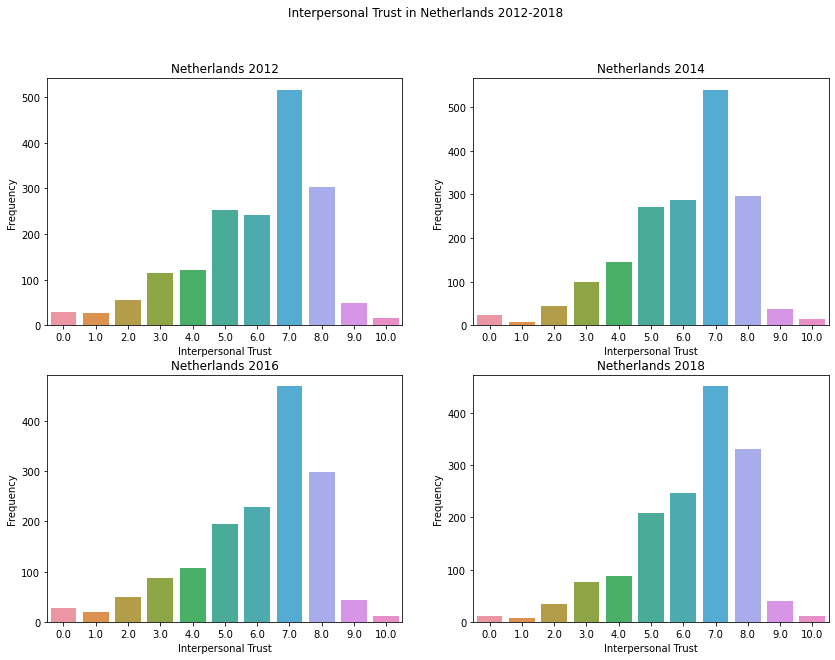

In [310]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
sns.countplot('ppltrst', data=ned_12, ax=ax[0][0])
ax[0][0].set(xlabel="Interpersonal Trust", ylabel='Frequency', title='Netherlands 2012')
sns.countplot('ppltrst', data=ned_14, ax=ax[0][1])
ax[0][1].set(xlabel="Interpersonal Trust", ylabel='Frequency', title='Netherlands 2014')
sns.countplot('ppltrst', data=ned_16, ax=ax[1][0])
ax[1][0].set(xlabel="Interpersonal Trust", ylabel='Frequency', title='Netherlands 2016')
sns.countplot('ppltrst', data=ned_18, ax=ax[1][1])
ax[1][1].set(xlabel="Interpersonal Trust", ylabel='Frequency', title='Netherlands 2018')
plt.suptitle('Interpersonal Trust in Netherlands 2012-2018')
plt.tight_layout;

<p style="text-align : center"><b>Sweden</b></p>

In [311]:
# Assuming normality and equal population variances
stats.f_oneway(swe_12.ppltrst, swe_14.ppltrst, swe_16.ppltrst, swe_18.ppltrst)

F_onewayResult(statistic=6.174215093127672, pvalue=0.0003474468162336647)

In [312]:
stats.ttest_ind(swe_12.ppltrst, swe_18.ppltrst)

Ttest_indResult(statistic=-4.033818330744778, pvalue=5.6185277315274434e-05)

In [313]:
swe_12.ppltrst.mean(), swe_14.ppltrst.mean(), swe_16.ppltrst.mean(), swe_18.ppltrst.mean()

(6.061728395061729, 6.283459595959596, 6.251235003528581, 6.356944444444444)

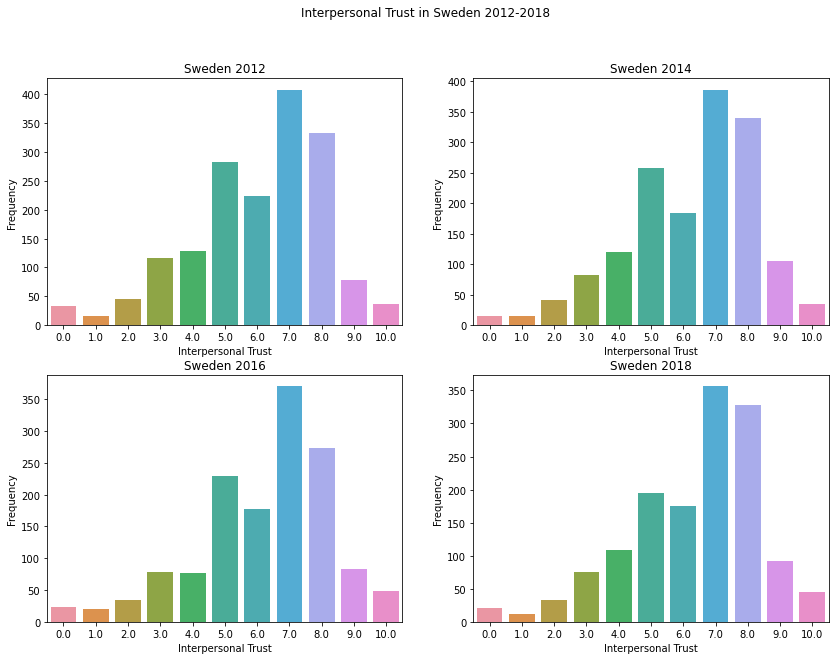

In [314]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
sns.countplot('ppltrst', data=swe_12, ax=ax[0][0])
ax[0][0].set(xlabel="Interpersonal Trust", ylabel='Frequency', title='Sweden 2012')
sns.countplot('ppltrst', data=swe_14, ax=ax[0][1])
ax[0][1].set(xlabel="Interpersonal Trust", ylabel='Frequency', title='Sweden 2014')
sns.countplot('ppltrst', data=swe_16, ax=ax[1][0])
ax[1][0].set(xlabel="Interpersonal Trust", ylabel='Frequency', title='Sweden 2016')
sns.countplot('ppltrst', data=swe_18, ax=ax[1][1])
ax[1][1].set(xlabel="Interpersonal Trust", ylabel='Frequency', title='Sweden 2018')
plt.suptitle('Interpersonal Trust in Sweden 2012-2018')
plt.tight_layout;

<p style="text-align : center"><b>Interpersonal Trust, 2012 - 2018</b></p>

```
The level of interpersonal trust changes in each country throughout the period from 2012 to 2018.
Statistically, we can say that the level of trust changed and significantly increased from 2012 to 2018 in each
country except Norway.
```

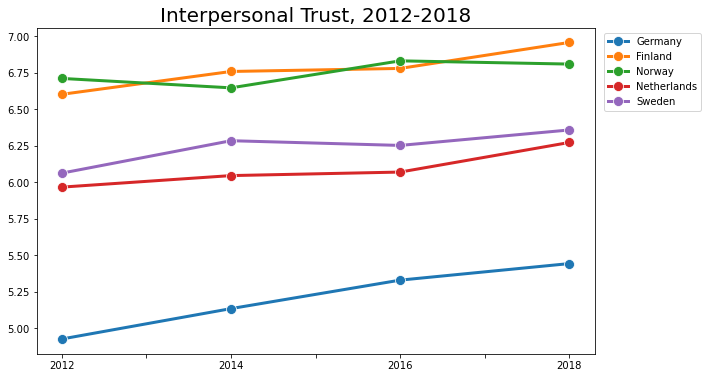

In [364]:
plt.figure(figsize=(10,6))
ax = plt.gca()
sns.lineplot(x=[2012,2014,2016,2018], 
            y=[ger_12.ppltrst.mean(), ger_14.ppltrst.mean(), ger_16.ppltrst.mean(), ger_18.ppltrst.mean()],
            label='Germany', linewidth=3, marker='o', markersize=10)
sns.lineplot(x=[2012,2014,2016,2018], 
            y=[fin_12.ppltrst.mean(), fin_14.ppltrst.mean(), fin_16.ppltrst.mean(), fin_18.ppltrst.mean()],
            label='Finland', linewidth=3, marker='o', markersize=10)
sns.lineplot(x=[2012,2014,2016,2018], 
            y=[nor_12.ppltrst.mean(), nor_14.ppltrst.mean(), nor_16.ppltrst.mean(), nor_18.ppltrst.mean()],
            label='Norway', linewidth=3, marker='o', markersize=10)
sns.lineplot(x=[2012,2014,2016,2018], 
            y=[ned_12.ppltrst.mean(), ned_14.ppltrst.mean(), ned_16.ppltrst.mean(), ned_18.ppltrst.mean()],
            label='Netherlands', linewidth=3, marker='o', markersize=10)
sns.lineplot(x=[2012,2014,2016,2018], 
            y=[swe_12.ppltrst.mean(), swe_14.ppltrst.mean(), swe_16.ppltrst.mean(), swe_18.ppltrst.mean()], 
             label='Sweden', linewidth=3, marker='o', markersize=10)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('Interpersonal Trust, 2012-2018', fontdict={'fontsize':20})
xticks = ax.xaxis.get_major_ticks()
xticks[2].label1.set_visible(False)
xticks[4].label1.set_visible(False)
xticks[6].label1.set_visible(False)

```
Compared to Finland and Norway, Swedish people trust others slightly less. Dutch people have similar trends with the Swedish. On the other hand, German people have the lowest level of trust toward others. Anyways, except Norway, all four countries have significantly higher levels of trust toward others. The increase in trust in Germany is quite obvious.
```

### Attitudes Toward Immigrants

In [377]:
# The relationship between interpersonal trust and attitude towards immigrants.

In [378]:
trust = [ger_12.ppltrst, ger_14.ppltrst, ger_16.ppltrst, ger_18.ppltrst]
imm = [ger_12.im_att1, ger_14.im_att1, ger_16.im_att1, ger_18.im_att1]
imm_2 = [ger_12.im_att2, ger_14.im_att2, ger_16.im_att2, ger_18.im_att2]
resa, resa2 = [], []
for i in range(4):
    a,b,c,d,e = stats.linregress(x=trust[i], y=imm[i])
    res1 = b + a * 5
    res2 = b + a * 10
    resa.append([res1, res2])
    a,b,c,d,e = stats.linregress(x=trust[i], y=imm_2[i])
    res1 = b + a * 5
    res2 = b + a * 10
    resa2.append([res1, res2])
sifir_1 = [i[0] for i in resa]
on_1 = [i[1] for i in resa]
sifir_2 = [i[0] for i in resa2]
on_2 = [i[1] for i in resa2]

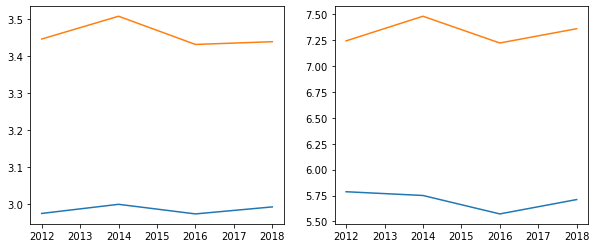

In [379]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.lineplot(x=[2012,2014,2016,2018], y=sifir_1, ax=ax[0])
sns.lineplot(x=[2012,2014,2016,2018], y=on_1, ax=ax[0])
sns.lineplot(x=[2012,2014,2016,2018], y=sifir_2, ax=ax[1])
sns.lineplot(x=[2012,2014,2016,2018], y=on_2, ax=ax[1]);

In [380]:
trust = [fin_12.ppltrst, fin_14.ppltrst, fin_16.ppltrst, fin_18.ppltrst]
imm = [fin_12.im_att1, fin_14.im_att1, fin_16.im_att1, fin_18.im_att1]
imm_2 = [fin_12.im_att2, fin_14.im_att2, fin_16.im_att2, fin_18.im_att2]
resa, resa2 = [], []
for i in range(4):
    a,b,c,d,e = stats.linregress(x=trust[i], y=imm[i])
    res1 = b + a * 5
    res2 = b + a * 10
    resa.append([res1, res2])
    a,b,c,d,e = stats.linregress(x=trust[i], y=imm_2[i])
    res1 = b + a * 5
    res2 = b + a * 10
    resa2.append([res1, res2])
sifir_1 = [i[0] for i in resa]
on_1 = [i[1] for i in resa]
sifir_2 = [i[0] for i in resa2]
on_2 = [i[1] for i in resa2]

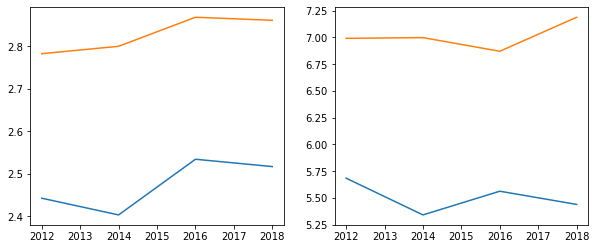

In [381]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.lineplot(x=[2012,2014,2016,2018], y=sifir_1, ax=ax[0])
sns.lineplot(x=[2012,2014,2016,2018], y=on_1, ax=ax[0])
sns.lineplot(x=[2012,2014,2016,2018], y=sifir_2, ax=ax[1])
sns.lineplot(x=[2012,2014,2016,2018], y=on_2, ax=ax[1]);

In [382]:
trust = [nor_12.ppltrst, nor_14.ppltrst, nor_16.ppltrst, nor_18.ppltrst]
imm = [nor_12.im_att1, nor_14.im_att1, nor_16.im_att1, nor_18.im_att1]
imm_2 = [nor_12.im_att2, nor_14.im_att2, nor_16.im_att2, nor_18.im_att2]
resa, resa2 = [], []
for i in range(4):
    a,b,c,d,e = stats.linregress(x=trust[i], y=imm[i])
    res1 = b + a * 5
    res2 = b + a * 10
    resa.append([res1, res2])
    a,b,c,d,e = stats.linregress(x=trust[i], y=imm_2[i])
    res1 = b + a * 5
    res2 = b + a * 10
    resa2.append([res1, res2])
sifir_1 = [i[0] for i in resa]
on_1 = [i[1] for i in resa]
sifir_2 = [i[0] for i in resa2]
on_2 = [i[1] for i in resa2]

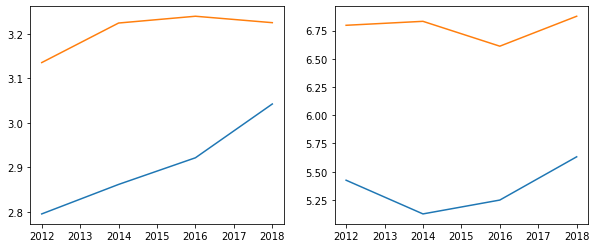

In [383]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.lineplot(x=[2012,2014,2016,2018], y=sifir_1, ax=ax[0])
sns.lineplot(x=[2012,2014,2016,2018], y=on_1, ax=ax[0])
sns.lineplot(x=[2012,2014,2016,2018], y=sifir_2, ax=ax[1])
sns.lineplot(x=[2012,2014,2016,2018], y=on_2, ax=ax[1]);

In [384]:
trust = [ned_12.ppltrst, ned_14.ppltrst, ned_16.ppltrst, ned_18.ppltrst]
imm = [ned_12.im_att1, ned_14.im_att1, ned_16.im_att1, ned_18.im_att1]
imm_2 = [ned_12.im_att2, ned_14.im_att2, ned_16.im_att2, ned_18.im_att2]
resa, resa2 = [], []
for i in range(4):
    a,b,c,d,e = stats.linregress(x=trust[i], y=imm[i])
    res1 = b + a * 5
    res2 = b + a * 10
    resa.append([res1, res2])
    a,b,c,d,e = stats.linregress(x=trust[i], y=imm_2[i])
    res1 = b + a * 5
    res2 = b + a * 10
    resa2.append([res1, res2])
sifir_1 = [i[0] for i in resa]
on_1 = [i[1] for i in resa]
sifir_2 = [i[0] for i in resa2]
on_2 = [i[1] for i in resa2]

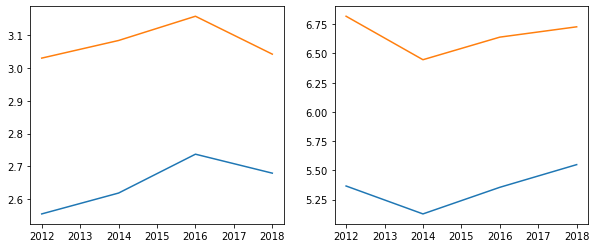

In [385]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.lineplot(x=[2012,2014,2016,2018], y=sifir_1, ax=ax[0])
sns.lineplot(x=[2012,2014,2016,2018], y=on_1, ax=ax[0])
sns.lineplot(x=[2012,2014,2016,2018], y=sifir_2, ax=ax[1])
sns.lineplot(x=[2012,2014,2016,2018], y=on_2, ax=ax[1]);

In [386]:
trust = [swe_12.ppltrst, swe_14.ppltrst, swe_16.ppltrst, swe_18.ppltrst]
imm = [swe_12.im_att1, swe_14.im_att1, swe_16.im_att1, swe_18.im_att1]
imm_2 = [swe_12.im_att2, swe_14.im_att2, swe_16.im_att2, swe_18.im_att2]
resa, resa2 = [], []
for i in range(4):
    a,b,c,d,e = stats.linregress(x=trust[i], y=imm[i])
    res1 = b + a * 5
    res2 = b + a * 10
    resa.append([res1, res2])
    a,b,c,d,e = stats.linregress(x=trust[i], y=imm_2[i])
    res1 = b + a * 5
    res2 = b + a * 10
    resa2.append([res1, res2])
sifir_1 = [i[0] for i in resa]
on_1 = [i[1] for i in resa]
sifir_2 = [i[0] for i in resa2]
on_2 = [i[1] for i in resa2]

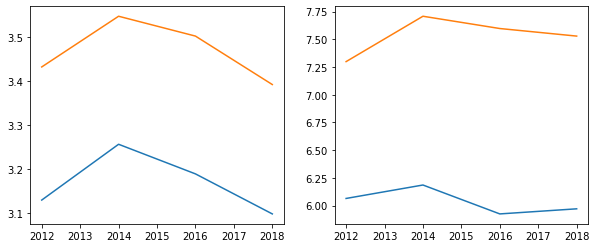

In [387]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.lineplot(x=[2012,2014,2016,2018], y=sifir_1, ax=ax[0])
sns.lineplot(x=[2012,2014,2016,2018], y=on_1, ax=ax[0])
sns.lineplot(x=[2012,2014,2016,2018], y=sifir_2, ax=ax[1])
sns.lineplot(x=[2012,2014,2016,2018], y=on_2, ax=ax[1]);

In [ ]:
# investigating whether the mean scores of out attitude-toward-immigration indexes are equal throughout the period
# from 2012-2018 or not

<p style="text-align : center"><b>Germany</b></p>

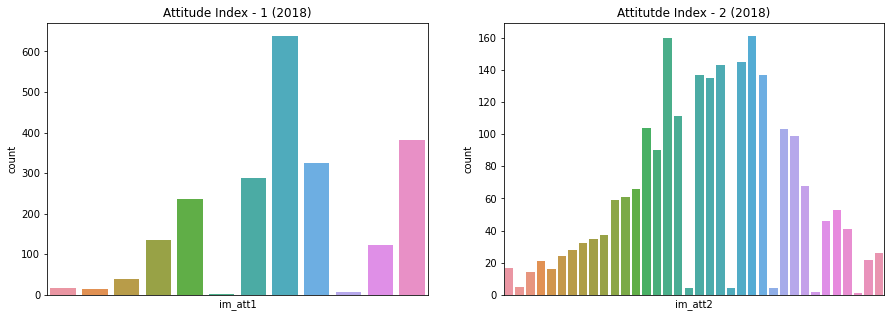

In [490]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.countplot(ger_18.im_att1, ax=ax[0])
sns.countplot(ger_18.im_att2, ax=ax[1])
ax[0].set_title('Attitude Index - 1 (2018)')
ax[1].set_title('Attitutde Index - 2 (2018)')
ax[0].set_xticks([])
ax[1].set_xticks([]);

In [392]:
# Assuming normality and equal population variances
ger_12.im_att1.mean(), ger_14.im_att1.mean(), ger_16.im_att1.mean(), ger_18.im_att1.mean()

(2.9680474095796603, 3.013279036827189, 3.003825743551765, 3.032112166440519)

In [393]:
ger_12.im_att2.mean(), ger_14.im_att2.mean(), ger_16.im_att2.mean(), ger_18.im_att2.mean()

(5.765151515151509, 5.796801227573188, 5.681167468838688, 5.856852103120765)

In [394]:
stats.f_oneway(ger_12.im_att1, ger_14.im_att1, ger_16.im_att1, ger_18.im_att1)

F_onewayResult(statistic=4.12725430732859, pvalue=0.006202900273055117)

In [395]:
stats.f_oneway(ger_12.im_att2, ger_14.im_att2, ger_16.im_att2, ger_18.im_att2)

F_onewayResult(statistic=3.2493111117151665, pvalue=0.02087373434601172)

In [396]:
stats.ttest_ind(ger_12.im_att1, ger_18.im_att1)

Ttest_indResult(statistic=-3.3847785123087437, pvalue=0.000717910937652606)

In [397]:
stats.ttest_ind(ger_12.im_att2, ger_18.im_att2)

Ttest_indResult(statistic=-1.60434285044533, pvalue=0.1087024636167322)

<p style="text-align : center"><b>Finland</b></p>

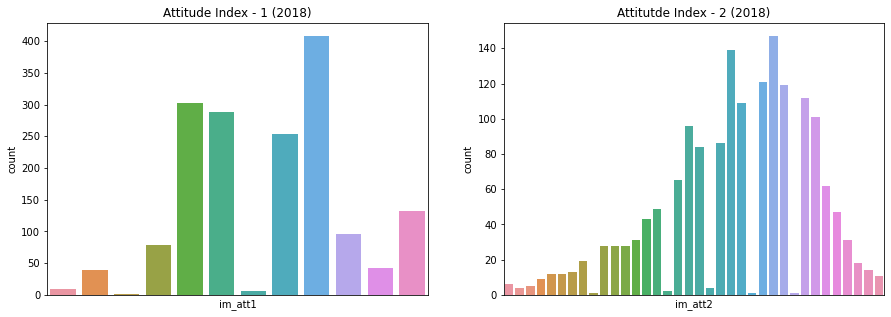

In [491]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.countplot(fin_18.im_att1, ax=ax[0])
sns.countplot(fin_18.im_att2, ax=ax[1])
ax[0].set_title('Attitude Index - 1 (2018)')
ax[1].set_title('Attitutde Index - 2 (2018)')
ax[0].set_xticks([])
ax[1].set_xticks([]);

In [413]:
# Assuming normality and equal population variances
fin_12.im_att1.mean(), fin_14.im_att1.mean(), fin_16.im_att1.mean(), fin_18.im_att1.mean()

(2.551475356679637, 2.5427306775621417, 2.6529219006007647, 2.65148773622839)

In [414]:
fin_12.im_att2.mean(), fin_14.im_att2.mean(), fin_16.im_att2.mean(), fin_18.im_att2.mean()

(6.102464332036315, 5.92288049029623, 6.027216457309308, 6.122939284278255)

In [415]:
stats.f_oneway(fin_12.im_att1, fin_14.im_att1, fin_16.im_att1, fin_18.im_att1)

F_onewayResult(statistic=15.2406219468722, pvalue=6.945373836435459e-10)

In [416]:
stats.f_oneway(fin_12.im_att2, fin_14.im_att2, fin_16.im_att2, fin_18.im_att2)

F_onewayResult(statistic=4.7449258787204425, pvalue=0.0026177449066328807)

In [417]:
stats.ttest_ind(fin_12.im_att1, fin_18.im_att1)

Ttest_indResult(statistic=-4.666990522206656, pvalue=3.164361974836277e-06)

In [418]:
stats.ttest_ind(fin_12.im_att2, fin_18.im_att2)

Ttest_indResult(statistic=-0.35504918690502685, pvalue=0.7225729139652882)

<p style="text-align : center"><b>Norway</b></p>

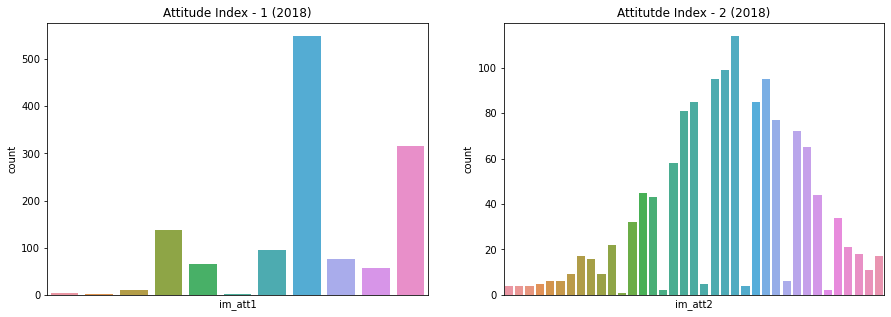

In [492]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.countplot(nor_18.im_att1, ax=ax[0])
sns.countplot(nor_18.im_att2, ax=ax[1])
ax[0].set_title('Attitude Index - 1 (2018)')
ax[1].set_title('Attitutde Index - 2 (2018)')
ax[0].set_xticks([])
ax[1].set_xticks([]);

In [420]:
# Although not the best case, still assuming normality and equal population variances
nor_12.im_att1.mean(), nor_14.im_att1.mean(), nor_16.im_att1.mean(), nor_18.im_att1.mean()

(2.9114616193480543, 2.98074127906977, 3.0376635092467295, 3.108149276466108)

In [421]:
nor_12.im_att2.mean(), nor_14.im_att2.mean(), nor_16.im_att2.mean(), nor_18.im_att2.mean()

(5.893690851735013, 5.687257751937975, 5.747519170049625, 6.082000507743081)

In [422]:
stats.f_oneway(nor_12.im_att1, nor_14.im_att1, nor_16.im_att1, nor_18.im_att1)

F_onewayResult(statistic=24.03987887420137, pvalue=1.8666674822964377e-15)

In [423]:
stats.f_oneway(nor_12.im_att2, nor_14.im_att2, nor_16.im_att2, nor_18.im_att2)

F_onewayResult(statistic=12.712851941570547, pvalue=2.8046641255272646e-08)

In [424]:
stats.ttest_ind(nor_12.im_att1, nor_18.im_att1)

Ttest_indResult(statistic=-8.065459429906946, pvalue=1.0572925823064352e-15)

In [425]:
stats.ttest_ind(nor_12.im_att2, nor_18.im_att2)

Ttest_indResult(statistic=-2.8083804277756723, pvalue=0.00501250644428457)

<p style="text-align : center"><b>Netherlands</b></p>

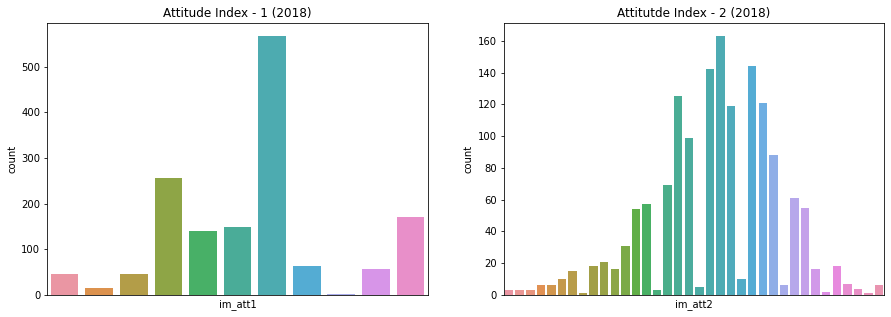

In [493]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.countplot(ned_18.im_att1, ax=ax[0])
sns.countplot(ned_18.im_att2, ax=ax[1])
ax[0].set_title('Attitude Index - 1 (2018)')
ax[1].set_title('Attitutde Index - 2 (2018)')
ax[0].set_xticks([])
ax[1].set_xticks([]);

In [427]:
# Although not the best case, still assuming normality and equal population variances
ned_12.im_att1.mean(), ned_14.im_att1.mean(), ned_16.im_att1.mean(), ned_18.im_att1.mean()

(2.6470758540822183, 2.715996981701563, 2.826948051948051, 2.771551724137933)

In [428]:
ned_12.im_att2.mean(), ned_14.im_att2.mean(), ned_16.im_att2.mean(), ned_18.im_att2.mean()

(5.646979347616295, 5.40341445010376, 5.6298701298701355, 5.848916887709991)

In [429]:
stats.f_oneway(ned_12.im_att1, ned_14.im_att1, ned_16.im_att1, ned_18.im_att1)

F_onewayResult(statistic=18.917434690997442, pvalue=3.266896687115154e-12)

In [430]:
stats.f_oneway(ned_12.im_att2, ned_14.im_att2, ned_16.im_att2, ned_18.im_att2)

F_onewayResult(statistic=21.571244117737617, pvalue=6.738937024141232e-14)

In [431]:
stats.ttest_ind(ned_12.im_att1, ned_18.im_att1)

Ttest_indResult(statistic=-4.8403416128200885, pvalue=1.3568993004896988e-06)

In [432]:
stats.ttest_ind(ned_12.im_att2, ned_18.im_att2)

Ttest_indResult(statistic=-3.6595454466966113, pvalue=0.0002566996722267909)

<p style="text-align : center"><b>Sweden</b></p>

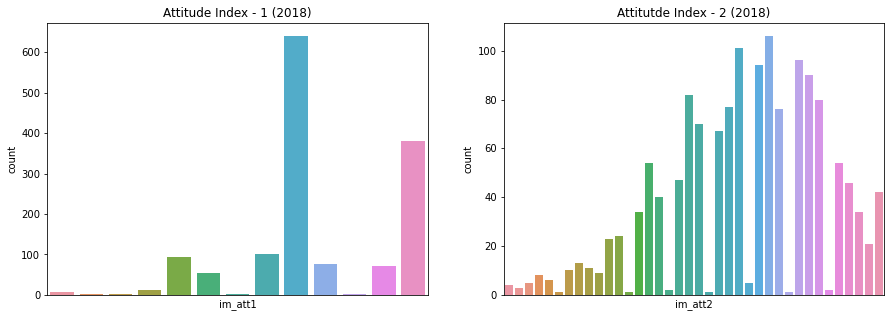

In [498]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.countplot(swe_18.im_att1, ax=ax[0])
sns.countplot(swe_18.im_att2, ax=ax[1])
ax[0].set_title('Attitude Index - 1 (2018)')
ax[1].set_title('Attitutde Index - 2 (2018)')
ax[0].set_xticks([])
ax[1].set_xticks([]);

In [434]:
# Although not the best case, still assuming normality and equal population variances
swe_12.im_att1.mean(), swe_14.im_att1.mean(), swe_16.im_att1.mean(), swe_18.im_att1.mean()

(3.1939055457573975,
 3.3308080808080787,
 3.2673488590919777,
 3.1780092592592553)

In [435]:
swe_12.im_att2.mean(), swe_14.im_att2.mean(), swe_16.im_att2.mean(), swe_18.im_att2.mean()

(6.326670585929856, 6.576494107744103, 6.343566219713008, 6.393865740740736)

In [436]:
stats.f_oneway(swe_12.im_att1, swe_14.im_att1, swe_16.im_att1, swe_18.im_att1)

F_onewayResult(statistic=20.19473036137517, pvalue=5.091528869016024e-13)

In [437]:
stats.f_oneway(swe_12.im_att2, swe_14.im_att2, swe_16.im_att2, swe_18.im_att2)

F_onewayResult(statistic=5.390088177973744, pvalue=0.001056286467418268)

In [438]:
stats.ttest_ind(swe_12.im_att1, swe_18.im_att1)

Ttest_indResult(statistic=0.7027836858121548, pvalue=0.48224267994813863)

In [439]:
stats.ttest_ind(swe_12.im_att2, swe_18.im_att2)

Ttest_indResult(statistic=-0.9520175469455203, pvalue=0.34116138085344216)

<p style="text-align : center"><b>Attitudes Toward Immigrants, 2012 - 2018</b></p>

### DUZELTILECEK
```
The level of interpersonal trust changes in each country throughout the period from 2012 to 2018.
Statistically, we can say that the level of trust changed and significantly increased from 2012 to 2018 in each
country except Norway.
```

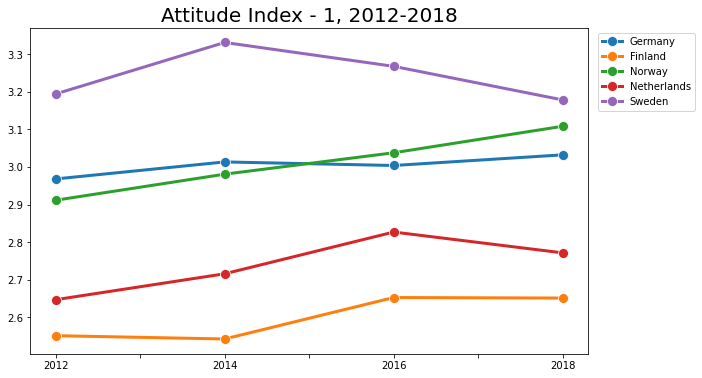

In [471]:
plt.figure(figsize=(10,6))
ax = plt.gca()
sns.lineplot(x=[2012,2014,2016,2018], 
            y=[ger_12.im_att1.mean(), ger_14.im_att1.mean(), ger_16.im_att1.mean(), ger_18.im_att1.mean()],
            label='Germany', linewidth=3, marker='o', markersize=10)
sns.lineplot(x=[2012,2014,2016,2018], 
            y=[fin_12.im_att1.mean(), fin_14.im_att1.mean(), fin_16.im_att1.mean(), fin_18.im_att1.mean()],
            label='Finland', linewidth=3, marker='o', markersize=10)
sns.lineplot(x=[2012,2014,2016,2018], 
            y=[nor_12.im_att1.mean(), nor_14.im_att1.mean(), nor_16.im_att1.mean(), nor_18.im_att1.mean()],
            label='Norway', linewidth=3, marker='o', markersize=10)
sns.lineplot(x=[2012,2014,2016,2018], 
            y=[ned_12.im_att1.mean(), ned_14.im_att1.mean(), ned_16.im_att1.mean(), ned_18.im_att1.mean()],
            label='Netherlands', linewidth=3, marker='o', markersize=10)
sns.lineplot(x=[2012,2014,2016,2018], 
            y=[swe_12.im_att1.mean(), swe_14.im_att1.mean(), swe_16.im_att1.mean(), swe_18.im_att1.mean()], 
             label='Sweden', linewidth=3, marker='o', markersize=10)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('Attitude Index - 1, 2012-2018', fontdict={'fontsize':20})
xticks = ax.xaxis.get_major_ticks()
xticks[2].label1.set_visible(False)
xticks[4].label1.set_visible(False)
xticks[6].label1.set_visible(False)

# plt.savefig('test.jpg');

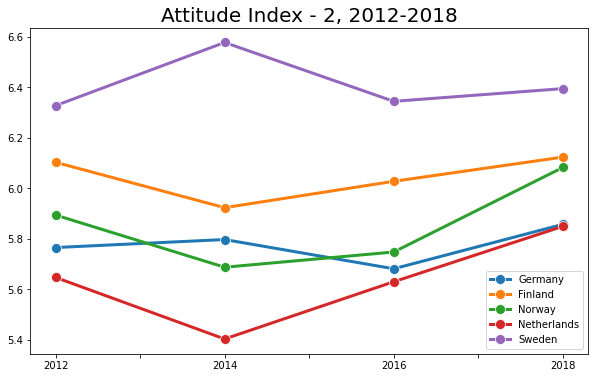

In [659]:
plt.figure(figsize=(10,6))
ax = plt.gca()
sns.lineplot(x=[2012,2014,2016,2018], 
            y=[ger_12.im_att2.mean(), ger_14.im_att2.mean(), ger_16.im_att2.mean(), ger_18.im_att2.mean()],
            label='Germany', linewidth=3, marker='o', markersize=10)
sns.lineplot(x=[2012,2014,2016,2018], 
            y=[fin_12.im_att2.mean(), fin_14.im_att2.mean(), fin_16.im_att2.mean(), fin_18.im_att2.mean()],
            label='Finland', linewidth=3, marker='o', markersize=10)
sns.lineplot(x=[2012,2014,2016,2018], 
            y=[nor_12.im_att2.mean(), nor_14.im_att2.mean(), nor_16.im_att2.mean(), nor_18.im_att2.mean()],
            label='Norway', linewidth=3, marker='o', markersize=10)
sns.lineplot(x=[2012,2014,2016,2018], 
            y=[ned_12.im_att2.mean(), ned_14.im_att2.mean(), ned_16.im_att2.mean(), ned_18.im_att2.mean()],
            label='Netherlands', linewidth=3, marker='o', markersize=10)
sns.lineplot(x=[2012,2014,2016,2018], 
            y=[swe_12.im_att2.mean(), swe_14.im_att2.mean(), swe_16.im_att2.mean(), swe_18.im_att2.mean()], 
             label='Sweden', linewidth=3, marker='o', markersize=10)
# plt.legend(loc='upper right', bbox_to_anchor=(1.135, 1))
plt.legend(loc=4)
plt.title('Attitude Index - 2, 2012-2018', fontdict={'fontsize':20})
xticks = ax.xaxis.get_major_ticks()
xticks[2].label1.set_visible(False)
xticks[4].label1.set_visible(False)
xticks[6].label1.set_visible(False)

plt.savefig('test.jpg');

### Life Satisfaction

<p style="text-align : center"><b>Germany</b></p>

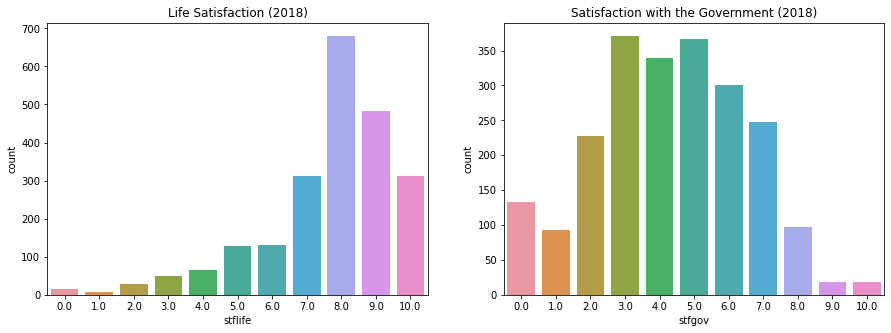

In [507]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.countplot(ger_18.stflife, ax=ax[0])
sns.countplot(ger_18.stfgov, ax=ax[1])
ax[0].set_title('Life Satisfaction (2018)')
ax[1].set_title('Satisfaction with the Government (2018)');

In [484]:
# Assuming normality and equal population variances
ger_12.stflife.mean(), ger_14.stflife.mean(), ger_16.stflife.mean(), ger_18.stflife.mean()

(7.473973607038123, 7.450070821529745, 7.524250277674935, 7.688828584350972)

In [485]:
ger_12.stfgov.mean(), ger_14.stfgov.mean(), ger_16.stfgov.mean(), ger_18.stfgov.mean()

(4.7969208211143695, 5.010623229461756, 4.948537578674565, 4.299412030755314)

In [486]:
stats.f_oneway(ger_12.stflife, ger_14.stflife, ger_16.stflife, ger_18.stflife)

F_onewayResult(statistic=6.93829318250902, pvalue=0.00011610607999312527)

In [487]:
stats.f_oneway(ger_12.stfgov, ger_14.stfgov, ger_16.stfgov, ger_18.stfgov)

F_onewayResult(statistic=53.070493995835875, pvalue=4.903642108396343e-34)

In [488]:
stats.ttest_ind(ger_12.stflife, ger_18.stflife)

Ttest_indResult(statistic=-3.7904087996715985, pvalue=0.0001521928708318077)

In [489]:
stats.ttest_ind(ger_12.stfgov, ger_18.stfgov)

Ttest_indResult(statistic=8.085059567717414, pvalue=7.750227641887244e-16)

<p style="text-align : center"><b>Finland</b></p>

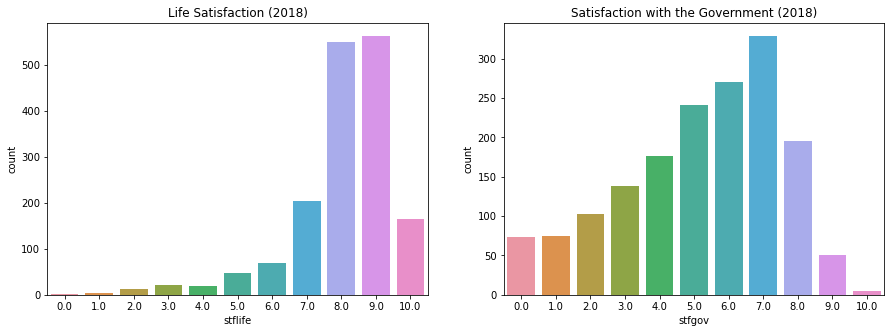

In [508]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.countplot(fin_18.stflife, ax=ax[0])
sns.countplot(fin_18.stfgov, ax=ax[1])
ax[0].set_title('Life Satisfaction (2018)')
ax[1].set_title('Satisfaction with the Government (2018)');

In [501]:
# Assuming normality and equal population variances
fin_12.stflife.mean(), fin_14.stflife.mean(), fin_16.stflife.mean(), fin_18.stflife.mean()

(8.117704280155642, 7.939223697650664, 7.983615510649918, 8.066344993968636)

In [502]:
fin_12.stfgov.mean(), fin_14.stfgov.mean(), fin_16.stfgov.mean(), fin_18.stfgov.mean()

(5.857976653696498, 4.382022471910112, 4.811032222829055, 5.1881785283474064)

In [503]:
stats.f_oneway(fin_12.stflife, fin_14.stflife, fin_16.stflife, fin_18.stflife)

F_onewayResult(statistic=5.65625600767315, pvalue=0.0007234253657918005)

In [504]:
stats.f_oneway(fin_12.stfgov, fin_14.stfgov, fin_16.stfgov, fin_18.stfgov)

F_onewayResult(statistic=166.93107168780688, pvalue=9.330368390995271e-105)

In [505]:
stats.ttest_ind(fin_12.stflife, fin_18.stflife)

Ttest_indResult(statistic=1.0905701413696633, pvalue=0.27553285976545117)

In [506]:
stats.ttest_ind(fin_12.stfgov, fin_18.stfgov)

Ttest_indResult(statistic=9.608497136948985, pvalue=1.3107758847613569e-21)

<p style="text-align : center"><b>Norway</b></p>

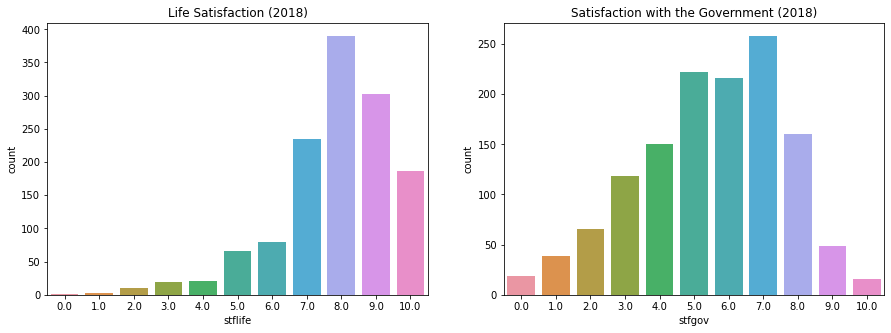

In [509]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.countplot(nor_18.stflife, ax=ax[0])
sns.countplot(nor_18.stfgov, ax=ax[1])
ax[0].set_title('Life Satisfaction (2018)')
ax[1].set_title('Satisfaction with the Government (2018)');

In [510]:
# Assuming normality and equal population variances
nor_12.stflife.mean(), nor_14.stflife.mean(), nor_16.stflife.mean(), nor_18.stflife.mean()

(8.131230283911671, 7.941860465116279, 7.95872801082544, 7.863670982482864)

In [511]:
nor_12.stfgov.mean(), nor_14.stfgov.mean(), nor_16.stfgov.mean(), nor_18.stfgov.mean()

(5.8511041009463725, 5.6082848837209305, 5.548037889039242, 5.497334348819497)

In [512]:
stats.f_oneway(nor_12.stflife, nor_14.stflife, nor_16.stflife, nor_18.stflife)

F_onewayResult(statistic=7.103855984588598, pvalue=9.234440114360073e-05)

In [513]:
stats.f_oneway(nor_12.stfgov, nor_14.stfgov, nor_16.stfgov, nor_18.stfgov)

F_onewayResult(statistic=8.780449567906892, pvalue=8.31897848986648e-06)

In [514]:
stats.ttest_ind(nor_12.stflife, nor_18.stflife)

Ttest_indResult(statistic=4.485612822333825, pvalue=7.5534801414318805e-06)

In [515]:
stats.ttest_ind(nor_12.stfgov, nor_18.stfgov)

Ttest_indResult(statistic=4.648882967201797, pvalue=3.4867196875543153e-06)

<p style="text-align : center"><b>Netherlands</b></p>

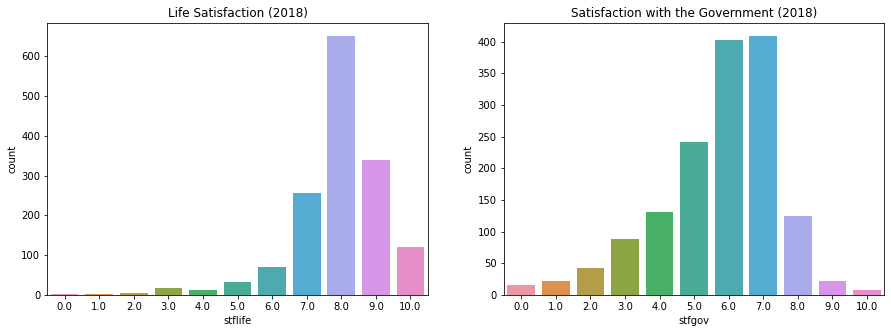

In [516]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.countplot(ned_18.stflife, ax=ax[0])
sns.countplot(ned_18.stfgov, ax=ax[1])
ax[0].set_title('Life Satisfaction (2018)')
ax[1].set_title('Satisfaction with the Government (2018)');

In [517]:
# Assuming normality and equal population variances
ned_12.stflife.mean(), ned_14.stflife.mean(), ned_16.stflife.mean(), ned_18.stflife.mean()

(7.786913723219456, 7.6281833616298815, 7.779220779220779, 7.931034482758621)

In [518]:
ned_12.stfgov.mean(), ned_14.stfgov.mean(), ned_16.stfgov.mean(), ned_18.stfgov.mean()

(5.1077012159814705, 5.075834748160724, 5.426623376623376, 5.739389920424403)

In [519]:
stats.f_oneway(ned_12.stflife, ned_14.stflife, ned_16.stflife, ned_18.stflife)

F_onewayResult(statistic=11.814748025326242, pvalue=1.0268928235409633e-07)

In [520]:
stats.f_oneway(ned_12.stfgov, ned_14.stfgov, ned_16.stfgov, ned_18.stfgov)

F_onewayResult(statistic=45.76571542356828, pvalue=2.9138477459990425e-29)

In [521]:
stats.ttest_ind(ned_12.stflife, ned_18.stflife)

Ttest_indResult(statistic=-2.8636301506478508, pvalue=0.004215144552220891)

In [522]:
stats.ttest_ind(ned_12.stfgov, ned_18.stfgov)

Ttest_indResult(statistic=-9.974602971588347, pvalue=4.231871754633805e-23)

<p style="text-align : center"><b>Sweden</b></p>

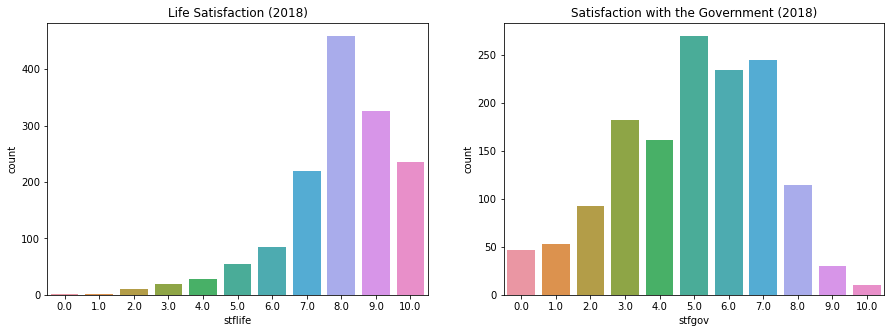

In [523]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.countplot(swe_18.stflife, ax=ax[0])
sns.countplot(swe_18.stfgov, ax=ax[1])
ax[0].set_title('Life Satisfaction (2018)')
ax[1].set_title('Satisfaction with the Government (2018)');

In [524]:
# Assuming normality and equal population variances
swe_12.stflife.mean(), swe_14.stflife.mean(), swe_16.stflife.mean(), swe_18.stflife.mean()

(7.88477366255144, 7.916666666666667, 7.920959774170783, 7.967361111111111)

In [525]:
swe_12.stfgov.mean(), swe_14.stfgov.mean(), swe_16.stfgov.mean(), swe_18.stfgov.mean()

(5.650205761316872, 5.363636363636363, 4.8327452364149615, 4.991666666666666)

In [526]:
stats.f_oneway(swe_12.stflife, swe_14.stflife, swe_16.stflife, swe_18.stflife)

F_onewayResult(statistic=0.6501503868831167, pvalue=0.5827858972144723)

In [527]:
stats.f_oneway(swe_12.stfgov, swe_14.stfgov, swe_16.stfgov, swe_18.stfgov)

F_onewayResult(statistic=45.4677642698039, pvalue=4.704367481753626e-29)

In [528]:
stats.ttest_ind(swe_12.stflife, swe_18.stflife)

Ttest_indResult(statistic=-1.4006249782884275, pvalue=0.16142508849703355)

In [529]:
stats.ttest_ind(swe_12.stfgov, swe_18.stfgov)

Ttest_indResult(statistic=8.467329375888854, pvalue=3.800350759427346e-17)

<p style="text-align : center"><b>Life Satisfaction / Satisfaction with the Government, 2012 - 2018</b></p>

### DUZELTILECEK
```
The level of interpersonal trust changes in each country throughout the period from 2012 to 2018.
Statistically, we can say that the level of trust changed and significantly increased from 2012 to 2018 in each
country except Norway.
```

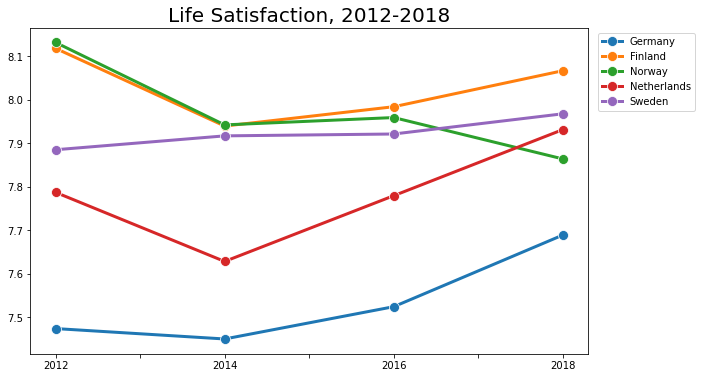

In [530]:
plt.figure(figsize=(10,6))
ax = plt.gca()
sns.lineplot(x=[2012,2014,2016,2018], 
            y=[ger_12.stflife.mean(), ger_14.stflife.mean(), ger_16.stflife.mean(), ger_18.stflife.mean()],
            label='Germany', linewidth=3, marker='o', markersize=10)
sns.lineplot(x=[2012,2014,2016,2018], 
            y=[fin_12.stflife.mean(), fin_14.stflife.mean(), fin_16.stflife.mean(), fin_18.stflife.mean()],
            label='Finland', linewidth=3, marker='o', markersize=10)
sns.lineplot(x=[2012,2014,2016,2018], 
            y=[nor_12.stflife.mean(), nor_14.stflife.mean(), nor_16.stflife.mean(), nor_18.stflife.mean()],
            label='Norway', linewidth=3, marker='o', markersize=10)
sns.lineplot(x=[2012,2014,2016,2018], 
            y=[ned_12.stflife.mean(), ned_14.stflife.mean(), ned_16.stflife.mean(), ned_18.stflife.mean()],
            label='Netherlands', linewidth=3, marker='o', markersize=10)
sns.lineplot(x=[2012,2014,2016,2018], 
            y=[swe_12.stflife.mean(), swe_14.stflife.mean(), swe_16.stflife.mean(), swe_18.stflife.mean()], 
             label='Sweden', linewidth=3, marker='o', markersize=10)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('Life Satisfaction, 2012-2018', fontdict={'fontsize':20})
xticks = ax.xaxis.get_major_ticks()
xticks[2].label1.set_visible(False)
xticks[4].label1.set_visible(False)
xticks[6].label1.set_visible(False)

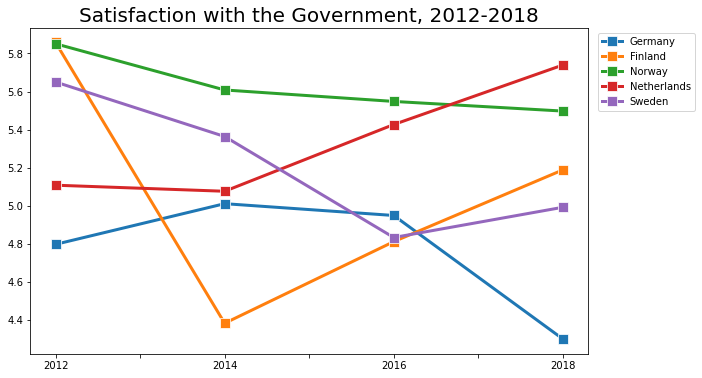

In [537]:
plt.figure(figsize=(10,6))
ax = plt.gca()
sns.lineplot(x=[2012,2014,2016,2018], 
            y=[ger_12.stfgov.mean(), ger_14.stfgov.mean(), ger_16.stfgov.mean(), ger_18.stfgov.mean()],
            label='Germany', linewidth=3, marker='s', markersize=10)
sns.lineplot(x=[2012,2014,2016,2018], 
            y=[fin_12.stfgov.mean(), fin_14.stfgov.mean(), fin_16.stfgov.mean(), fin_18.stfgov.mean()],
            label='Finland', linewidth=3, marker='s', markersize=10)
sns.lineplot(x=[2012,2014,2016,2018], 
            y=[nor_12.stfgov.mean(), nor_14.stfgov.mean(), nor_16.stfgov.mean(), nor_18.stfgov.mean()],
            label='Norway', linewidth=3, marker='s', markersize=10)
sns.lineplot(x=[2012,2014,2016,2018], 
            y=[ned_12.stfgov.mean(), ned_14.stfgov.mean(), ned_16.stfgov.mean(), ned_18.stfgov.mean()],
            label='Netherlands', linewidth=3, marker='s', markersize=10)
sns.lineplot(x=[2012,2014,2016,2018], 
            y=[swe_12.stfgov.mean(), swe_14.stfgov.mean(), swe_16.stfgov.mean(), swe_18.stfgov.mean()], 
             label='Sweden', linewidth=3, marker='s', markersize=10)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('Satisfaction with the Government, 2012-2018', fontdict={'fontsize':20})
xticks = ax.xaxis.get_major_ticks()
xticks[2].label1.set_visible(False)
xticks[4].label1.set_visible(False)
xticks[6].label1.set_visible(False)

### Feeling Safe

<p style="text-align : center"><b>Germany</b></p>

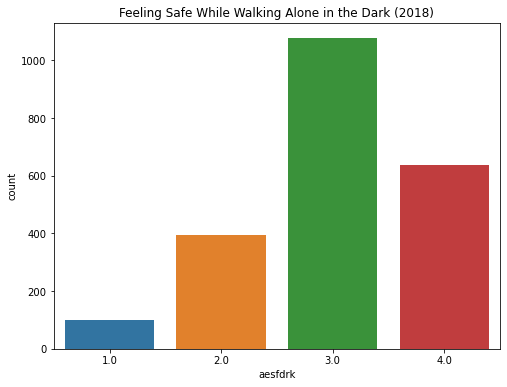

In [535]:
plt.figure(figsize=(8,6))
sns.countplot(ger_18.aesfdrk)
plt.title('Feeling Safe While Walking Alone in the Dark (2018)');

In [538]:
# Assuming normality and equal population variances
ger_12.aesfdrk.mean(), ger_14.aesfdrk.mean(), ger_16.aesfdrk.mean(), ger_18.aesfdrk.mean()

(2.9824046920821115, 3.0325779036827196, 2.9296556830803406, 3.01763907734057)

In [539]:
stats.f_oneway(ger_12.aesfdrk, ger_14.aesfdrk, ger_16.aesfdrk, ger_18.aesfdrk)

F_onewayResult(statistic=9.134315853637416, pvalue=4.927940359738109e-06)

In [540]:
stats.ttest_ind(ger_12.aesfdrk, ger_18.aesfdrk)

Ttest_indResult(statistic=-1.5625968530723988, pvalue=0.11821154238889561)

<p style="text-align : center"><b>Finland</b></p>

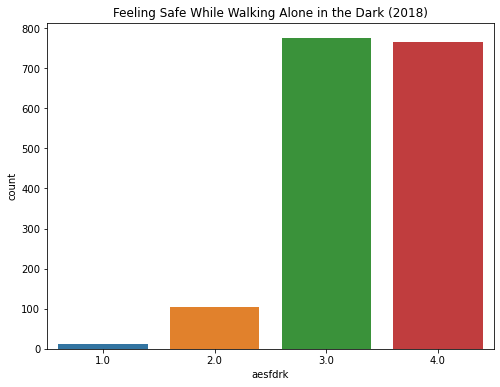

In [541]:
plt.figure(figsize=(8,6))
sns.countplot(fin_18.aesfdrk)
plt.title('Feeling Safe While Walking Alone in the Dark (2018)');

In [542]:
# Assuming normality and equal population variances
fin_12.aesfdrk.mean(), fin_14.aesfdrk.mean(), fin_16.aesfdrk.mean(), fin_18.aesfdrk.mean()

(3.3078793774319064, 3.3181818181818183, 3.3604587657018024, 3.384197828709288)

In [543]:
stats.f_oneway(fin_12.aesfdrk, fin_14.aesfdrk, fin_16.aesfdrk, fin_18.aesfdrk)

F_onewayResult(statistic=5.740715258188578, pvalue=0.0006417808380879737)

In [544]:
stats.ttest_ind(fin_12.aesfdrk, fin_18.aesfdrk)

Ttest_indResult(statistic=-3.6416289661601993, pvalue=0.00027461652083367034)

<p style="text-align : center"><b>Norway</b></p>

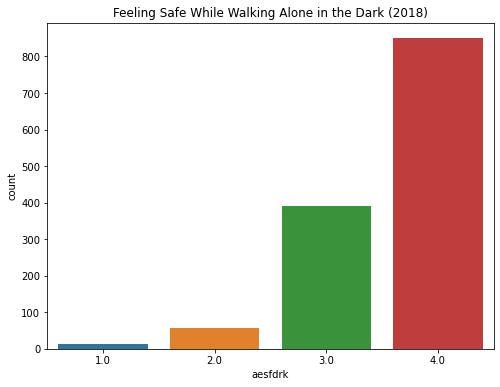

In [545]:
plt.figure(figsize=(8,6))
sns.countplot(nor_18.aesfdrk)
plt.title('Feeling Safe While Walking Alone in the Dark (2018)');

In [546]:
# Assuming normality and equal population variances
nor_12.aesfdrk.mean(), nor_14.aesfdrk.mean(), nor_16.aesfdrk.mean(), nor_18.aesfdrk.mean()

(3.416403785488959, 3.4425872093023258, 3.4878213802435725, 3.5826351865955828)

In [547]:
stats.f_oneway(nor_12.aesfdrk, nor_14.aesfdrk, nor_16.aesfdrk, nor_18.aesfdrk)

F_onewayResult(statistic=16.45358536048398, pvalue=1.2094340438944224e-10)

In [548]:
stats.ttest_ind(nor_12.aesfdrk, nor_18.aesfdrk)

Ttest_indResult(statistic=-6.6373568699265455, pvalue=3.798017461511134e-11)

<p style="text-align : center"><b>Netherlands</b></p>

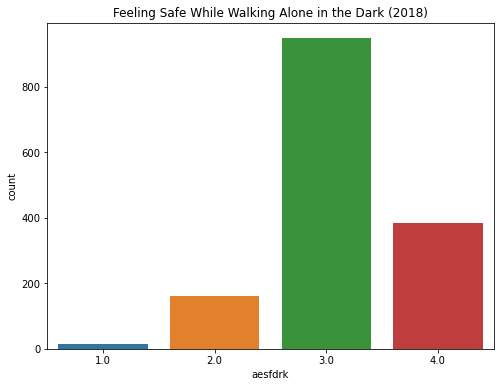

In [549]:
plt.figure(figsize=(8,6))
sns.countplot(ned_18.aesfdrk)
plt.title('Feeling Safe While Walking Alone in the Dark (2018)');

In [550]:
# Assuming normality and equal population variances
ned_12.aesfdrk.mean(), ned_14.aesfdrk.mean(), ned_16.aesfdrk.mean(), ned_18.aesfdrk.mean()

(3.042269832078749, 3.0560271646859083, 3.064935064935065, 3.127320954907162)

In [551]:
stats.f_oneway(ned_12.aesfdrk, ned_14.aesfdrk, ned_16.aesfdrk, ned_18.aesfdrk)

F_onewayResult(statistic=5.4817686415219296, pvalue=0.0009273131651718778)

In [552]:
stats.ttest_ind(ned_12.aesfdrk, ned_18.aesfdrk)

Ttest_indResult(statistic=-3.751895991985907, pvalue=0.00017858313559081278)

<p style="text-align : center"><b>Sweden</b></p>

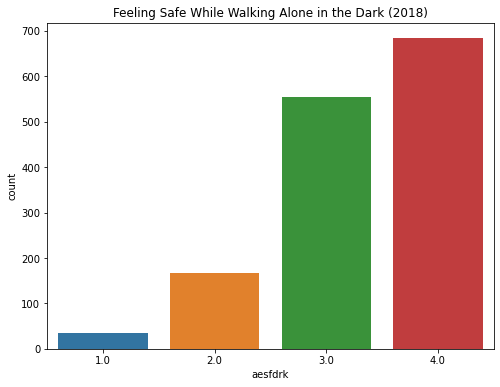

In [553]:
plt.figure(figsize=(8,6))
sns.countplot(swe_18.aesfdrk)
plt.title('Feeling Safe While Walking Alone in the Dark (2018)');

In [554]:
# Assuming normality and equal population variances
swe_12.aesfdrk.mean(), swe_14.aesfdrk.mean(), swe_16.aesfdrk.mean(), swe_18.aesfdrk.mean()

(3.299235743680188, 3.3042929292929295, 3.2519407198306283, 3.310416666666667)

In [555]:
stats.f_oneway(swe_12.aesfdrk, swe_14.aesfdrk, swe_16.aesfdrk, swe_18.aesfdrk)

F_onewayResult(statistic=1.7966279328821348, pvalue=0.14549571075180232)

In [556]:
stats.ttest_ind(swe_12.aesfdrk, swe_18.aesfdrk)

Ttest_indResult(statistic=-0.4122151981255563, pvalue=0.6802098467408484)

<p style="text-align : center"><b>Feeling Safe While Walking Alone in the Dark, 2012 - 2018</b></p>

### DUZELTILECEK
```
The level of interpersonal trust changes in each country throughout the period from 2012 to 2018.
Statistically, we can say that the level of trust changed and significantly increased from 2012 to 2018 in each
country except Norway.
```

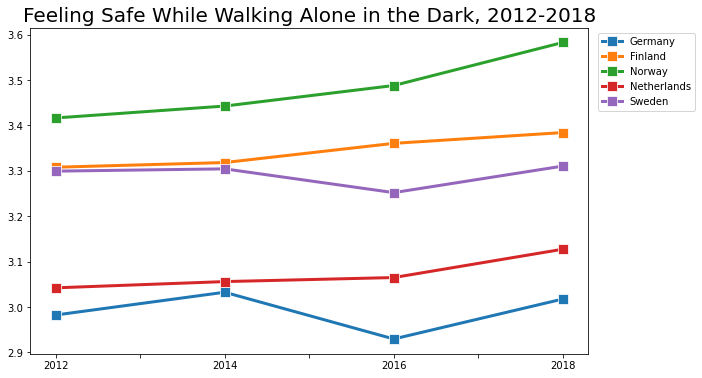

In [572]:
plt.figure(figsize=(10,6))
ax = plt.gca()
sns.lineplot(x=[2012,2014,2016,2018], 
            y=[ger_12.aesfdrk.mean(), ger_14.aesfdrk.mean(), ger_16.aesfdrk.mean(), ger_18.aesfdrk.mean()],
            label='Germany', linewidth=3, marker='s', markersize=10)
sns.lineplot(x=[2012,2014,2016,2018], 
            y=[fin_12.aesfdrk.mean(), fin_14.aesfdrk.mean(), fin_16.aesfdrk.mean(), fin_18.aesfdrk.mean()],
            label='Finland', linewidth=3, marker='s', markersize=10)
sns.lineplot(x=[2012,2014,2016,2018], 
            y=[nor_12.aesfdrk.mean(), nor_14.aesfdrk.mean(), nor_16.aesfdrk.mean(), nor_18.aesfdrk.mean()],
            label='Norway', linewidth=3, marker='s', markersize=10)
sns.lineplot(x=[2012,2014,2016,2018], 
            y=[ned_12.aesfdrk.mean(), ned_14.aesfdrk.mean(), ned_16.aesfdrk.mean(), ned_18.aesfdrk.mean()],
            label='Netherlands', linewidth=3, marker='s', markersize=10)
sns.lineplot(x=[2012,2014,2016,2018], 
            y=[swe_12.aesfdrk.mean(), swe_14.aesfdrk.mean(), swe_16.aesfdrk.mean(), swe_18.aesfdrk.mean()], 
             label='Sweden', linewidth=3, marker='s', markersize=10)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('Feeling Safe While Walking Alone in the Dark, 2012-2018', fontdict={'fontsize':20})
xticks = ax.xaxis.get_major_ticks()
xticks[2].label1.set_visible(False)
xticks[4].label1.set_visible(False)
xticks[6].label1.set_visible(False)

### Independent Effects (Based on the results of 2018)

<p style="text-align : center"><b>Germany</b></p>

In [558]:
# pearson correlation coefficient and p-value associated with this value
# interpersonal trust vs. attitude index-1
stats.pearsonr(ger_18.ppltrst, ger_18.im_att1)

(0.3023759700045236, 5.669075214606489e-48)

In [560]:
# interpersonal trust vs. attitude index-2
stats.pearsonr(ger_18.ppltrst, ger_18.im_att2)

(0.35335653816146956, 5.062776789590229e-66)

In [562]:
#######

In [565]:
# life satisfaction vs. attitude index-1
stats.pearsonr(ger_18.stflife, ger_18.im_att1)

(0.18175215229588515, 7.103856334062868e-18)

In [566]:
# life satisfaction vs. attitude index-2
stats.pearsonr(ger_18.stflife, ger_18.im_att2)

(0.19094364150838541, 1.343514268314435e-19)

In [567]:
# satisfaction with the government vs. attitude index-1
stats.pearsonr(ger_18.stfgov, ger_18.im_att1)

(0.22315409477500453, 2.3732847818592706e-26)

In [568]:
# satisfaction with the government vs. attitude index-2
stats.pearsonr(ger_18.stfgov, ger_18.im_att2)

(0.3007611798642066, 1.8609324148586523e-47)

In [569]:
#######

In [570]:
# feeling safe vs. attitude index-1
stats.pearsonr(ger_18.aesfdrk, ger_18.im_att1)

(0.23360008221190176, 8.732496250873038e-29)

In [571]:
# feeling safe vs. attitude index-2
stats.pearsonr(ger_18.aesfdrk, ger_18.im_att2)

(0.298437154652065, 1.016048154132585e-46)

In [573]:
#######

In [574]:
# gender vs. attitude index-1
stats.pearsonr(ger_18.gndr, ger_18.im_att1)

(0.045578412583292024, 0.03210854770451227)

In [575]:
# gender vs. attitude index-2
stats.pearsonr(ger_18.gndr, ger_18.im_att2)

(0.020184151862097523, 0.3428014930779601)

In [576]:
#######

In [577]:
# age vs. attitude index-1
stats.pearsonr(ger_18.agea, ger_18.im_att1)

(-0.15266103190104385, 5.330584790936069e-13)

In [578]:
# age vs. attitude index-2
stats.pearsonr(ger_18.agea, ger_18.im_att2)

(-0.0796579715402671, 0.00017721562293908)

In [579]:
######

In [580]:
# left-right scale (political ideology) vs. attitude index-1
stats.pearsonr(ger_18.lrscale, ger_18.im_att1)

(-0.2558198887064842, 2.253094472227816e-34)

In [581]:
# left-right scale (political ideology) vs. attitude index-1
stats.pearsonr(ger_18.lrscale, ger_18.im_att2)

(-0.2758096802236346, 6.8339636796488944e-40)

<p style="text-align : center"><b>Finland</b></p>

In [582]:
# pearson correlation coefficient and p-value associated with this value
# interpersonal trust vs. attitude index-1
stats.pearsonr(fin_18.ppltrst, fin_18.im_att1)

(0.18274056148075904, 6.453056975513553e-14)

In [583]:
# interpersonal trust vs. attitude index-2
stats.pearsonr(fin_18.ppltrst, fin_18.im_att2)

(0.3248912333880856, 4.624926308522975e-42)

In [584]:
######

In [585]:
# life satisfaction vs. attitude index-1
stats.pearsonr(fin_18.stflife, fin_18.im_att1)

(0.11730962863148135, 1.6709690065138335e-06)

In [586]:
# life satisfaction vs. attitude index-2
stats.pearsonr(fin_18.stflife, fin_18.im_att2)

(0.20865431444441246, 9.13548277049362e-18)

In [587]:
# satisfaction with the government vs. attitude index-1
stats.pearsonr(fin_18.stfgov, fin_18.im_att1)

(0.0631255536747421, 0.010140339236028506)

In [588]:
# satisfaction with the government vs. attitude index-2
stats.pearsonr(fin_18.stfgov, fin_18.im_att2)

(0.27537748148571717, 3.0956571813414446e-30)

In [589]:
######

In [590]:
# feeling safe vs. attitude index-1
stats.pearsonr(fin_18.aesfdrk, fin_18.im_att1)

(0.16015811290235593, 5.4217716472534875e-11)

In [591]:
# feeling safe vs. attitude index-2
stats.pearsonr(fin_18.aesfdrk, fin_18.im_att2)

(0.18199504084950727, 8.177601468926139e-14)

In [592]:
######

In [593]:
# gender vs. attitude index-1
stats.pearsonr(fin_18.gndr, fin_18.im_att1)

(0.08441339641525225, 0.0005801236334154675)

In [594]:
# gender vs. attitude index-2
stats.pearsonr(fin_18.gndr, fin_18.im_att2)

(0.050683739148129216, 0.03906154121277448)

In [595]:
######

In [596]:
# age vs. attitude index-1
stats.pearsonr(fin_18.agea, fin_18.im_att1)

(-0.23386308570957157, 4.939797282057632e-22)

In [597]:
# age vs. attitude index-2
stats.pearsonr(fin_18.agea, fin_18.im_att2)

(0.0003582025217590698, 0.9883716541007939)

In [598]:
######

In [599]:
# left-right scale (political ideology) vs. attitude index-1
stats.pearsonr(fin_18.lrscale, fin_18.im_att1)

(-0.11683349861835926, 1.8418356987697444e-06)

In [602]:
# left-right scale (political ideology) vs. attitude index-1
stats.pearsonr(fin_18.lrscale, fin_18.im_att2)

(-0.03452386915079641, 0.15998547428270818)

<p style="text-align : center"><b>Norway</b></p>

In [603]:
# pearson correlation coefficient and p-value associated with this value
# interpersonal trust vs. attitude index-1
stats.pearsonr(nor_18.ppltrst, nor_18.im_att1)

(0.10621568431689656, 0.0001152535834256708)

In [604]:
# interpersonal trust vs. attitude index-2
stats.pearsonr(nor_18.ppltrst, nor_18.im_att2)

(0.2582879672146048, 1.8685955041519444e-21)

In [605]:
######

In [606]:
# life satisfaction vs. attitude index-1
stats.pearsonr(nor_18.stflife, nor_18.im_att1)

(-0.05552564223836936, 0.04425934040291825)

In [607]:
# life satisfaction vs. attitude index-2
stats.pearsonr(nor_18.stflife, nor_18.im_att2)

(0.0776974353434433, 0.004847892256991663)

In [608]:
# satisfaction with the government vs. attitude index-1
stats.pearsonr(nor_18.stfgov, nor_18.im_att1)

(-0.02247038776953472, 0.41590313296787496)

In [609]:
# satisfaction with the government vs. attitude index-2
stats.pearsonr(nor_18.stfgov, nor_18.im_att2)

(0.06828540646948714, 0.013328186928672768)

In [610]:
######

In [611]:
# feeling safe vs. attitude index-1
stats.pearsonr(nor_18.aesfdrk, nor_18.im_att1)

(0.028662907157809583, 0.299347225382048)

In [612]:
# feeling safe vs. attitude index-2
stats.pearsonr(nor_18.aesfdrk, nor_18.im_att2)

(0.02060439267361928, 0.4556823321264303)

In [ ]:
######

In [613]:
# gender vs. attitude index-1
stats.pearsonr(nor_18.gndr, nor_18.im_att1)

(0.12933995597096948, 2.576551962225424e-06)

In [614]:
# gender vs. attitude index-2
stats.pearsonr(nor_18.gndr, nor_18.im_att2)

(0.14533833077650612, 1.2266675849127947e-07)

In [615]:
######

In [616]:
# age vs. attitude index-1
stats.pearsonr(nor_18.agea, nor_18.im_att1)

(-0.20117632029728108, 1.8654338873885957e-13)

In [617]:
# age vs. attitude index-2
stats.pearsonr(nor_18.agea, nor_18.im_att2)

(-0.03591678081972494, 0.19338276237979315)

In [618]:
######

In [619]:
# left-right scale (political ideology) vs. attitude index-1
stats.pearsonr(nor_18.lrscale, nor_18.im_att1)

(-0.27981052884851537, 4.816485156634832e-25)

In [620]:
# left-right scale (political ideology) vs. attitude index-1
stats.pearsonr(nor_18.lrscale, nor_18.im_att2)

(-0.30654077846607347, 5.7711076511419915e-30)

<p style="text-align : center"><b>Netherlands</b></p>

In [621]:
# pearson correlation coefficient and p-value associated with this value
# interpersonal trust vs. attitude index-1
stats.pearsonr(ned_18.ppltrst, ned_18.im_att1)

(0.17868912857165853, 2.7566616272473078e-12)

In [622]:
# interpersonal trust vs. attitude index-2
stats.pearsonr(ned_18.ppltrst, ned_18.im_att2)

(0.27476402140389783, 1.5853278031350673e-27)

In [623]:
######

In [624]:
# life satisfaction vs. attitude index-1
stats.pearsonr(ned_18.stflife, ned_18.im_att1)

(0.030035323954045325, 0.24375323337585408)

In [625]:
# life satisfaction vs. attitude index-2
stats.pearsonr(ned_18.stflife, ned_18.im_att2)

(0.11282382111431277, 1.124780088364288e-05)

In [626]:
# satisfaction with the government vs. attitude index-1
stats.pearsonr(ned_18.stfgov, ned_18.im_att1)

(0.18294132118663625, 8.140998427458483e-13)

In [627]:
# satisfaction with the government vs. attitude index-2
stats.pearsonr(ned_18.stfgov, ned_18.im_att2)

(0.2633282825186113, 2.4417846147147067e-25)

In [628]:
######

In [629]:
# feeling safe vs. attitude index-1
stats.pearsonr(ned_18.aesfdrk, ned_18.im_att1)

(0.11144234295058301, 1.440689263764507e-05)

In [630]:
# feeling safe vs. attitude index-2
stats.pearsonr(ned_18.aesfdrk, ned_18.im_att2)

(0.17539274349832845, 6.953593091373478e-12)

In [ ]:
######

In [631]:
# gender vs. attitude index-1
stats.pearsonr(ned_18.gndr, ned_18.im_att1)

(0.051516837320440545, 0.04547636017357634)

In [632]:
# gender vs. attitude index-2
stats.pearsonr(ned_18.gndr, ned_18.im_att2)

(0.021221475281439743, 0.4102223498556954)

In [633]:
######

In [634]:
# age vs. attitude index-1
stats.pearsonr(ned_18.agea, ned_18.im_att1)

(-0.1264443181800105, 8.396423757210939e-07)

In [635]:
# age vs. attitude index-2
stats.pearsonr(ned_18.agea, ned_18.im_att2)

(-0.03515770108729871, 0.17238890835784743)

In [636]:
######

In [637]:
# left-right scale (political ideology) vs. attitude index-1
stats.pearsonr(ned_18.lrscale, ned_18.im_att1)

(-0.24790401750329916, 1.4879278799868777e-22)

In [658]:
# left-right scale (political ideology) vs. attitude index-1
stats.pearsonr(ned_18.lrscale, ned_18.im_att2)

(-0.26649981348596263, 6.188779634827937e-26)

<p style="text-align : center"><b>Sweden</b></p>

In [639]:
# pearson correlation coefficient and p-value associated with this value
# interpersonal trust vs. attitude index-1
stats.pearsonr(swe_18.ppltrst, swe_18.im_att1)

(0.1910499310001053, 2.651999135897918e-13)

In [640]:
# interpersonal trust vs. attitude index-2
stats.pearsonr(swe_18.ppltrst, swe_18.im_att2)

(0.3157129268975395, 1.082017404993762e-34)

In [641]:
######

In [642]:
# life satisfaction vs. attitude index-1
stats.pearsonr(swe_18.stflife, swe_18.im_att1)

(0.04437564872194051, 0.09231618867351149)

In [643]:
# life satisfaction vs. attitude index-2
stats.pearsonr(swe_18.stflife, swe_18.im_att2)

(0.12590851627054647, 1.6444665796722577e-06)

In [644]:
# satisfaction with the government vs. attitude index-1
stats.pearsonr(swe_18.stfgov, swe_18.im_att1)

(0.1610215690657289, 7.987618850027813e-10)

In [645]:
# satisfaction with the government vs. attitude index-2
stats.pearsonr(swe_18.stfgov, swe_18.im_att2)

(0.35527777721819204, 4.3415220303234043e-44)

In [646]:
######

In [647]:
# feeling safe vs. attitude index-1
stats.pearsonr(swe_18.aesfdrk, swe_18.im_att1)

(0.0813515489787818, 0.0020048340164894075)

In [648]:
# feeling safe vs. attitude index-2
stats.pearsonr(swe_18.aesfdrk, swe_18.im_att2)

(0.12791633105780958, 1.1166251962775242e-06)

In [649]:
######

In [650]:
# gender vs. attitude index-1
stats.pearsonr(swe_18.gndr, swe_18.im_att1)

(0.13205180649812764, 4.938209402459692e-07)

In [651]:
# gender vs. attitude index-2
stats.pearsonr(swe_18.gndr, swe_18.im_att2)

(0.10264329168725034, 9.541440848520144e-05)

In [652]:
######

In [653]:
# age vs. attitude index-1
stats.pearsonr(swe_18.agea, swe_18.im_att1)

(-0.23074907779441106, 7.403431821256122e-19)

In [654]:
# age vs. attitude index-2
stats.pearsonr(swe_18.agea, swe_18.im_att2)

(-0.149409675168846, 1.2209203706300922e-08)

In [655]:
######

In [656]:
# left-right scale (political ideology) vs. attitude index-1
stats.pearsonr(swe_18.lrscale, swe_18.im_att1)

(-0.3066557997886449, 9.899842907468245e-33)

In [657]:
# left-right scale (political ideology) vs. attitude index-1
stats.pearsonr(swe_18.lrscale, _18.im_att2)

(-0.33866411958218895, 5.640206009819692e-40)

####################################################################################################################